<a href="https://colab.research.google.com/github/AjayKarthi14/DSML/blob/main/Delhivery_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats import ttest_ind,kstest,levene
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021.\
\
The company wants to understand and process the data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors by:\
\
• Clean, sanitize and manipulate data to get useful features out of raw fields\
• Make sense out of the raw data and help the data science team to build forecasting models on it


# Downloading Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
To: /content/delhivery_data.csv?1642751181
100% 55.6M/55.6M [00:00<00:00, 82.1MB/s]


In [ ]:
df = pd.read_csv("delhivery_data.csv?1642751181")
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

In [ ]:
df.tail()

data          trip_creation_time  \
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   

                      trip_uuid source_center                 source_name  \
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time  ...            cutoff_timestamp  \
144862  2018-09-20 16:24:28.436231  ...         2018-09-20 21:57:20   
144863  2018-09-20 16:24:28.436231  ...         2018-09-20 21:31:18   
144864  2018-09-20 16:24:28.436231  ...         2018-09-20 21:11:18   
144865  2018-09-20 16:24:28.436231  ...         2018-09-20 20:53:19   
144866  2018-09-20 16:24:28.436231  ...  2018-09-20 16:24:28.436231   

        actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
144862                       45.258278         94.0       60.0       67.9280   
144863                       54.092531        120.0       76.0       85.6829   
144864                       66.163591        140.0       88.0       97.0933   
144865                       73.680667        158.0       98.0      111.2709   
144866                       70.039010        426.0       95.0       88.7319   

          factor  segment_actual_time  segment_osrm_time  \
144862  1.566667                 12.0               12.0   
144863  1.578947                 26.0               21.0   
144864  1.590909                 20.0               34.0   
144865  1.612245                 17.0               27.0   
144866  4.484211                268.0                9.0   

        segment_osrm_distance  segment_factor  
144862                 8.1858        1.000000  
144863                17.3725        1.238095  
144864                20.7053        0.588235  
144865                18.8885        0.629630  
144866                 8.8088       29.777778  

[5 rows x 24 columns]

# Basic Observations, value counts and unique values

In [ ]:
# Total Data points : 144867 and features available : 24
df.shape

(144867, 24)

In [ ]:
# There are 144867 data points and 24 features containing 12 object type, 10 float type and 1 int,bool type each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# Null values in each column
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
# Number of unique values for each 24 attribute / Column
# Unique trip uuid are 14817 and we will be aggregating other rows to get 14817 data points which is unique to individual trips
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [ ]:
# Converting trip_creation_time , od_start_time and od_end_time to datetime type in pandas
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])

In [ ]:
# Get All the column names
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# Basic understanding of each columns with respect to a unique trip id
df.loc[df['trip_uuid'] == 'trip-153741093647649320', ['route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']]

route_type                trip_uuid source_center  \
0    Carting  trip-153741093647649320  IND388121AAA   
1    Carting  trip-153741093647649320  IND388121AAA   
2    Carting  trip-153741093647649320  IND388121AAA   
3    Carting  trip-153741093647649320  IND388121AAA   
4    Carting  trip-153741093647649320  IND388121AAA   
5    Carting  trip-153741093647649320  IND388620AAB   
6    Carting  trip-153741093647649320  IND388620AAB   
7    Carting  trip-153741093647649320  IND388620AAB   
8    Carting  trip-153741093647649320  IND388620AAB   
9    Carting  trip-153741093647649320  IND388620AAB   

                     source_name destination_center  \
0     Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1     Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2     Anand_VUNagar_DC (Gujarat)       IND388620AAB   
3     Anand_VUNagar_DC (Gujarat)       IND388620AAB   
4     Anand_VUNagar_DC (Gujarat)       IND388620AAB   
5  Khambhat_MotvdDPP_D (Gujarat)       IND388320AAA   
6  Khambhat_MotvdDPP_D (Gujarat)       IND388320AAA   
7  Khambhat_MotvdDPP_D (Gujarat)       IND388320AAA   
8  Khambhat_MotvdDPP_D (Gujarat)       IND388320AAA   
9  Khambhat_MotvdDPP_D (Gujarat)       IND388320AAA   

                destination_name              od_start_time  \
0  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
1  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
2  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
3  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
4  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
5     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45.236797   
6     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45.236797   
7     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45.236797   
8     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45.236797   
9     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45.236797   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-20 04:47:45.236797                    86.0   
1 2018-09-20 04:47:45.236797                    86.0   
2 2018-09-20 04:47:45.236797                    86.0   
3 2018-09-20 04:47:45.236797                    86.0   
4 2018-09-20 04:47:45.236797                    86.0   
5 2018-09-20 06:36:55.627764                   109.0   
6 2018-09-20 06:36:55.627764                   109.0   
7 2018-09-20 06:36:55.627764                   109.0   
8 2018-09-20 06:36:55.627764                   109.0   
9 2018-09-20 06:36:55.627764                   109.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   
2                       27.637279         40.0       28.0        32.5395   
3                       36.118028         62.0       40.0        45.5620   
4                       39.386040         68.0       44.0        54.2181   
5                       10.403038         15.0       11.0        12.1171   
6                       18.045481         44.0       17.0        21.2890   
7                       28.061896         65.0       29.0        35.8252   
8                       38.939167         76.0       39.0        47.1900   
9                       43.595802        102.0       45.0        53.2334   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  
0                 14.0               11.0                11.9653  
1                 10.0                9.0                 9.7590  
2                 16.0                7.0                10.8152  
3                 21.0               12.0                13.0224  
4                  6.0                5.0                 3.9153  
5                 15.0               11.0                12.1171  
6                 28.0                6.0                 9.1719  
7                 21.0               11.0                14.5362  
8                 10.0               10

In [ ]:
# Basic understanding of each columns with respect to a unique trip id
# segment_factor = segment_actual_time / segment_osr_time
# factor = actual_time / osr_time
# cutoff_factor is somehow related to to the actual_distance_to destination but could not get the actual relationship
df.loc[df['trip_uuid'] == 'trip-153741093647649320', ['data', 'trip_creation_time', 'route_schedule_uuid', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp','factor','segment_factor']]

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   
5  training 2018-09-20 02:35:36.476840   
6  training 2018-09-20 02:35:36.476840   
7  training 2018-09-20 02:35:36.476840   
8  training 2018-09-20 02:35:36.476840   
9  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid  is_cutoff  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...      False   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
6  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
7  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
8  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...       True   
9  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...      False   

   cutoff_factor            cutoff_timestamp    factor  segment_factor  
0              9         2018-09-20 04:27:55  1.272727        1.272727  
1             18         2018-09-20 04:17:55  1.200000        1.111111  
2             27  2018-09-20 04:01:19.505586  1.428571        2.285714  
3             36         2018-09-20 03:39:57  1.550000        1.750000  
4             39         2018-09-20 03:33:55  1.545455        1.200000  
5              9         2018-09-20 06:15:58  1.363636        1.363636  
6             18         2018-09-20 05:47:29  2.588235        4.666667  
7             27         2018-09-20 05:25:58  2.241379        1.909091  
8             36         2018-09-20 05:15:56  1.948718        1.000000  
9             43         2018-09-20 04:49:20  2.266667        4.333333

In [ ]:
# Creating a new DataFrame with common trip_uuid , source_center and destination_center
df1 = df.groupby(['trip_uuid','source_center','destination_center']).aggregate(data=('data','first') , trip_creation_time=('trip_creation_time','first') ,
                                  route_schedule_uuid=('route_schedule_uuid','first') , route_type=('route_type','first') , source_name=('source_name','first') ,
                                  destination_name=('destination_name','first') , od_start_time=('od_start_time','first') , od_end_time=('od_end_time','first') ,
                                  start_scan_to_end_scan=('start_scan_to_end_scan','first') , actual_distance_to_destination=('actual_distance_to_destination','last') ,
                                  actual_time=('actual_time','last') , osrm_time=('osrm_time','last') , osrm_distance=('osrm_distance','last') ,
                                  segment_actual_time=('segment_actual_time','sum') , segment_osrm_time=('segment_osrm_time','sum') , 
                                  segment_osrm_distance=('segment_osrm_distance','sum')).reset_index()
df1[df1['trip_uuid'] == 'trip-153741093647649320']

trip_uuid source_center destination_center      data  \
10374  trip-153741093647649320  IND388121AAA       IND388620AAB  training   
10375  trip-153741093647649320  IND388620AAB       IND388320AAA  training   

              trip_creation_time  \
10374 2018-09-20 02:35:36.476840   
10375 2018-09-20 02:35:36.476840   

                                     route_schedule_uuid route_type  \
10374  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
10375  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                         source_name               destination_name  \
10374     Anand_VUNagar_DC (Gujarat)  Khambhat_MotvdDPP_D (Gujarat)   
10375  Khambhat_MotvdDPP_D (Gujarat)     Anand_Vaghasi_IP (Gujarat)   

                   od_start_time                od_end_time  \
10374 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
10375 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
10374                    86.0                       39.386040         68.0   
10375                   109.0                       43.595802        102.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
10374       44.0        54.2181                 67.0               44.0   
10375       45.0        53.2334                100.0               44.0   

       segment_osrm_distance  
10374                49.4772  
10375                53.2334

In [ ]:
# Creating 2 new features source_state and source_city from source_name feature
df1['a'] = df1['source_name'].str.split('(')
df1.loc[0,'a'][1][:-1]
df1['source_state'] = df1.loc[~df1['a'].isna(),'a'].apply(lambda x: x[1][:-1])
df1['source_city'] = df1.loc[~df1['a'].isna(),'a'].apply(lambda x: x[0])
df1.drop('a',axis=1,inplace =True)

In [ ]:
# Creating 2 new features destination_state and destination_city from destination_name feature
df1['a'] = df1['destination_name'].str.split('(')
df1.loc[0,'a'][1][:-1]
df1['destination_state'] = df1.loc[~df1['a'].isna(),'a'].apply(lambda x: x[1][:-1])
df1['destination_city'] = df1.loc[~df1['a'].isna(),'a'].apply(lambda x: x[0])
df1.drop('a',axis=1,inplace =True)
df1.head()

trip_uuid source_center destination_center      data  \
0  trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1  trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2  trip-153671042288605164  IND561203AAB       IND562101AAA  training   
3  trip-153671042288605164  IND572101AAA       IND561203AAB  training   
4  trip-153671043369099517  IND000000ACB       IND160002AAC  training   

          trip_creation_time  \
0 2018-09-12 00:00:16.535741   
1 2018-09-12 00:00:16.535741   
2 2018-09-12 00:00:22.886430   
3 2018-09-12 00:00:22.886430   
4 2018-09-12 00:00:33.691250   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
2  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
3  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
4  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   

                          source_name                    destination_name  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       Gurgaon_Bilaspur_HB (Haryana)   
1  Bhopal_Trnsport_H (Madhya Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
2   Doddablpur_ChikaDPP_D (Karnataka)   Chikblapur_ShntiSgr_D (Karnataka)   
3       Tumkur_Veersagr_I (Karnataka)   Doddablpur_ChikaDPP_D (Karnataka)   
4       Gurgaon_Bilaspur_HB (Haryana)      Chandigarh_Mehmdpur_H (Punjab)   

               od_start_time  ... actual_time  osrm_time  osrm_distance  \
0 2018-09-12 16:39:46.858469  ...       732.0      329.0       446.5496   
1 2018-09-12 00:00:16.535741  ...       830.0      388.0       544.8027   
2 2018-09-12 02:03:09.655591  ...        47.0       26.0        28.1994   
3 2018-09-12 00:00:22.886430  ...        96.0       42.0        56.9116   
4 2018-09-14 03:40:17.106733  ...       611.0      212.0       281.2109   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                728.0              534.0               670.6205   
1                820.0              474.0               649.8528   
2                 46.0               26.0                28.1995   
3                 95.0               39.0                55.9899   
4                608.0              231.0               317.7408   

     source_state             source_city  destination_state  \
0   Uttar Pradesh     Kanpur_Central_H_6             Haryana   
1  Madhya Pradesh      Bhopal_Trnsport_H       Uttar Pradesh   
2       Karnataka  Doddablpur_ChikaDPP_D           Karnataka   
3       Karnataka      Tumkur_Veersagr_I           Karnataka   
4         Haryana    Gurgaon_Bilaspur_HB              Punjab   

         destination_city  
0    Gurgaon_Bilaspur_HB   
1     Kanpur_Central_H_6   
2  Chikblapur_ShntiSgr_D   
3  Doddablpur_ChikaDPP_D   
4  Chandigarh_Mehmdpur_H   

[5 rows x 23 columns]

In [ ]:
# creating 2 lists which contains unique source_center and destination_center without source_name and destination_name respectively
src_cen = df.loc[df['source_name'].isna(),'source_center'].unique()
des_cen = df.loc[df['destination_name'].isna(),'destination_center'].unique()

In [ ]:
# We are imputing unknown source_state using source_center ids
# the first six characters represent a particular state 
for i in src_cen:
  print(i , df1.loc[df1['source_center'].str.contains(i[:6]),'source_state'].value_counts().index[0])
  c =  df1.loc[df1['source_center'].str.contains(i[:6]),'source_state'].value_counts().index[0]
  df1.loc[df1['source_center'] == i,['sstate']] = c

df1['source_state'].fillna(df1['sstate'],inplace=True)

IND342902A1B Rajasthan
IND577116AAA Karnataka
IND282002AAD Uttar Pradesh
IND465333A1B Madhya Pradesh
IND841301AAC Bihar
IND509103AAC Telangana
IND126116AAA Haryana
IND331022A1B Rajasthan
IND505326AAB Telangana
IND852118A1B Bihar


In [ ]:
# We are imputing unknown destination_state using destination_center ids
# the first six characters of destination_center represent a particular state 
for i in des_cen:
  print(i , df1.loc[df1['destination_center'].str.contains(i[:6]),'destination_state'].value_counts().index[0])
  c = df1.loc[df1['destination_center'].str.contains(i[:6]),'destination_state'].value_counts().index[0]
  df1.loc[df1['destination_center'] == i,['dstate']] = c

df1['destination_state'].fillna(df1['dstate'],inplace=True)

IND342902A1B Rajasthan
IND577116AAA Karnataka
IND282002AAD Uttar Pradesh
IND465333A1B Madhya Pradesh
IND841301AAC Bihar
IND505326AAB Telangana
IND852118A1B Bihar
IND126116AAA Haryana
IND509103AAC Telangana
IND221005A1A Uttar Pradesh
IND250002AAC Uttar Pradesh
IND331001A1C Rajasthan
IND122015AAC Haryana


In [ ]:
df.loc[df['source_center'].str.contains('IND34290'),'source_name'].unique()

array([nan, 'Gotan_DKLogDPP_D (Rajasthan)'], dtype=object)

In [ ]:
# Creating new features created_year , created_month and created_day from trip_creation_time feature
df1['created_year'] =df1['trip_creation_time'].dt.year
df1['created_month'] =df1['trip_creation_time'].dt.month_name()
df1['created_day'] =df1['trip_creation_time'].dt.day
df1[['od_start_time','od_end_time']].head()

od_start_time                od_end_time
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469
2 2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855
3 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591
4 2018-09-14 03:40:17.106733 2018-09-14 17:34:55.442454

In [ ]:
# Creating a new feature od_total_time from od_end_time and od_start_time
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60 , 2))
df1.loc[df1['trip_uuid'] == 'trip-153861115439069069', ['od_start_time','od_end_time' , 'od_total_time']].head()

od_start_time                od_end_time  od_total_time
26361 2018-10-03 23:59:14.390954 2018-10-04 01:44:53.808000         105.66
26362 2018-10-04 03:31:11.183797 2018-10-04 04:16:39.894872          45.48
26363 2018-10-04 02:29:04.272194 2018-10-04 03:31:11.183797          62.12
26364 2018-10-04 04:16:39.894872 2018-10-04 05:47:45.162682          91.09
26365 2018-10-04 01:44:53.808000 2018-10-04 02:29:04.272194          44.17

In [ ]:
df1.loc[df1['trip_uuid'] == 'trip-153861115439069069', ['od_end_time']].max()

od_end_time   2018-10-04 05:47:45.162682
dtype: datetime64[ns]

In [ ]:
# Sorting the od_start_time so that when we group by trip_uuid the first represents source and last represent the final destination
df1.sort_values(['trip_uuid' , 'od_start_time'] , inplace =True)

In [ ]:
df1.loc[df1['trip_uuid'] == 'trip-153861115439069069', ['od_start_time','od_end_time' , 'source_state' , 'source_city'  , 'destination_state' ,'destination_city' ]].head()

od_start_time                od_end_time source_state  \
26361 2018-10-03 23:59:14.390954 2018-10-04 01:44:53.808000   Tamil Nadu   
26365 2018-10-04 01:44:53.808000 2018-10-04 02:29:04.272194   Tamil Nadu   
26363 2018-10-04 02:29:04.272194 2018-10-04 03:31:11.183797   Tamil Nadu   
26362 2018-10-04 03:31:11.183797 2018-10-04 04:16:39.894872   Tamil Nadu   
26364 2018-10-04 04:16:39.894872 2018-10-04 05:47:45.162682   Tamil Nadu   

                     source_city destination_state           destination_city  
26361    Tirunelveli_VdkkuSrt_I         Tamil Nadu           Eral_Busstand_D   
26365           Eral_Busstand_D         Tamil Nadu     Tirchchndr_Shnmgprm_D   
26363     Tirchchndr_Shnmgprm_D         Tamil Nadu  Thisayanvilai_UdnkdiRD_D   
26362  Thisayanvilai_UdnkdiRD_D         Tamil Nadu      Peikulam_SriVnktpm_D   
26364      Peikulam_SriVnktpm_D         Tamil Nadu    Tirunelveli_VdkkuSrt_I

In [ ]:
# Creating a list of source and destination city and states to know the path traversed and creating a separate DataFrame temp
temp1 = df1.groupby(['trip_uuid'])['source_city'].apply(list).reset_index()
temp2 = df1.groupby(['trip_uuid'])['destination_city'].apply(list).reset_index()
temp3 = df1.groupby(['trip_uuid'])['source_state'].apply(list).reset_index()
temp4 = df1.groupby(['trip_uuid'])['destination_state'].apply(list).reset_index()
temp1.rename({'source_city' : 'src_cities'} , axis = 1 ,inplace = True)
temp2.rename({'destination_city' : 'des_cities'} , axis = 1 ,inplace = True)
temp3.rename({'source_state' : 'src_states'} , axis = 1 ,inplace = True)
temp4.rename({'destination_state' : 'des_states'} , axis = 1 ,inplace = True)
temp = temp1.merge(temp2 , on = 'trip_uuid').merge(temp3 , on = 'trip_uuid').merge(temp4 , on = 'trip_uuid')
temp.head()

trip_uuid                                     src_cities  \
0  trip-153671041653548748      [Bhopal_Trnsport_H , Kanpur_Central_H_6 ]   
1  trip-153671042288605164   [Tumkur_Veersagr_I , Doddablpur_ChikaDPP_D ]   
2  trip-153671043369099517  [Bangalore_Nelmngla_H , Gurgaon_Bilaspur_HB ]   
3  trip-153671046011330457                                  [Mumbai Hub ]   
4  trip-153671052974046625     [Bellary_Dc , Hospet , Sandur_WrdN1DPP_D ]   

                                         des_cities  \
0       [Kanpur_Central_H_6 , Gurgaon_Bilaspur_HB ]   
1  [Doddablpur_ChikaDPP_D , Chikblapur_ShntiSgr_D ]   
2    [Gurgaon_Bilaspur_HB , Chandigarh_Mehmdpur_H ]   
3                               [Mumbai_MiraRd_IP ]   
4        [Hospet , Sandur_WrdN1DPP_D , Bellary_Dc ]   

                          src_states                         des_states  
0    [Madhya Pradesh, Uttar Pradesh]           [Uttar Pradesh, Haryana]  
1             [Karnataka, Karnataka]             [Karnataka, Karnataka]  
2               [Karnataka, Haryana]                  [Haryana, Punjab]  
3                      [Maharashtra]                      [Maharashtra]  
4  [Karnataka, Karnataka, Karnataka]  [Karnataka, Karnataka, Karnataka]

In [ ]:
# Creating a new DataFrame on the basis of trip_uuid alone and aggregating or keeping first/last values
df2 = df1.groupby(['trip_uuid']).aggregate(data=('data','first') , trip_creation_time=('trip_creation_time','first') , source_state=('source_state','first') ,
                                  source_city=('source_city','first') , destination_state=('destination_state','last') , destination_city=('destination_city','last') ,
                                  route_schedule_uuid=('route_schedule_uuid','first') , route_type=('route_type','first') , od_total_time=('od_total_time','sum') ,
                                  start_scan_to_end_scan=('start_scan_to_end_scan','sum') , actual_distance_to_destination=('actual_distance_to_destination','sum') ,
                                  actual_time=('actual_time','sum') , osrm_time=('osrm_time','sum') , osrm_distance=('osrm_distance','sum') ,
                                  segment_actual_time=('segment_actual_time','sum') , segment_osrm_time=('segment_osrm_time','sum') , 
                                  segment_osrm_distance=('segment_osrm_distance','sum')).reset_index()
df2[df2['trip_uuid'] == 'trip-153741093647649320']

trip_uuid      data         trip_creation_time  \
5919  trip-153741093647649320  training 2018-09-20 02:35:36.476840   

     source_state        source_city destination_state   destination_city  \
5919      Gujarat  Anand_VUNagar_DC            Gujarat  Anand_Vaghasi_IP    

                                    route_schedule_uuid route_type  \
5919  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

      od_total_time  start_scan_to_end_scan  actual_distance_to_destination  \
5919         195.38                   195.0                       82.981842   

      actual_time  osrm_time  osrm_distance  segment_actual_time  \
5919        170.0       89.0       107.4515                167.0   

      segment_osrm_time  segment_osrm_distance  
5919               88.0               102.7106

In [ ]:
# merging df2 and temp DataFrames
df2 = df2.merge(temp , on = 'trip_uuid')

In [ ]:
# Creating new features created_year , created_month and created_day from trip_creation_time feature
df2['created_year'] =df2['trip_creation_time'].dt.year
df2['created_month'] =df2['trip_creation_time'].dt.month_name()
df2['created_day'] =df2['trip_creation_time'].dt.day

In [ ]:
# we have only few null values in source(10) and destination(8) city features.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14817 entries, 0 to 14816
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   source_state                    14817 non-null  object        
 4   source_city                     14807 non-null  object        
 5   destination_state               14817 non-null  object        
 6   destination_city                14809 non-null  object        
 7   route_schedule_uuid             14817 non-null  object        
 8   route_type                      14817 non-null  object        
 9   od_total_time                   14817 non-null  float64       
 10  start_scan_to_end_scan          14817 non-null  float64       
 11  ac

In [ ]:
df2.loc[df2['trip_uuid'] == 'trip-153861115439069069', ['source_city' ,'destination_city' , 'src_cities' ,'des_cities' , 'src_states' ,'des_states']]

source_city         destination_city  \
14815  Tirunelveli_VdkkuSrt_I   Tirunelveli_VdkkuSrt_I    

                                              src_cities  \
14815  [Tirunelveli_VdkkuSrt_I , Eral_Busstand_D , Ti...   

                                              des_cities  \
14815  [Eral_Busstand_D , Tirchchndr_Shnmgprm_D , Thi...   

                                              src_states  \
14815  [Tamil Nadu, Tamil Nadu, Tamil Nadu, Tamil Nad...   

                                              des_states  
14815  [Tamil Nadu, Tamil Nadu, Tamil Nadu, Tamil Nad...

In [ ]:
# Number of unique values for each 25 attribute / Column
df2[['trip_uuid', 'data', 'trip_creation_time', 'source_state',
       'source_city', 'destination_state', 'destination_city',
       'route_schedule_uuid', 'route_type', 'od_total_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'created_year',
       'created_month', 'created_day']].nunique()

trip_uuid                         14817
data                                  2
trip_creation_time                14817
source_state                         29
source_city                         867
destination_state                    32
destination_city                    950
route_schedule_uuid                1504
route_type                            2
od_total_time                     13606
start_scan_to_end_scan             2208
actual_distance_to_destination    14801
actual_time                        1853
osrm_time                           817
osrm_distance                     14734
segment_actual_time                1890
segment_osrm_time                  1242
segment_osrm_distance             14754
created_year                          1
created_month                         2
created_day                          22
dtype: int64

In [ ]:
# Mean, Median, Percentile - 25:50:75, Min, Max and Standard Deviation of Integer type attributes
# Some integer attributes are categorical - created_day and created_year
df2.describe()

od_total_time  start_scan_to_end_scan  actual_distance_to_destination  \
count   14817.000000            14817.000000                    14817.000000   
mean      531.697630              530.810016                      164.477838   
std       658.868223              658.705957                      305.388147   
min        23.460000               23.000000                        9.002461   
25%       149.930000              149.000000                       22.837239   
50%       280.770000              280.000000                       48.474072   
75%       638.200000              637.000000                      164.583208   
max      7898.550000             7898.000000                     2186.531787   

        actual_time     osrm_time  osrm_distance  segment_actual_time  \
count  14817.000000  14817.000000   14817.000000         14817.000000   
mean     357.143754    161.384018     204.344689           353.892286   
std      561.396157    271.360995     370.395573           556.247965   
min        9.000000      6.000000       9.072900             9.000000   
25%       67.000000     29.000000      30.819200            66.000000   
50%      149.000000     60.000000      65.618800           147.000000   
75%      370.000000    168.000000     208.475000           367.000000   
max     6265.000000   2032.000000    2840.081000          6230.000000   

       segment_osrm_time  segment_osrm_distance  created_year   created_day  
count       14817.000000           14817.000000       14817.0  14817.000000  
mean          180.949787             223.201161        2018.0     18.370790  
std           314.542047             416.628374           0.0      7.893275  
min             6.000000               9.072900        2018.0      1.000000  
25%            31.000000              32.654500        2018.0     14.000000  
50%            65.000000              70.154400        2018.0     19.000000  
75%           185.000000             218.802400        2018.0     25.000000  
max          2564.000000            3523.632400        2018.0     30.000000

In [ ]:
df2.describe(include='object')

trip_uuid      data source_state           source_city  \
count                     14817     14817        14817                 14807   
unique                    14817         2           29                   867   
top     trip-153671041653548748  training  Maharashtra  Gurgaon_Bilaspur_HB    
freq                          1     10654         2682                   948   

       destination_state      destination_city  \
count              14817                 14809   
unique                32                   950   
top          Maharashtra  Gurgaon_Bilaspur_HB    
freq                2591                   813   

                                      route_schedule_uuid route_type  \
count                                               14817      14817   
unique                                               1504          2   
top     thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
freq                                                   53       8908   

                    src_cities              des_cities     src_states  \
count                    14817                   14817          14817   
unique                    2429                    2464            302   
top     [Gurgaon_Bilaspur_HB ]  [Gurgaon_Bilaspur_HB ]  [Maharashtra]   
freq                       876                     670           2119   

           des_states created_month  
count           14817         14817  
unique            307             2  
top     [Maharashtra]     September  
freq             1982         13029

In [ ]:
print("Data Points with Source and Destination States same" , len(df2[df2['source_state'] == df2['destination_state']]) )
print("Data Points with Source and Destination States Different" , len(df2) - len(df2[df2['source_state'] == df2['destination_state']]) )

Data Points with Source and Destination States same 11792
Data Points with Source and Destination States Different 3025


In [ ]:
# List Containing Source to destination as a list with 2989 unique routes(city)
df2['path'] = df2['src_cities'] + df2['destination_city'].apply(lambda x:[x])
df2['path'].value_counts()

[Bangalore_Nelmngla_H , Bengaluru_KGAirprt_HB ]                                                                                           151
[Bengaluru_Bomsndra_HB , Bengaluru_KGAirprt_HB ]                                                                                          121
[Bengaluru_KGAirprt_HB , Bangalore_Nelmngla_H ]                                                                                           108
[Bhiwandi_Mankoli_HB , Mumbai Hub ]                                                                                                       105
[Mumbai_Chndivli_PC , Bhiwandi_Mankoli_HB ]                                                                                                99
                                                                                                                                         ... 
[Kolkata_Dankuni_HB , Durgapur_Central_I_1 , Asansol_DC ]                                                                                   1
[Narna

In [ ]:
# Top 10 trip routes(city) frequently used
df2['path'].value_counts()[:10]

[Bangalore_Nelmngla_H , Bengaluru_KGAirprt_HB ]     151
[Bengaluru_Bomsndra_HB , Bengaluru_KGAirprt_HB ]    121
[Bengaluru_KGAirprt_HB , Bangalore_Nelmngla_H ]     108
[Bhiwandi_Mankoli_HB , Mumbai Hub ]                 105
[Mumbai_Chndivli_PC , Bhiwandi_Mankoli_HB ]          99
[Bangalore_Nelmngla_H , Bengaluru_Bomsndra_HB ]      97
[Gurgaon_Bilaspur_HB , Sonipat_Kundli_H ]            92
[Sonipat_Kundli_H , Gurgaon_Bilaspur_HB ]            86
[Bengaluru_KGAirprt_HB , Bengaluru_Bomsndra_HB ]     86
[Bengaluru_Bomsndra_HB , Bangalore_Nelmngla_H ]      79
Name: path, dtype: int64

In [ ]:
# List Containing Source to destination as a list with 494 unique routes(state)
df2['path_st'] = df2['src_states'] + df2['destination_state'].apply(lambda x:[x])
df2['path_st'].value_counts()

[Maharashtra, Maharashtra]                        1915
[Karnataka, Karnataka]                            1581
[Haryana, Haryana]                                 674
[Tamil Nadu, Tamil Nadu]                           569
[Telangana, Telangana]                             386
                                                  ... 
[Assam, Meghalaya, Meghalaya]                        1
[Andhra Pradesh, Telangana, Karnataka]               1
[Mizoram, Mizoram]                                   1
[Delhi, Haryana, Haryana, Haryana, Delhi]            1
[Karnataka, Karnataka, Karnataka, Maharashtra]       1
Name: path_st, Length: 494, dtype: int64

In [ ]:
# Top 10 trip routes(state) frequently used
df2['path_st'].value_counts()[:10]

[Maharashtra, Maharashtra]                 1915
[Karnataka, Karnataka]                     1581
[Haryana, Haryana]                          674
[Tamil Nadu, Tamil Nadu]                    569
[Telangana, Telangana]                      386
[Delhi, Haryana]                            385
[Maharashtra, Maharashtra, Maharashtra]     315
[Haryana, Delhi]                            307
[West Bengal, West Bengal]                  304
[Gujarat, Gujarat]                          267
Name: path_st, dtype: int64

In [ ]:
df2.drop(['src_cities' , 'des_cities' , 'src_states' , 'des_states'] , axis = 1 , inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14817 entries, 0 to 14816
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   source_state                    14817 non-null  object        
 4   source_city                     14807 non-null  object        
 5   destination_state               14817 non-null  object        
 6   destination_city                14809 non-null  object        
 7   route_schedule_uuid             14817 non-null  object        
 8   route_type                      14817 non-null  object        
 9   od_total_time                   14817 non-null  float64       
 10  start_scan_to_end_scan          14817 non-null  float64       
 11  ac

In [ ]:
# Printing Unique and the value counts
col = ['data','route_type','source_state','source_city','destination_state','destination_city','created_month','created_day']
for c in col:
  print('*****************************')
  print()
  print("Unique Values : " , df2[c].nunique())
  print(df2[c].value_counts())
  print()
  print('*****************************')

*****************************

Unique Values :  2
training    10654
test         4163
Name: data, dtype: int64

*****************************
*****************************

Unique Values :  2
Carting    8908
FTL        5909
Name: route_type, dtype: int64

*****************************
*****************************

Unique Values :  29
Maharashtra               2682
Karnataka                 2230
Haryana                   1684
Tamil Nadu                1085
Delhi                      793
Telangana                  780
Gujarat                    746
Uttar Pradesh              729
West Bengal                677
Punjab                     630
Rajasthan                  494
Andhra Pradesh             407
Bihar                      358
Madhya Pradesh             332
Kerala                     289
Assam                      273
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Goa                         65
Chandigarh                  48
Chhattisgarh

In [ ]:
# Printing Unique Centres in each Source and Destination States
col = ['source_state' , 'destination_state']
subc = ['source_city','destination_city']
for s,c in zip(col,subc):
  print()
  print()
  print(s)
  for st in df2[s].unique():
    print('**********************')
    print("State : " , st)
    print("Unique City Centers : " , df2.loc[df2[s] == st,c].nunique())
    print('**********************')




source_state
**********************
State :  Madhya Pradesh
Unique City Centers :  39
**********************
**********************
State :  Karnataka
Unique City Centers :  70
**********************
**********************
State :  Maharashtra
Unique City Centers :  93
**********************
**********************
State :  Tamil Nadu
Unique City Centers :  75
**********************
**********************
State :  Gujarat
Unique City Centers :  54
**********************
**********************
State :  Delhi
Unique City Centers :  19
**********************
**********************
State :  Haryana
Unique City Centers :  35
**********************
**********************
State :  Telangana
Unique City Centers :  48
**********************
**********************
State :  Rajasthan
Unique City Centers :  47
**********************
**********************
State :  Uttar Pradesh
Unique City Centers :  82
**********************
**********************
State :  Assam
Unique City Centers :  27
*******

In [ ]:
# Null values in each column
df2.isnull().sum()

trip_uuid                          0
data                               0
trip_creation_time                 0
source_state                       0
source_city                       10
destination_state                  0
destination_city                   8
route_schedule_uuid                0
route_type                         0
od_total_time                      0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
created_year                       0
created_month                      0
created_day                        0
path                               0
path_st                            0
dtype: int64

In [ ]:
# Data points Are collected from  12th September to 3rd October 2018  - a total of 22 days
print(max(df1['trip_creation_time']) , min(df1['trip_creation_time']) , max(df1['trip_creation_time']) - min(df1['trip_creation_time']))

2018-10-03 23:59:42.701692 2018-09-12 00:00:16.535741 21 days 23:59:26.165951


# Univariate Data Analysis and Visualisation

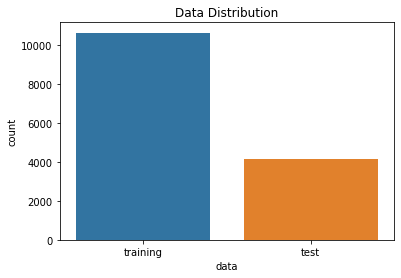

In [ ]:
# Count plot on the Data Type
sns.countplot(x = 'data' , data = df2)
plt.title("Data Distribution")
plt.show()

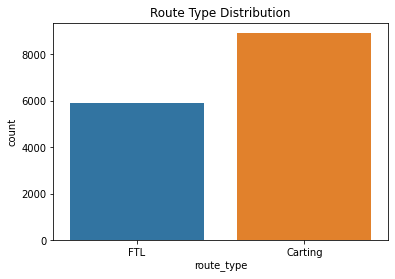

In [ ]:
# Count plot on the Route Type
sns.countplot(x = 'route_type' , data = df2)
plt.title("Route Type Distribution")
plt.show()

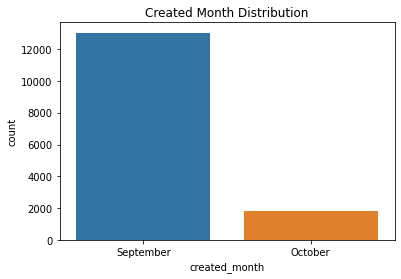

In [ ]:
# Count plot on the Created Month
sns.countplot(x = 'created_month' , data = df2)
plt.title("Created Month Distribution")
plt.show()

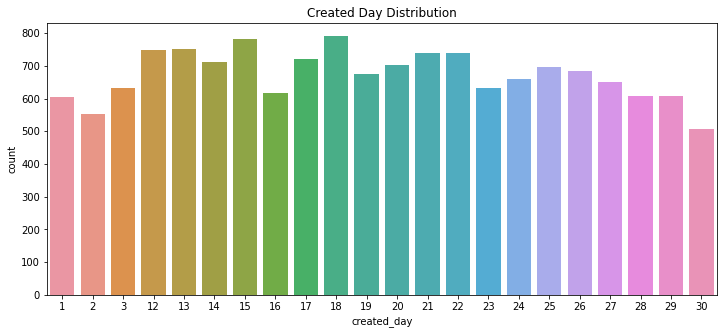

In [ ]:
# Count plot on the Created Day
plt.figure(figsize=(12,5))
sns.countplot(x = 'created_day' , data = df2)
plt.title("Created Day Distribution")
plt.show()

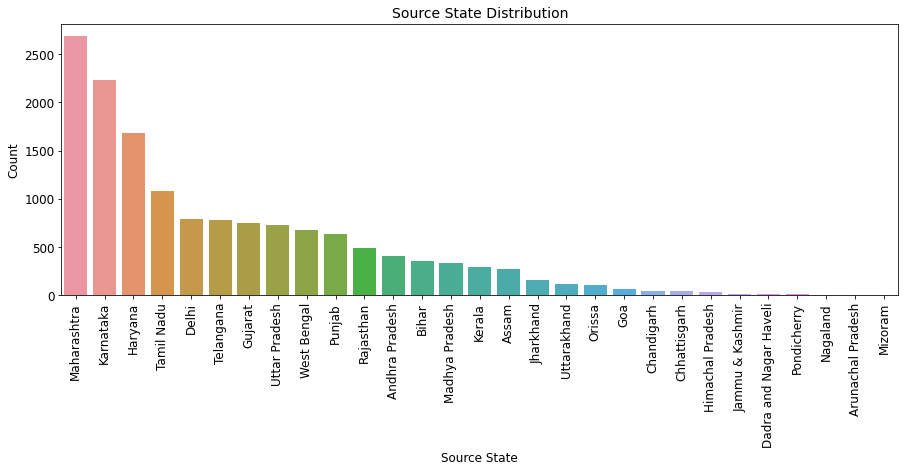

In [ ]:
# Count plot on the Source State
# Top four states are Maharashtra(>2500) , Karnataka(>2000) , Haryana(>1500) and Tamilnadu(>1000) 
# Nearly half of the trips have Source centers as the top 4 states
plt.figure(figsize=(15,5))
sns.countplot(x = 'source_state' , data = df2, order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Source State' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("Source State Distribution" , fontsize = 14)
plt.show()

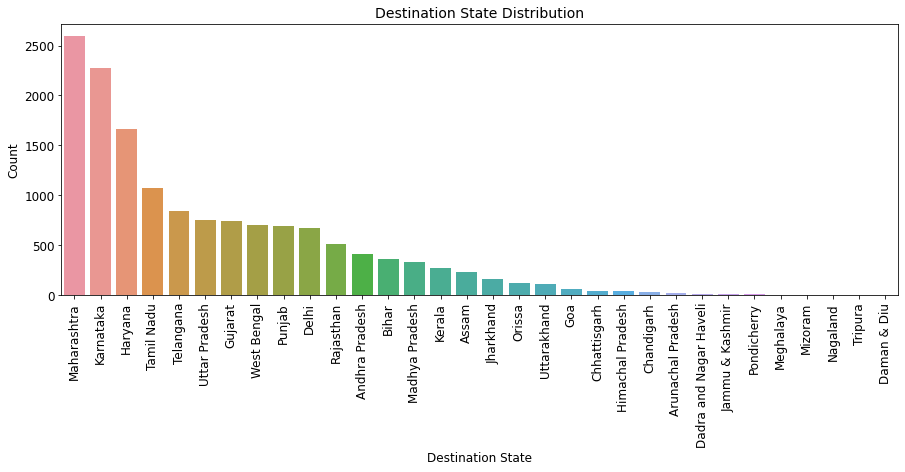

In [ ]:
# Count plot on the Destination State
# Top four states are Maharashtra(>2500) , Karnataka(>2000) , Haryana(>1500) and Tamilnadu(>1000) 
# Nearly half of the trips have Destination centers as the top 4 states
plt.figure(figsize=(15,5))
sns.countplot(x = 'destination_state' , data = df2, order=df2['destination_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Destination State' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("Destination State Distribution" , fontsize = 14)
plt.show()

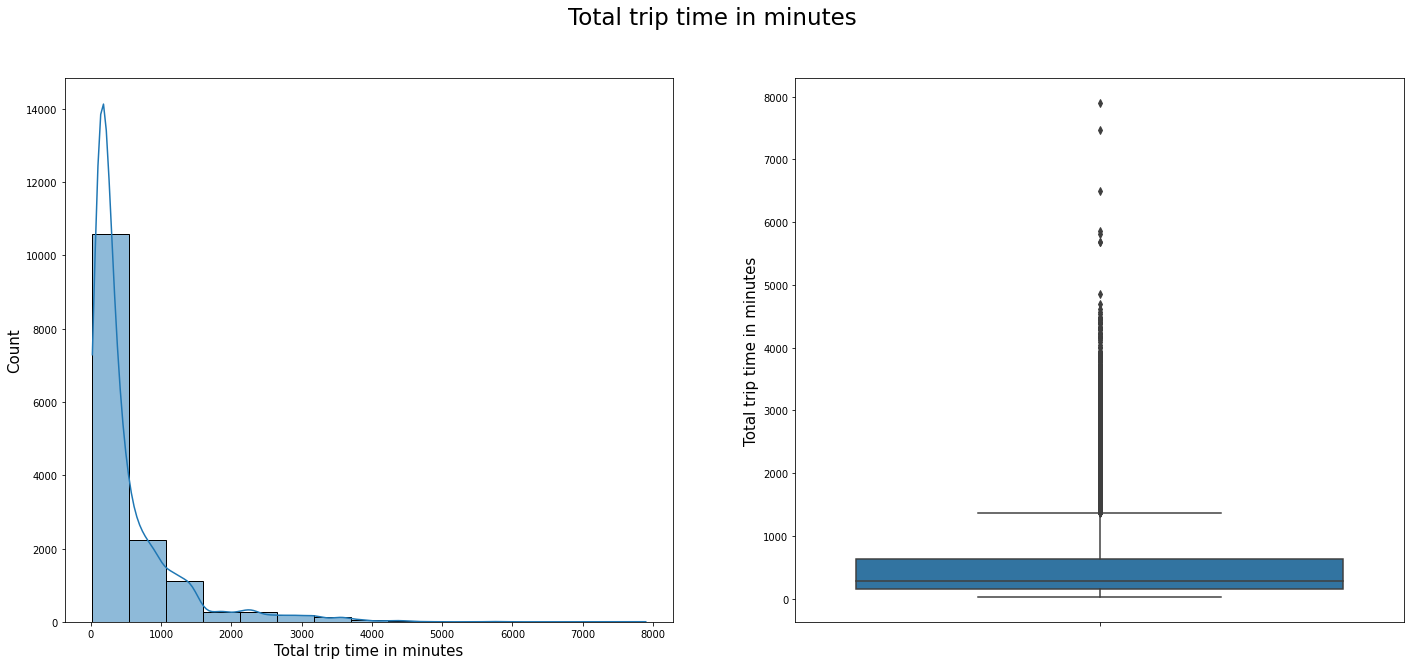

In [ ]:
# Total trip time in minutes
# Most the trips fall in the range of 0-1500 minutes as trip time
# Lot of Outliers are greater than 1500 minutes
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['od_total_time'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Total trip time in minutes' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['od_total_time'])
plt.yticks(fontsize = 10)
plt.ylabel('Total trip time in minutes' , fontsize = 15)

fig.suptitle("Total trip time in minutes" , fontsize = 23)
plt.show()

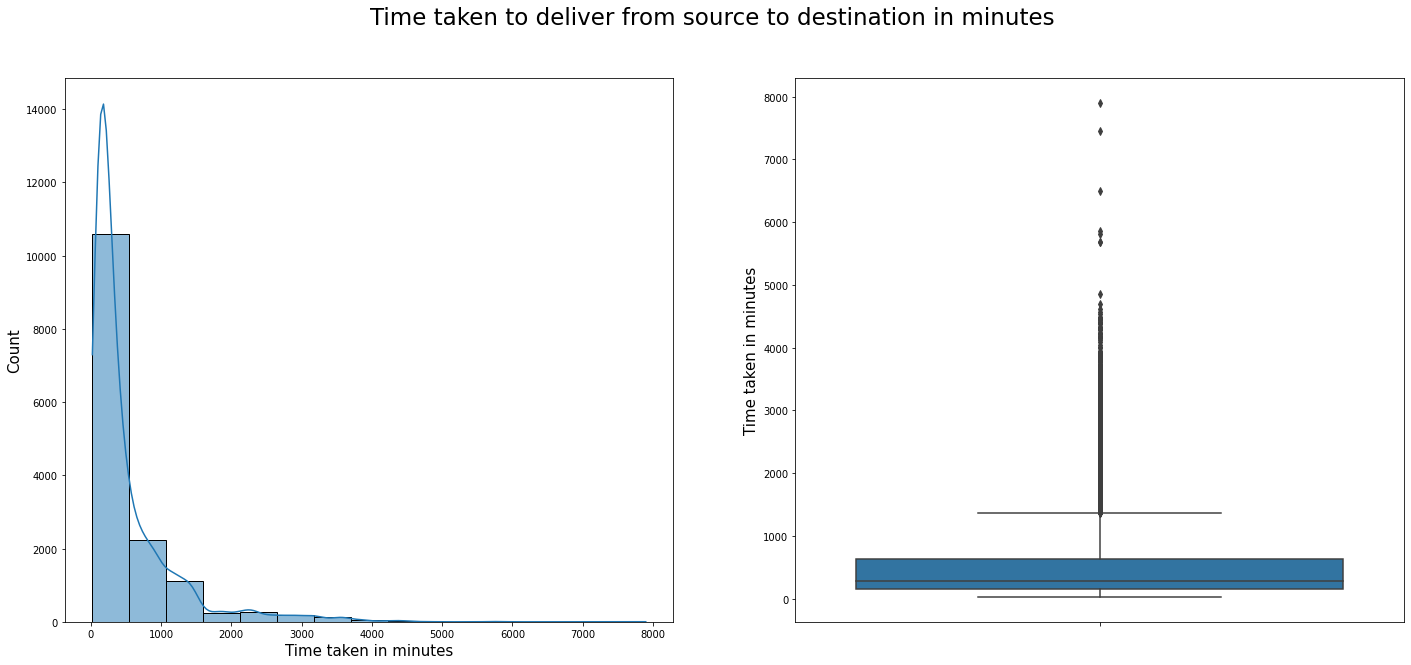

In [ ]:
# Time taken to deliver from source to destination in minutes
# Most the trips fall in the range of 0-1500 minutes as trip time
# Lot of Outliers are greater than 1500 minutes
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['start_scan_to_end_scan'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time taken in minutes' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['start_scan_to_end_scan'])
plt.yticks(fontsize = 10)
plt.ylabel('Time taken in minutes' , fontsize = 15)

fig.suptitle("Time taken to deliver from source to destination in minutes" , fontsize = 23)
plt.show()

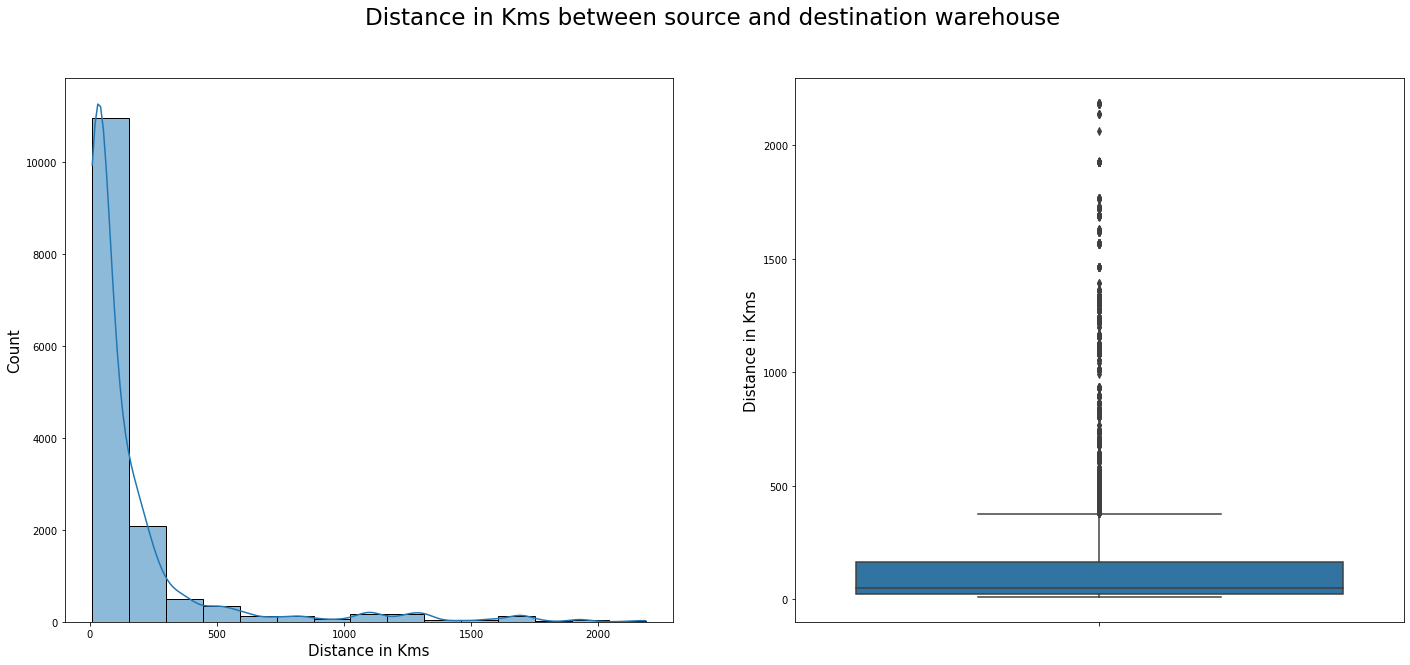

In [ ]:
# Distance in Kms between source and destination warehouse
# Most the trips fall in the range of 0-450 Kms as trip distance
# Lot of Outliers are greater than 450 Kms
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['actual_distance_to_destination'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Distance in Kms' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['actual_distance_to_destination'])
plt.yticks(fontsize = 10)
plt.ylabel('Distance in Kms' , fontsize = 15)

fig.suptitle("Distance in Kms between source and destination warehouse" , fontsize = 23)
plt.show()

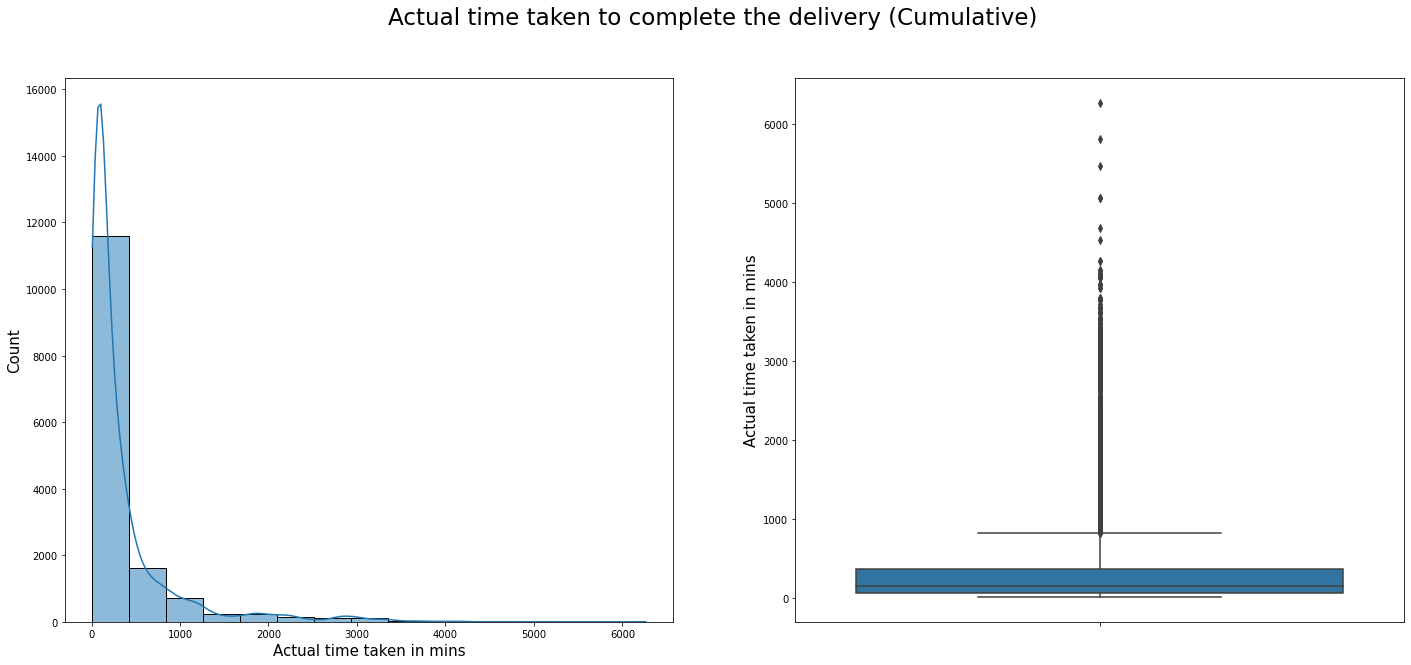

In [ ]:
# Actual time taken to complete the delivery (Cumulative)
# Most the trips fall in the range of 0-1000 minutes as trip time
# Lot of Outliers are greater than 1000 minutes
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['actual_time'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Actual time taken in mins' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['actual_time'])
plt.yticks(fontsize = 10)
plt.ylabel('Actual time taken in mins' , fontsize = 15)

fig.suptitle("Actual time taken to complete the delivery (Cumulative)" , fontsize = 23)
plt.show()

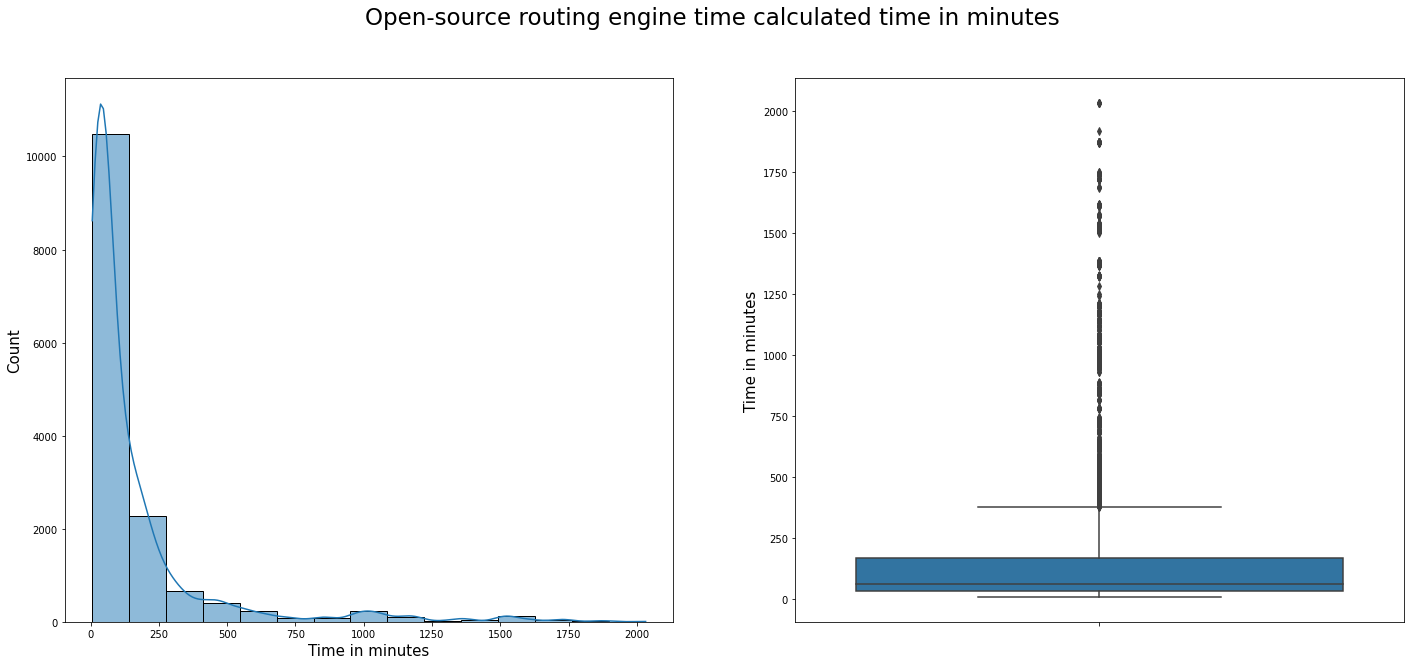

In [ ]:
# Open-source routing engine time calculated time in minutes
# Most the trips fall in the range of 0-450 minutes as trip time and the predicted time is almost half of the actual time
# Lot of Outliers are greater than 450 minutes
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['osrm_time'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time in minutes' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['osrm_time'])
plt.yticks(fontsize = 10)
plt.ylabel('Time in minutes' , fontsize = 15)

fig.suptitle("Open-source routing engine time calculated time in minutes" , fontsize = 23)
plt.show()

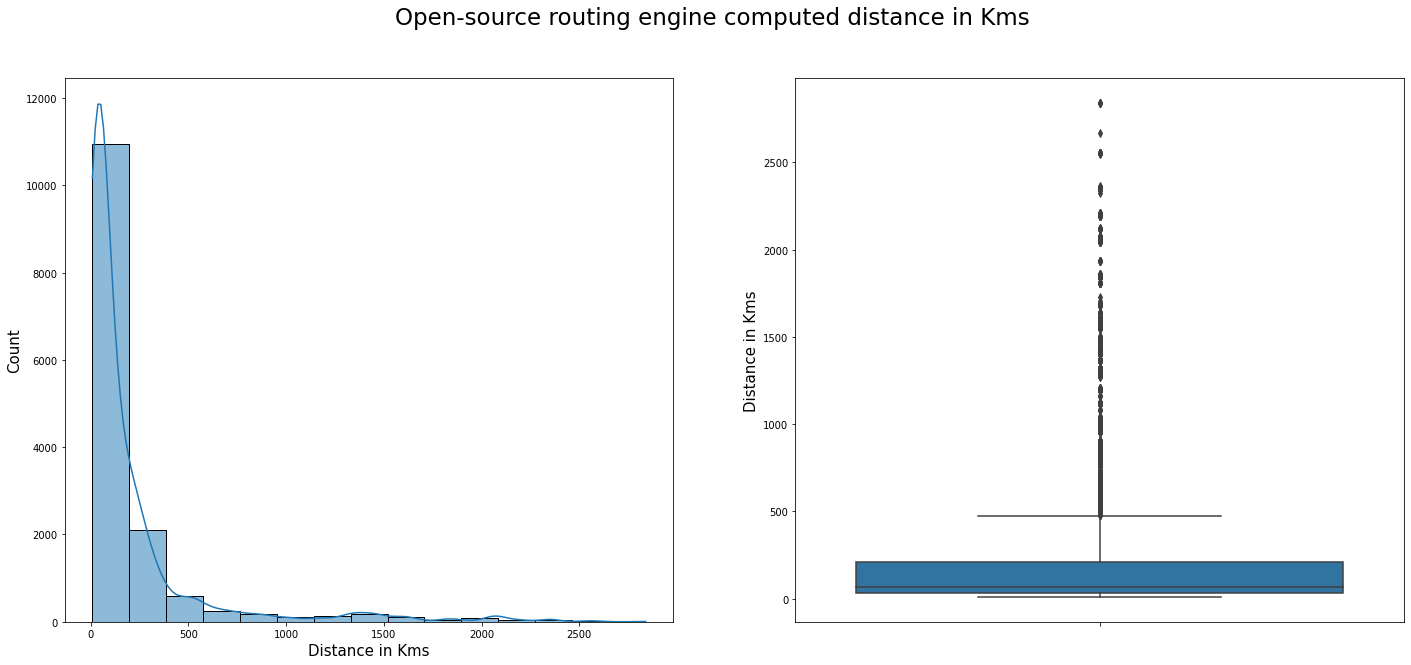

In [ ]:
# Open-source routing engine computed distance in Kms
# Most the trips fall in the range of 0-450 Kms as trip distance
# Lot of Outliers are greater than 450 Kms
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['osrm_distance'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Distance in Kms' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['osrm_distance'])
plt.yticks(fontsize = 10)
plt.ylabel('Distance in Kms' , fontsize = 15)

fig.suptitle("Open-source routing engine computed distance in Kms" , fontsize = 23)
plt.show()

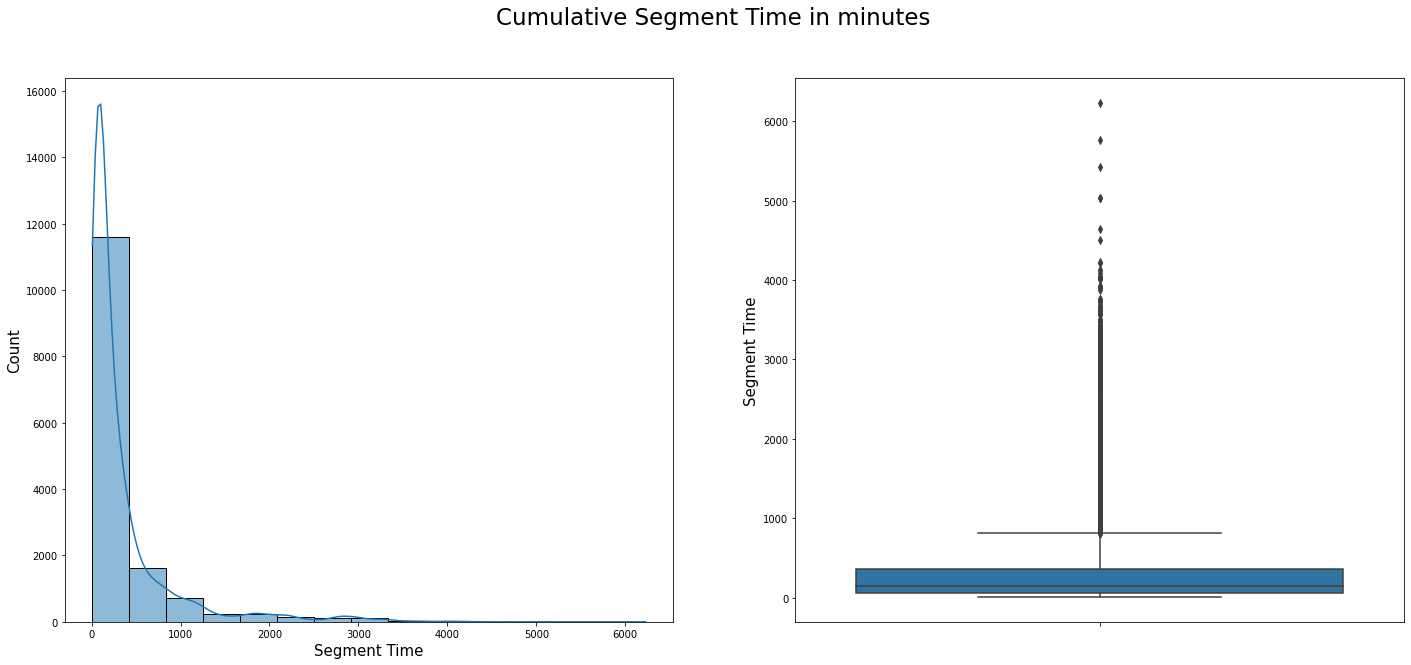

In [ ]:
# Cumulative Segment Time in minutes
# Most the trips fall in the range of 0-1000 minutes as trip time
# Lot of Outliers are greater than 1000 minutes
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['segment_actual_time'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Segment Time' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['segment_actual_time'])
plt.yticks(fontsize = 10)
plt.ylabel('Segment Time' , fontsize = 15)

fig.suptitle("Cumulative Segment Time in minutes" , fontsize = 23)
plt.show()

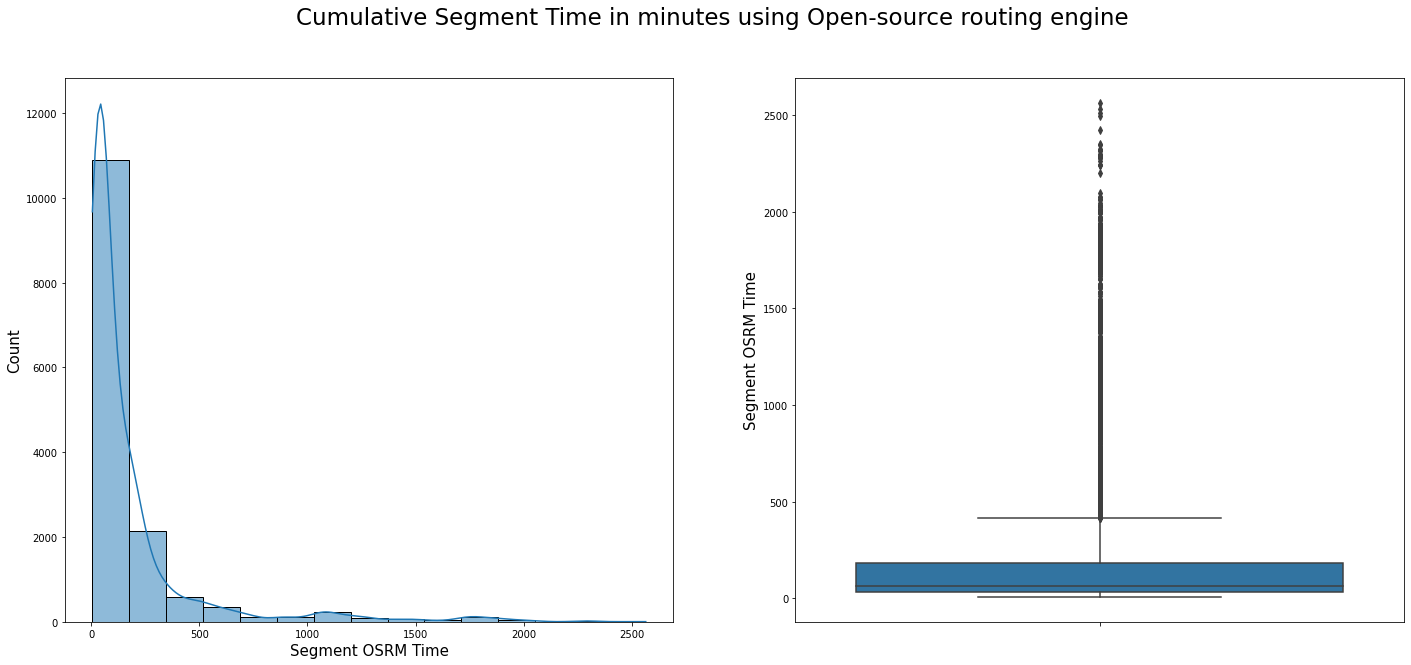

In [ ]:
# Cumulative Segment Time in minutes using Open-source routing engine
# Most the trips fall in the range of 0-450 minutes as trip time
# Lot of Outliers are greater than 450 minutes
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['segment_osrm_time'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Segment OSRM Time' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['segment_osrm_time'])
plt.yticks(fontsize = 10)
plt.ylabel('Segment OSRM Time' , fontsize = 15)

fig.suptitle("Cumulative Segment Time in minutes using Open-source routing engine" , fontsize = 23)
plt.show()

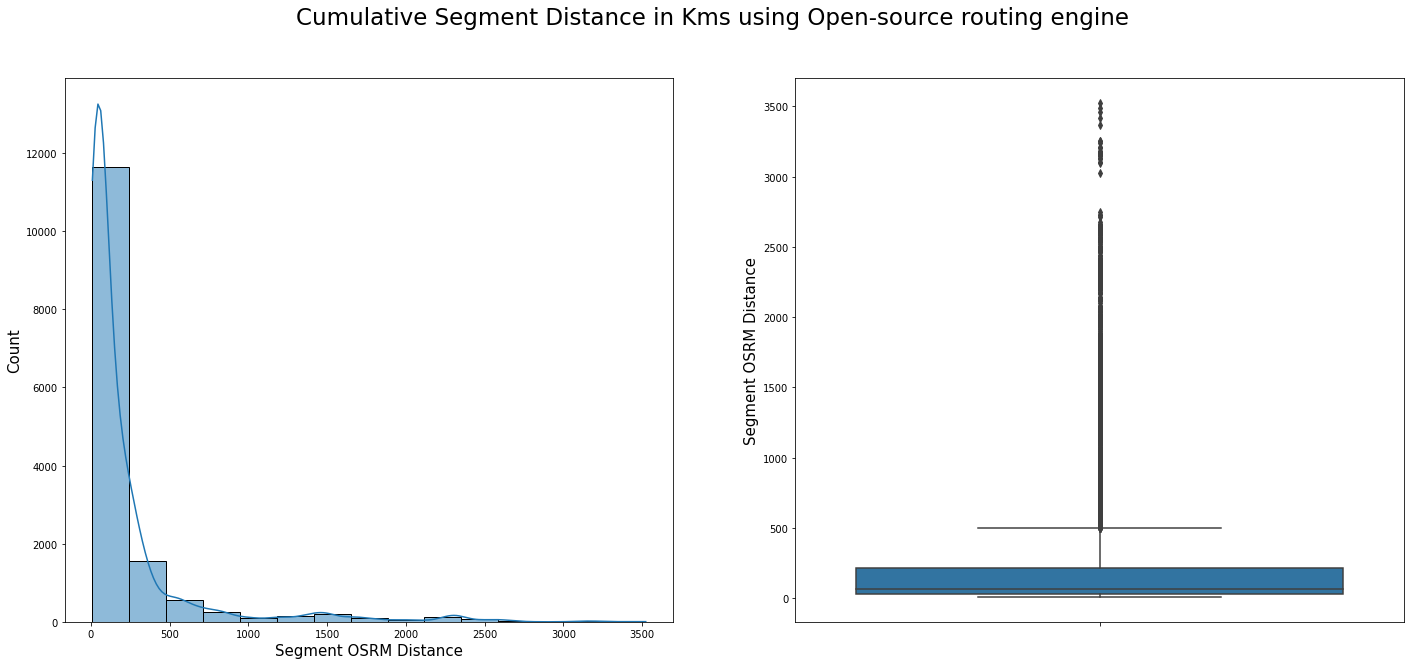

In [ ]:
# Cumulative Segment Distance in Kms using Open-source routing engine
# Most the trips fall in the range of 0-500 Kms as trip distance
# Lot of Outliers are greater than 500 Kms
fig = plt.figure(figsize = (24,10))

plt.subplot(1,2,1)
sns.histplot(x = df2['segment_osrm_distance'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Segment OSRM Distance' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df2['segment_osrm_distance'])
plt.yticks(fontsize = 10)
plt.ylabel('Segment OSRM Distance' , fontsize = 15)

fig.suptitle("Cumulative Segment Distance in Kms using Open-source routing engine" , fontsize = 23)
plt.show()

# Bivariate and multivariate Visualisation

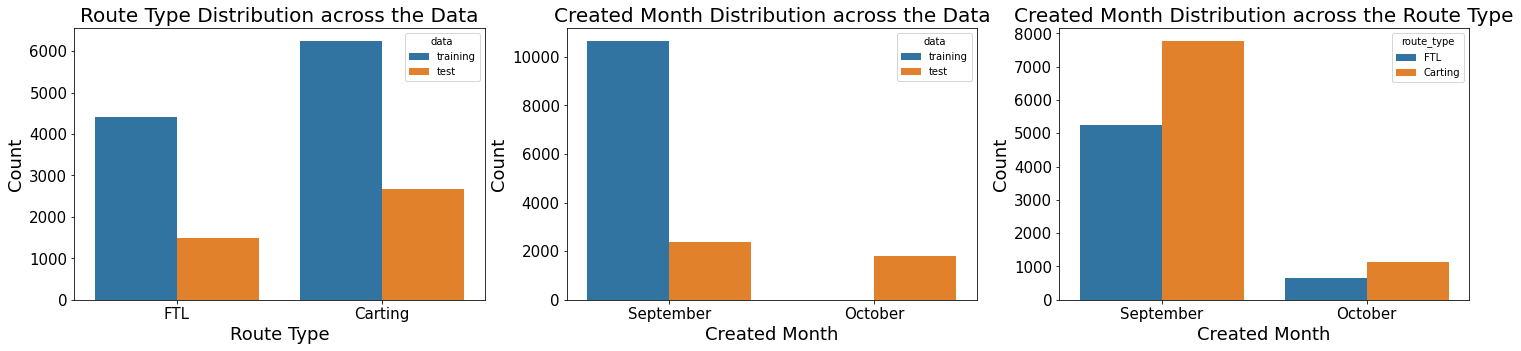

In [ ]:
# Route Type Distribution across the Data and created month
plt.figure(figsize = (25,5))

plt.subplot(1,3,1)
sns.countplot(x = 'route_type' , data = df2 , hue = 'data')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Route Type' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Route Type Distribution across the Data" , fontsize = 20)

plt.subplot(1,3,2)
sns.countplot(x = 'created_month' , data = df2 , hue = 'data')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Created Month' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Created Month Distribution across the Data" , fontsize = 20)

plt.subplot(1,3,3)
sns.countplot(x = 'created_month' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Created Month' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Created Month Distribution across the Route Type" , fontsize = 20)

plt.show()

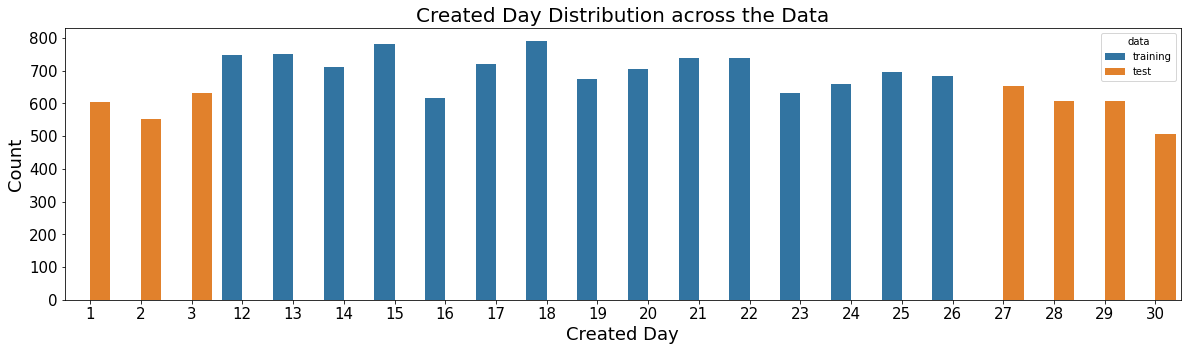

In [ ]:
# Created Day Distribution across the Data
# September 12 - 26 consists of training data
# September 27 - October 3 consists of test data
plt.figure(figsize = (20,5))
sns.countplot(x = 'created_day' , data = df2 , hue = 'data')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Created Day' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Created Day Distribution across the Data" , fontsize = 20)
plt.show()

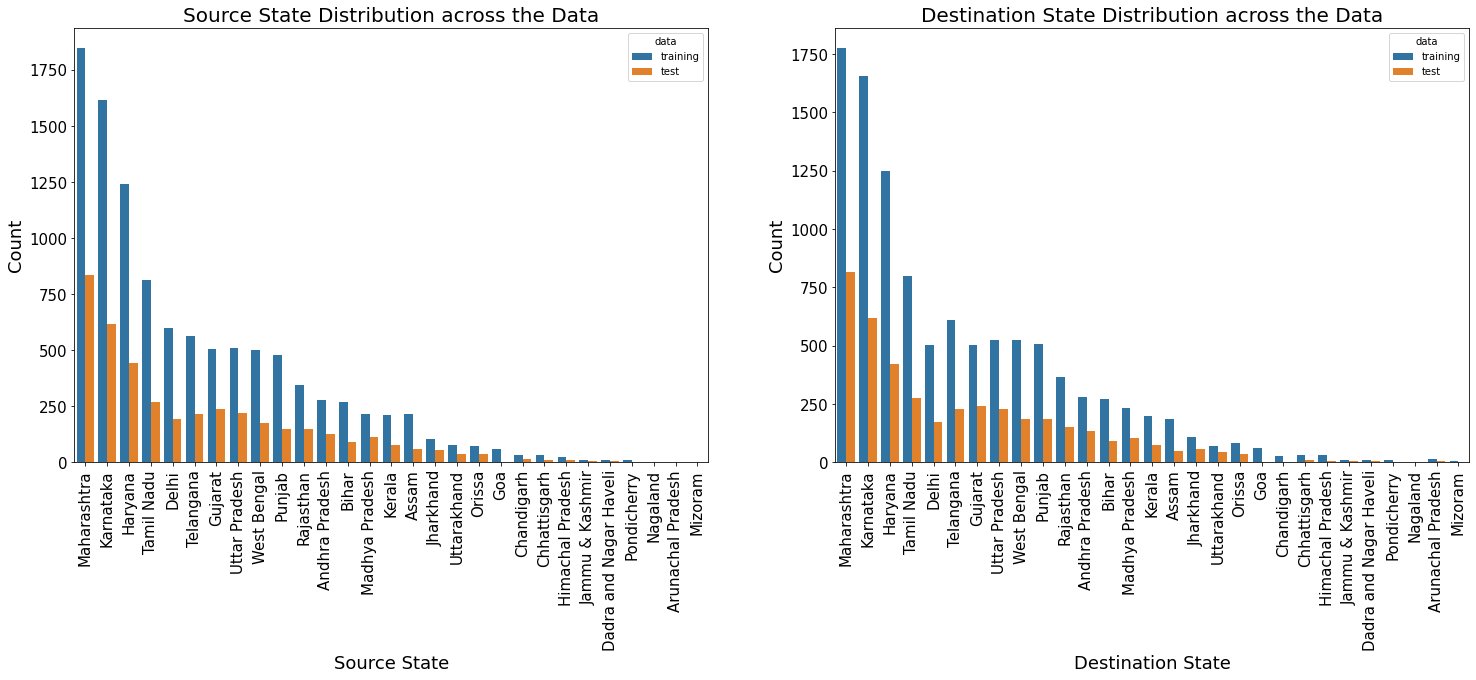

In [ ]:
# State Distribution across the Data
# 2:1 data of training : test in each state
plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.countplot(x = 'source_state' , data = df2 , hue = 'data', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Source State' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Source State Distribution across the Data" , fontsize = 20)

plt.subplot(1,2,2)
sns.countplot(x = 'destination_state' , data = df2 , hue = 'data', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Destination State' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Destination State Distribution across the Data" , fontsize = 20)

plt.show()

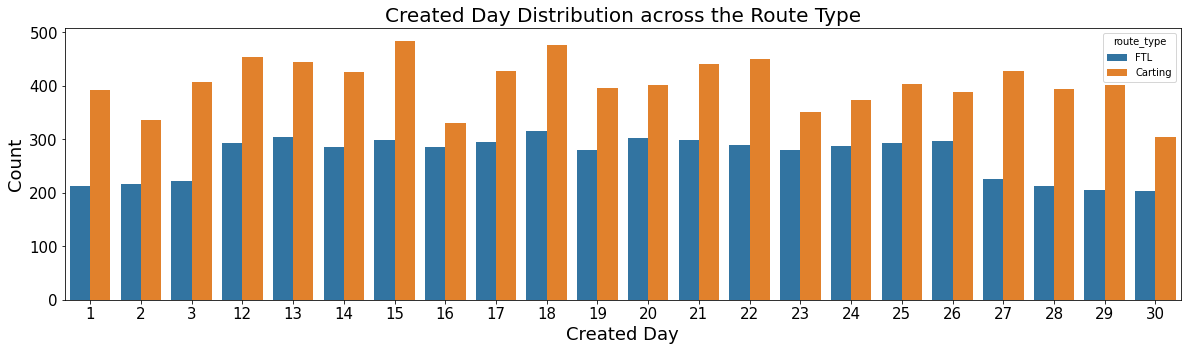

In [ ]:
# Created Day Distribution across the Data
# Carting route type exceeds FTL type by 100-200 trips each day
plt.figure(figsize = (20,5))
sns.countplot(x = 'created_day' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Created Day' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Created Day Distribution across the Route Type" , fontsize = 20)
plt.show()

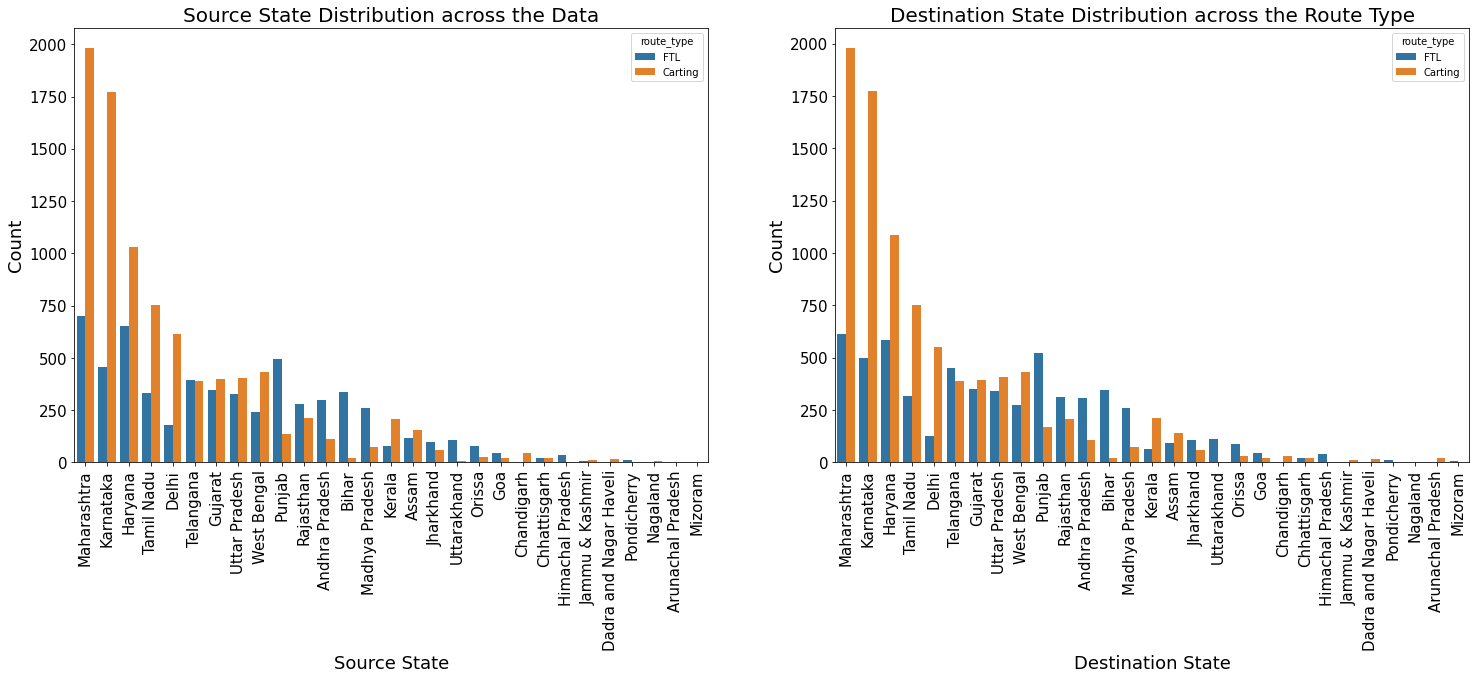

In [ ]:
# State Distribution across the Route Type
# Carting type is comparitively more in the top 5 states
# FTL is almost same or comparitively higher in other states than the top 5
plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.countplot(x = 'source_state' , data = df2 , hue = 'route_type', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Source State' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Source State Distribution across the Data" , fontsize = 20)

plt.subplot(1,2,2)
sns.countplot(x = 'destination_state' , data = df2 , hue = 'route_type', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Destination State' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Destination State Distribution across the Route Type" , fontsize = 20)

plt.show()

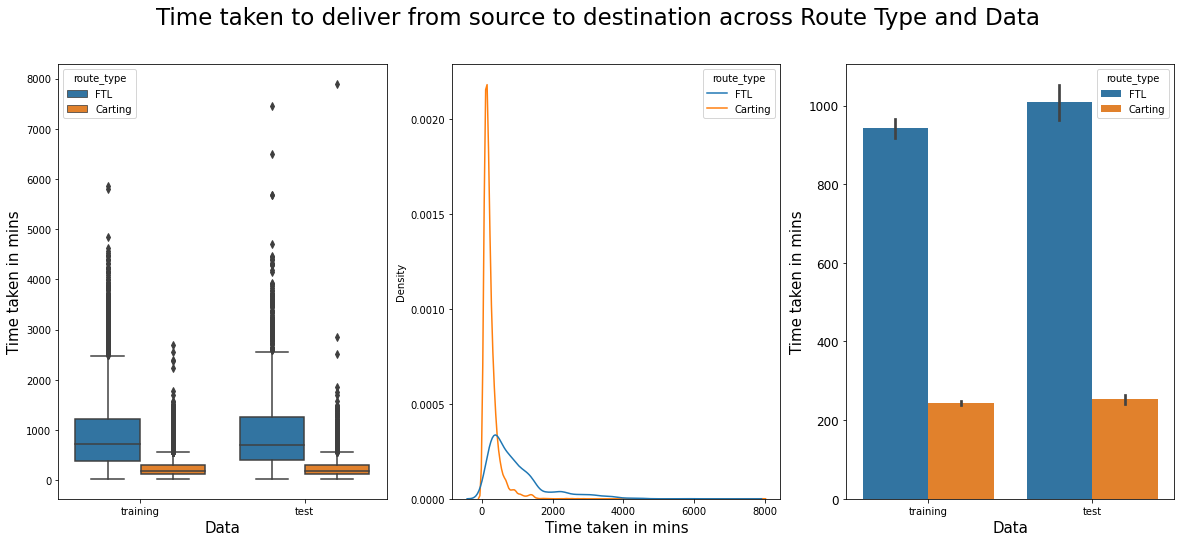

In [ ]:
# Time taken to deliver from source to destination across Route Type and Data"
# For FTL, 0 - 1000 minutes is the range where most trip lies averaging 1000 and outliers trips having greater than 1000 minutes. 
# For Carting, 0 - 500 minutes is the range where most trip lies averaging 230 and outliers trips having greater than 500 minutes.
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'start_scan_to_end_scan' , data = df2 , x = 'data' , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('Time taken in mins' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'start_scan_to_end_scan' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.xlabel('Time taken in mins' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'start_scan_to_end_scan' , data = df2 , x = 'data' , hue = 'route_type' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('Time taken in mins' , fontsize = 15)

fig.suptitle("Time taken to deliver from source to destination across Route Type and Data" , fontsize = 23)
plt.show()

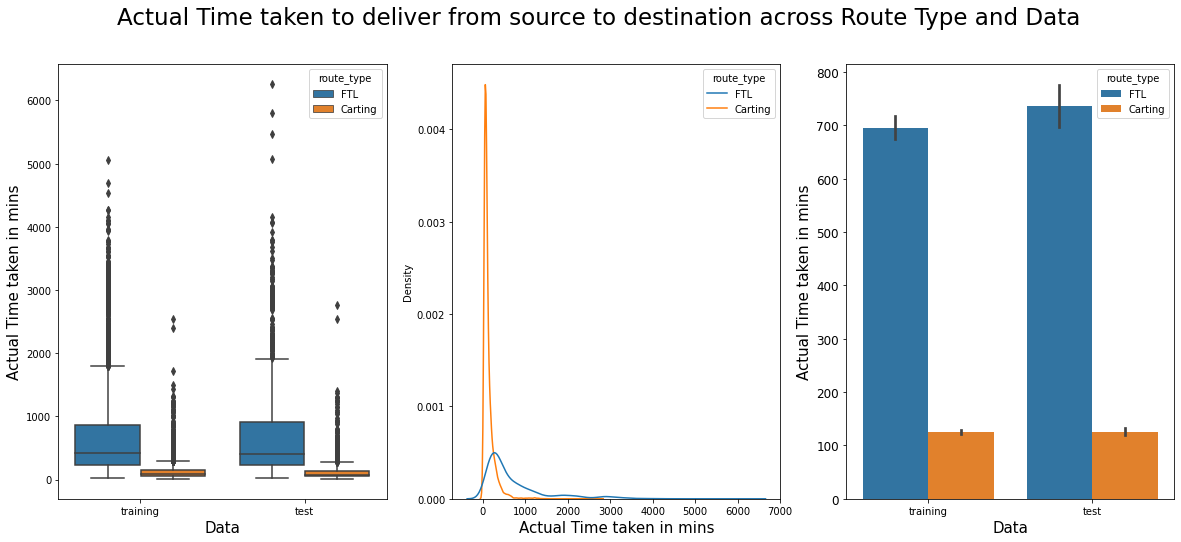

In [ ]:
# Actual Time taken to deliver from source to destination across Route Type and Data
# For FTL, 0 - 1800 minutes is the range where most trip lies averaging 710 and outliers trips having greater than 1800 minutes. 
# For Carting, 0 - 400 minutes is the range where most trip lies averaging 120 and outliers trips having greater than 400 minutes.

fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'actual_time' , data = df2 , x = 'data' , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('Actual Time taken in mins' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'actual_time' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.xlabel('Actual Time taken in mins' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'actual_time' , data = df2 , x = 'data' , hue = 'route_type' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('Actual Time taken in mins' , fontsize = 15)

fig.suptitle("Actual Time taken to deliver from source to destination across Route Type and Data" , fontsize = 23)
plt.show()

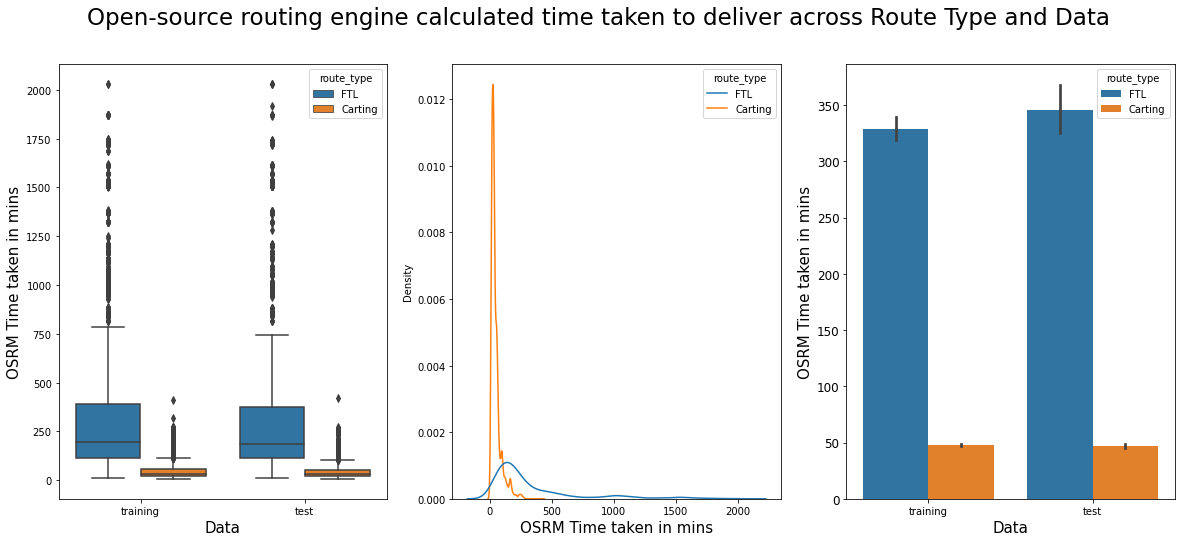

In [ ]:
# Open-source routing engine calculate time taken to deliver across Route Type and Data
# For FTL, 0 - 760 minutes is the range where most trip lies averaging 340 and outliers trips having greater than 760 minutes. 
# For Carting, 0 - 200 minutes is the range where most trip lies averaging 50 and outliers trips having greater than 200 minutes.
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'osrm_time' , data = df2 , x = 'data' , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('OSRM Time taken in mins' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'osrm_time' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.xlabel('OSRM Time taken in mins' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'osrm_time' , data = df2 , x = 'data' , hue = 'route_type' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('OSRM Time taken in mins' , fontsize = 15)

fig.suptitle("Open-source routing engine calculated time taken to deliver across Route Type and Data" , fontsize = 23)
plt.show()

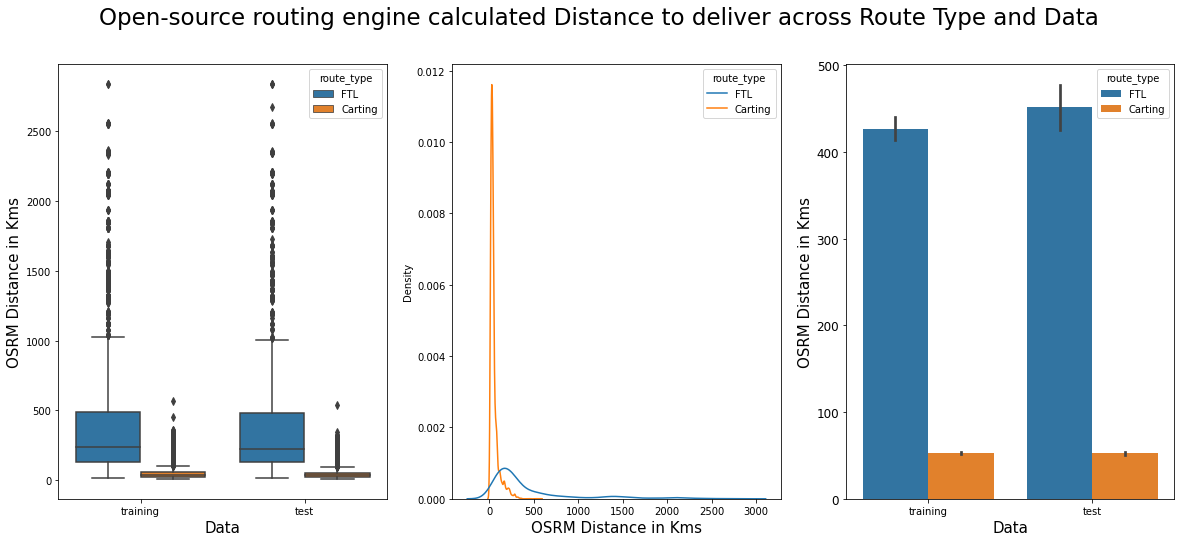

In [ ]:
# Open-source routing engine calculated Distance to deliver across Route Type and Data
# For FTL, 0 - 1000 Kms is the range where most trip lies averaging 420 Kms and outliers trips having greater than 1000 Kms. 
# For Carting, 0 - 130 Kms is the range where most trip lies averaging 50 Kms and outliers trips having greater than 130 Kms.
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'osrm_distance' , data = df2 , x = 'data' , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('OSRM Distance in Kms' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'osrm_distance' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.xlabel('OSRM Distance in Kms' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'osrm_distance' , data = df2 , x = 'data' , hue = 'route_type' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('OSRM Distance in Kms' , fontsize = 15)

fig.suptitle("Open-source routing engine calculated Distance to deliver across Route Type and Data" , fontsize = 23)
plt.show()

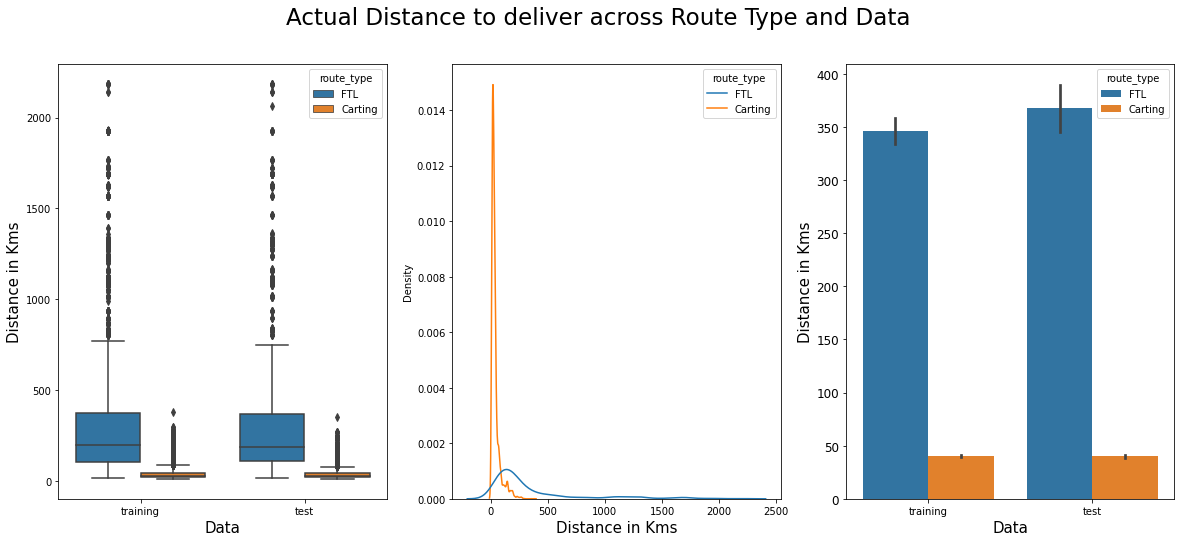

In [ ]:
# Actual Distance to deliver across Route Type and Data
# For FTL, 0 - 750 Kms is the range where most trip lies averaging 350 Kms and outliers trips having greater than 750 Kms. 
# For Carting, 0 - 100 Kms is the range where most trip lies averaging 40 Kms and outliers trips having greater than 100 Kms.
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'actual_distance_to_destination' , data = df2 , x = 'data' , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('Distance in Kms' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'actual_distance_to_destination' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 10)
plt.xlabel('Distance in Kms' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'actual_distance_to_destination' , data = df2 , x = 'data' , hue = 'route_type' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Data' , fontsize = 15)
plt.ylabel('Distance in Kms' , fontsize = 15)

fig.suptitle("Actual Distance to deliver across Route Type and Data" , fontsize = 23)
plt.show()

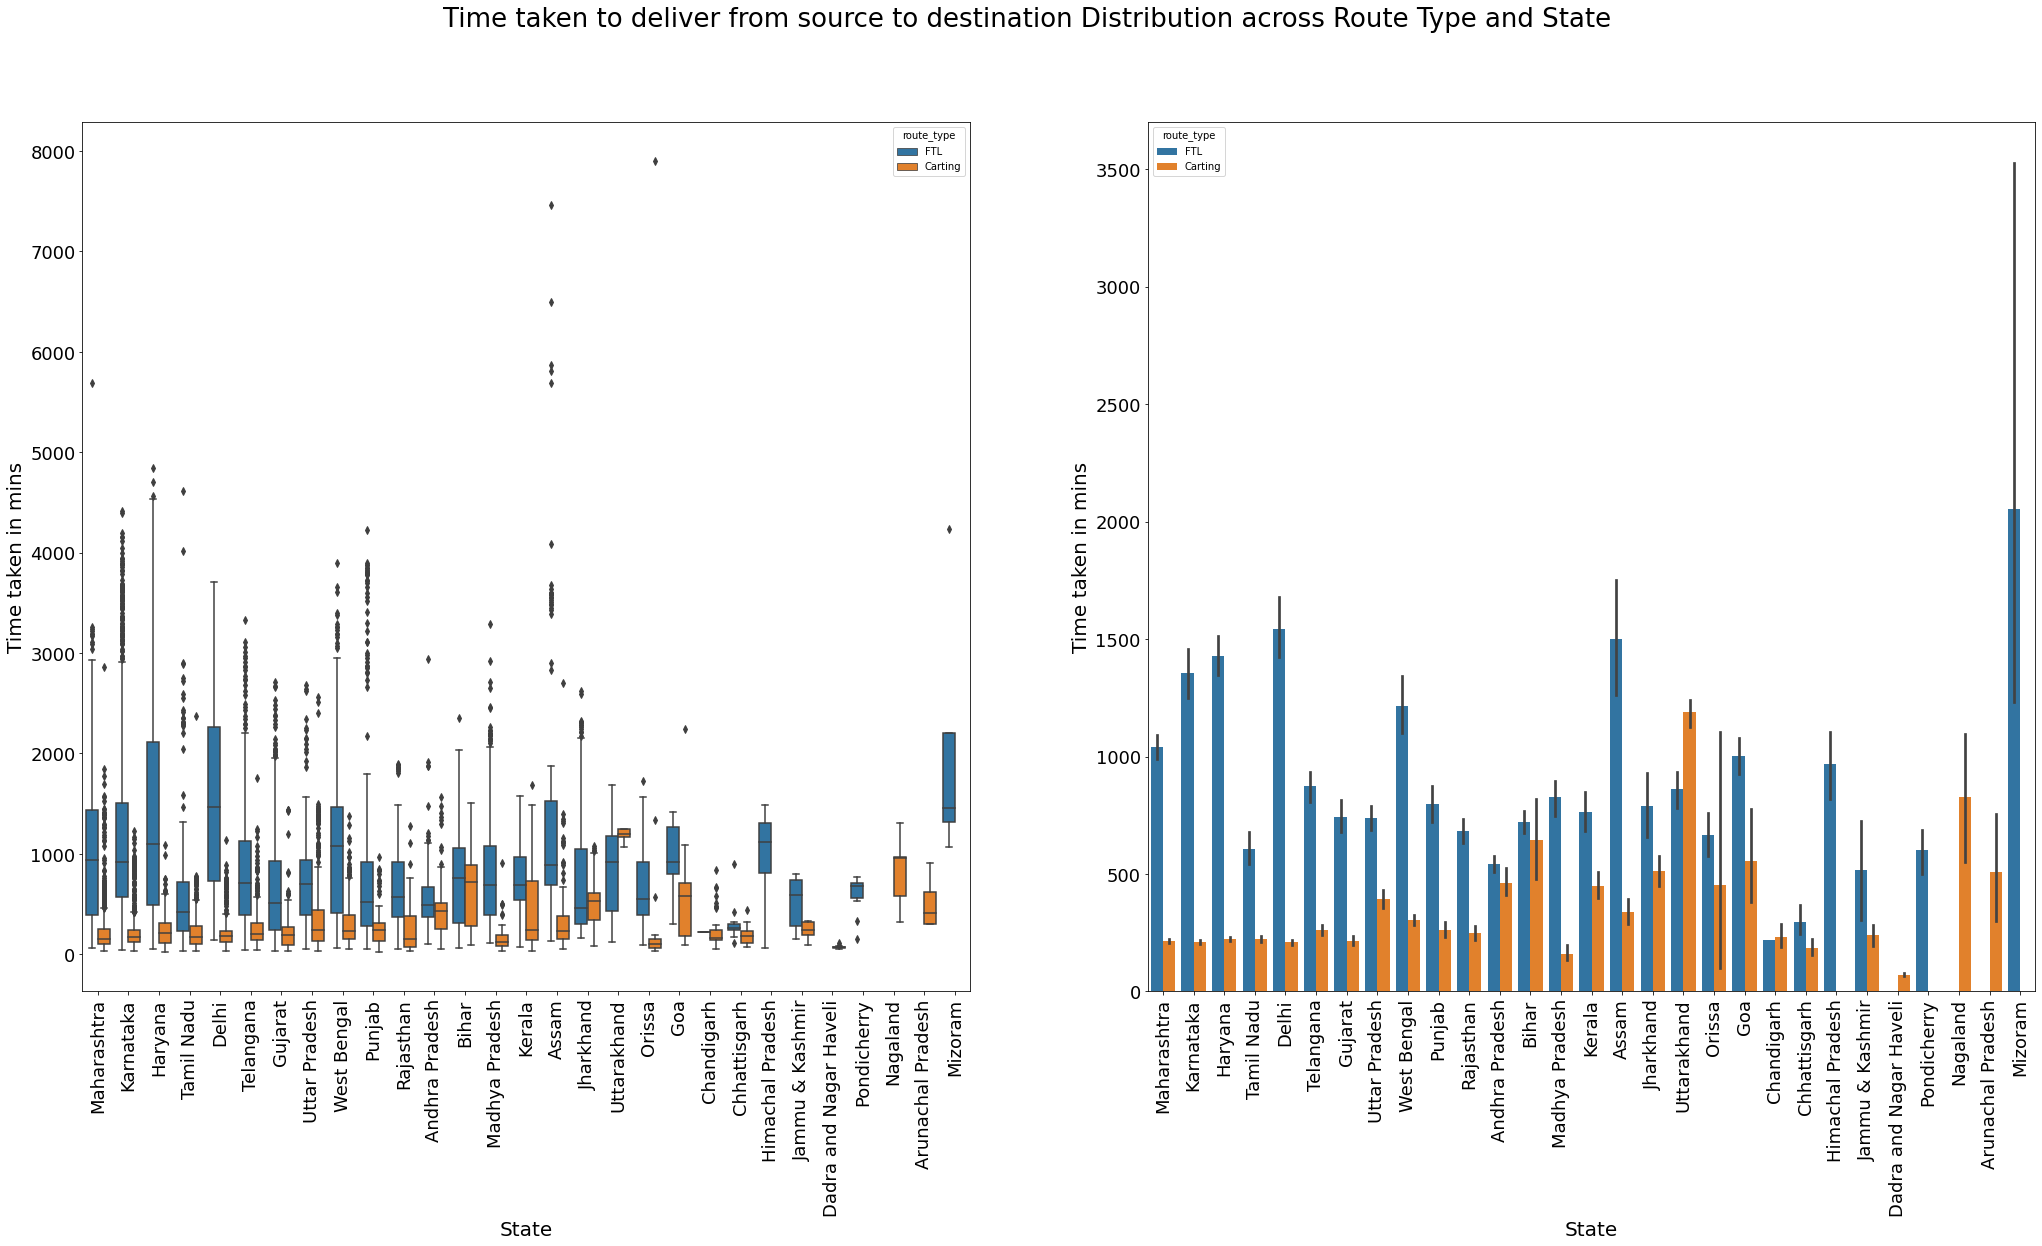

In [ ]:
# Time taken to deliver from source to destination Distribution across Route Type and State

fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'start_scan_to_end_scan' , data = df2 , x = 'source_state' , hue = 'route_type', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('Time taken in mins' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'start_scan_to_end_scan' , data = df2 , x = 'source_state' , hue = 'route_type' , estimator = np.mean, order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('Time taken in mins' , fontsize = 20)

fig.suptitle("Time taken to deliver from source to destination Distribution across Route Type and State" , fontsize = 26)
plt.show()

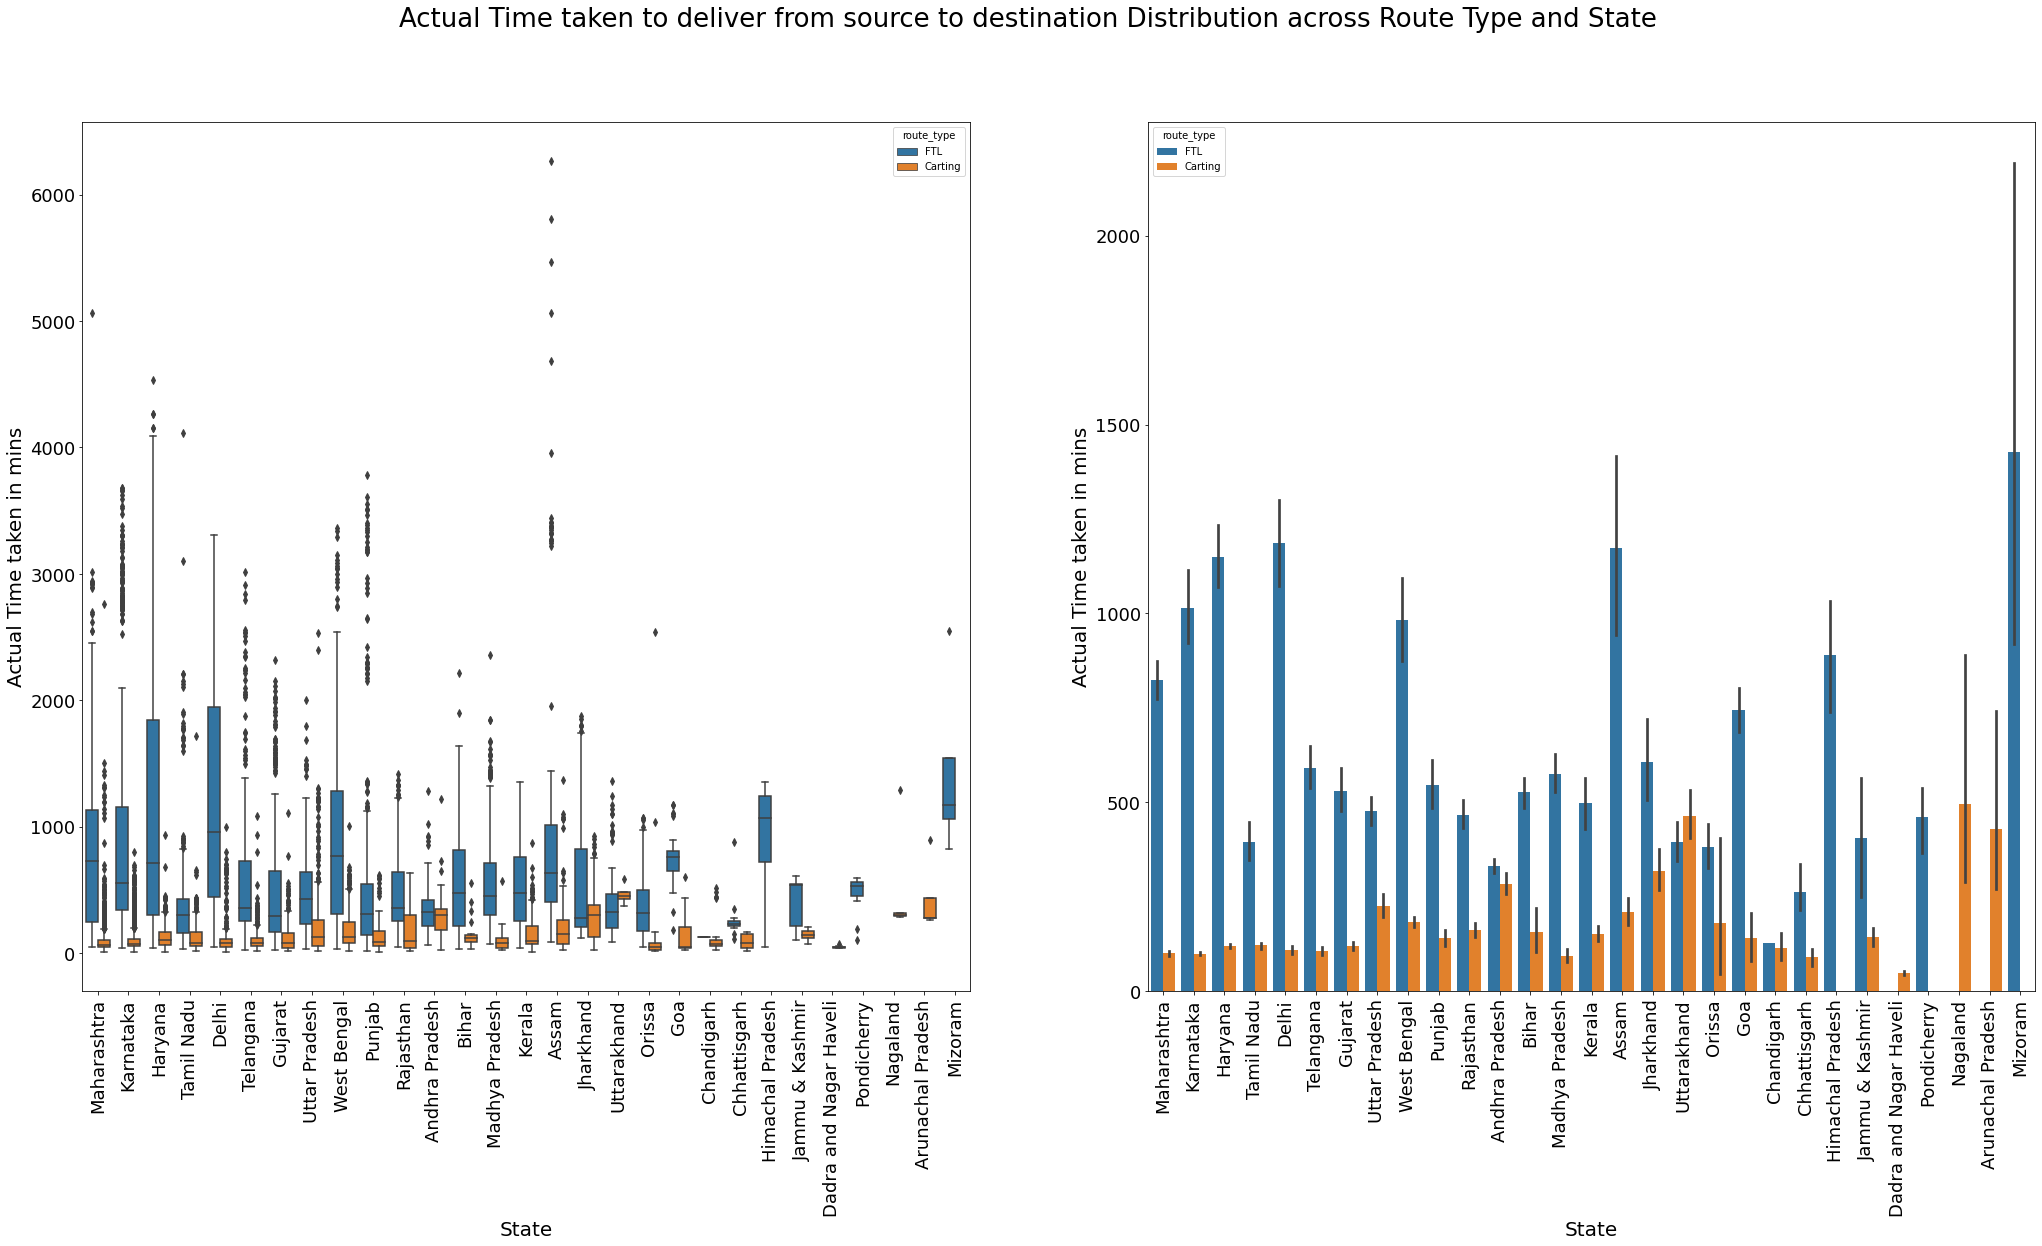

In [ ]:
# Actual Time taken to deliver from source to destination Distribution across Route Type and State
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'actual_time' , data = df2 , x = 'source_state' , hue = 'route_type', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('Actual Time taken in mins' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'actual_time' , data = df2 , x = 'source_state' , hue = 'route_type' , estimator = np.mean, order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('Actual Time taken in mins' , fontsize = 20)

fig.suptitle("Actual Time taken to deliver from source to destination Distribution across Route Type and State" , fontsize = 26)
plt.show()

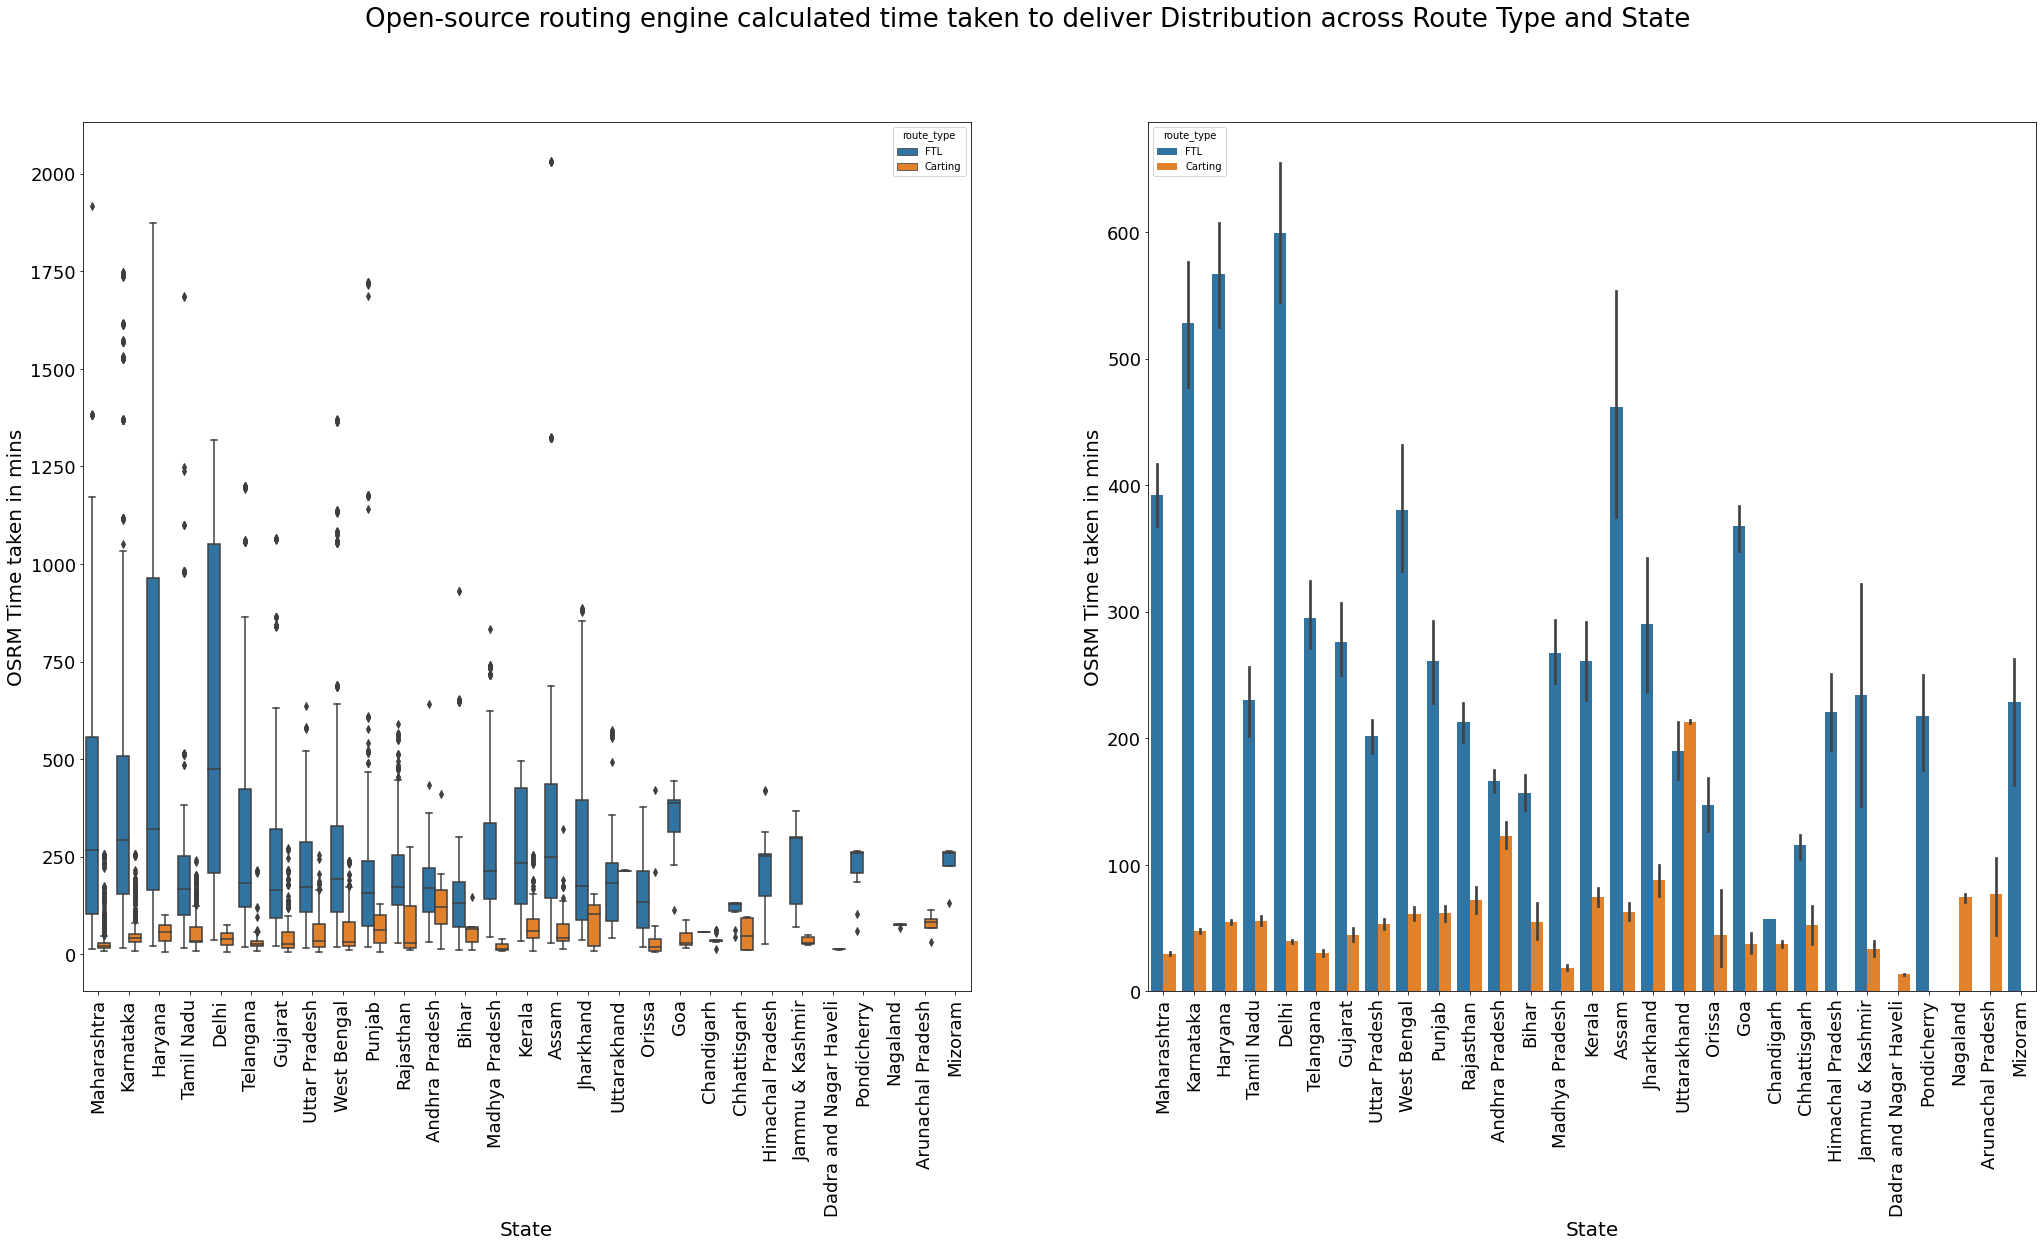

In [ ]:
# Open-source routing engine calculated time taken to deliver Distribution across Route Type and State
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'osrm_time' , data = df2 , x = 'source_state' , hue = 'route_type', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('OSRM Time taken in mins' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'osrm_time' , data = df2 , x = 'source_state' , hue = 'route_type' , estimator = np.mean, order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('OSRM Time taken in mins' , fontsize = 20)

fig.suptitle("Open-source routing engine calculated time taken to deliver Distribution across Route Type and State" , fontsize = 26)
plt.show()

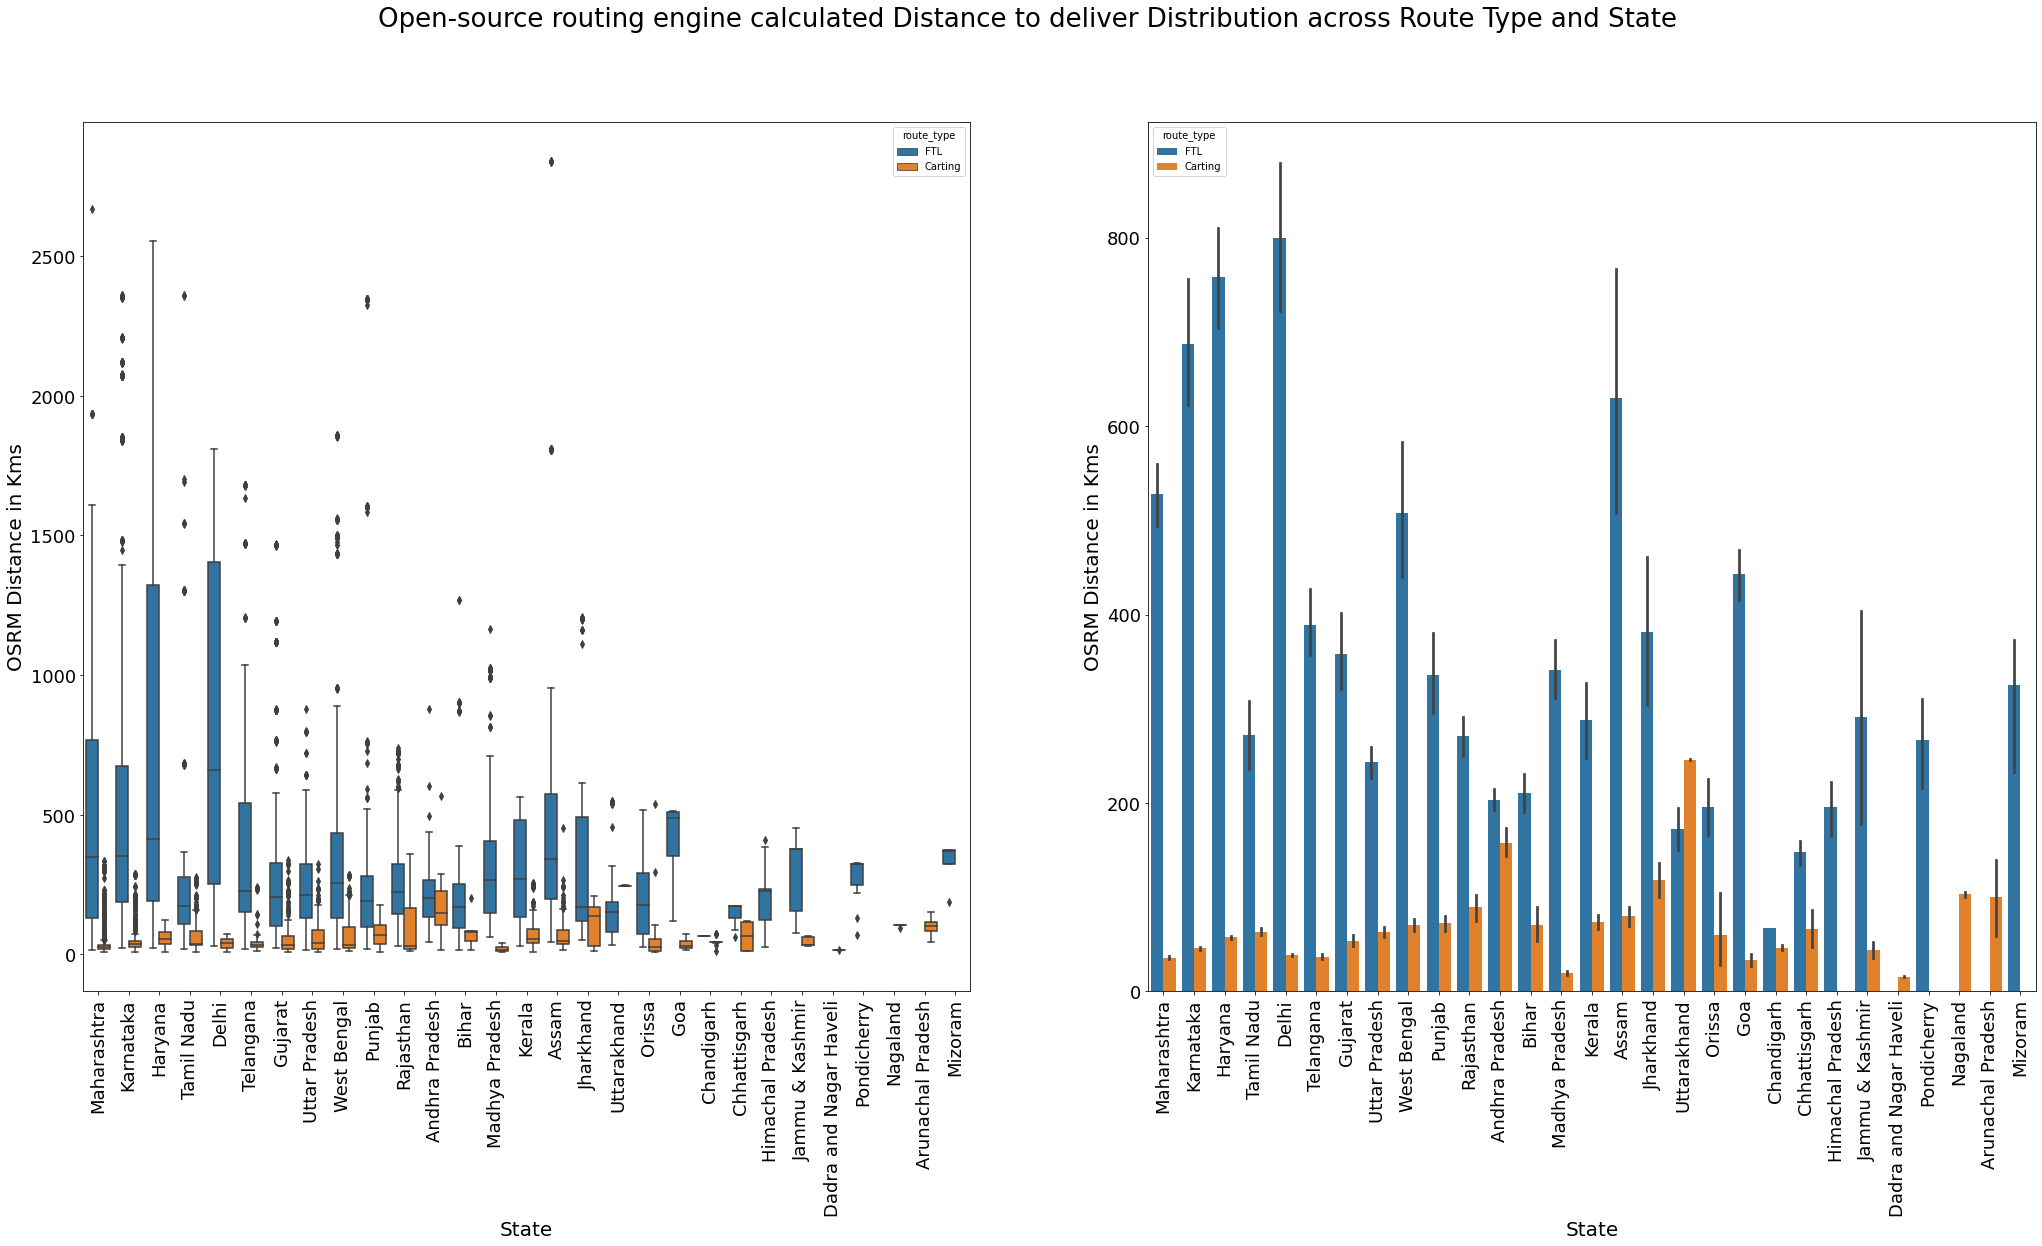

In [ ]:
# Open-source routing engine calculated Distance to deliver Distribution across Route Type and State
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'osrm_distance' , data = df2 , x = 'source_state' , hue = 'route_type', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('OSRM Distance in Kms' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'osrm_distance' , data = df2 , x = 'source_state' , hue = 'route_type' , estimator = np.mean, order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('OSRM Distance in Kms' , fontsize = 20)

fig.suptitle("Open-source routing engine calculated Distance to deliver Distribution across Route Type and State" , fontsize = 26)
plt.show()

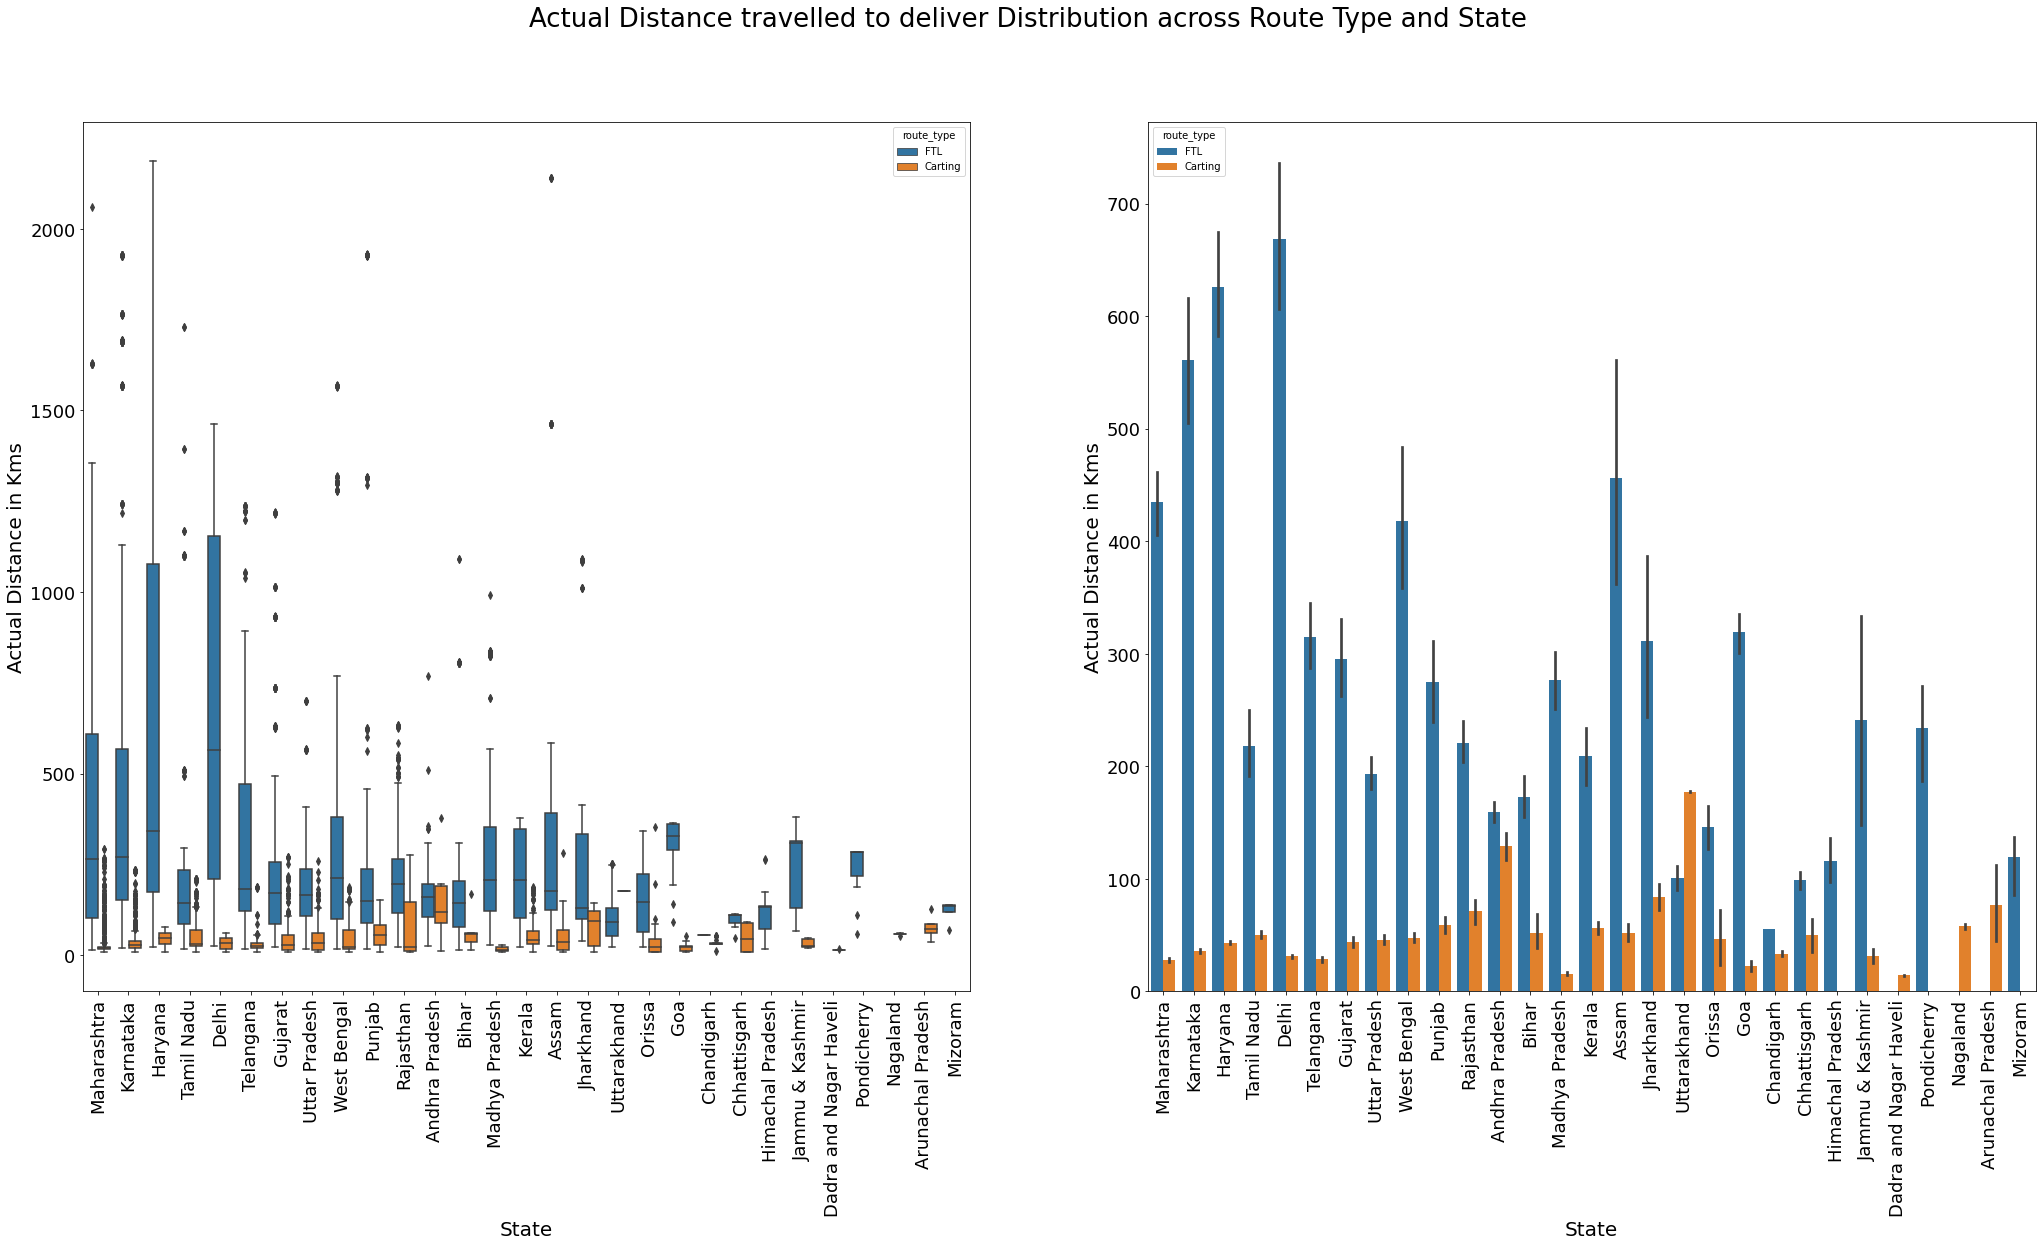

In [ ]:
# Actual Distance travelled to deliver Distribution across Route Type and State
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'actual_distance_to_destination' , data = df2 , x = 'source_state' , hue = 'route_type', order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('Actual Distance in Kms' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'actual_distance_to_destination' , data = df2 , x = 'source_state' , hue = 'route_type' , estimator = np.mean, order=df2['source_state'].value_counts().index)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('State' , fontsize = 20)
plt.ylabel('Actual Distance in Kms' , fontsize = 20)

fig.suptitle("Actual Distance travelled to deliver Distribution across Route Type and State" , fontsize = 26)
plt.show()

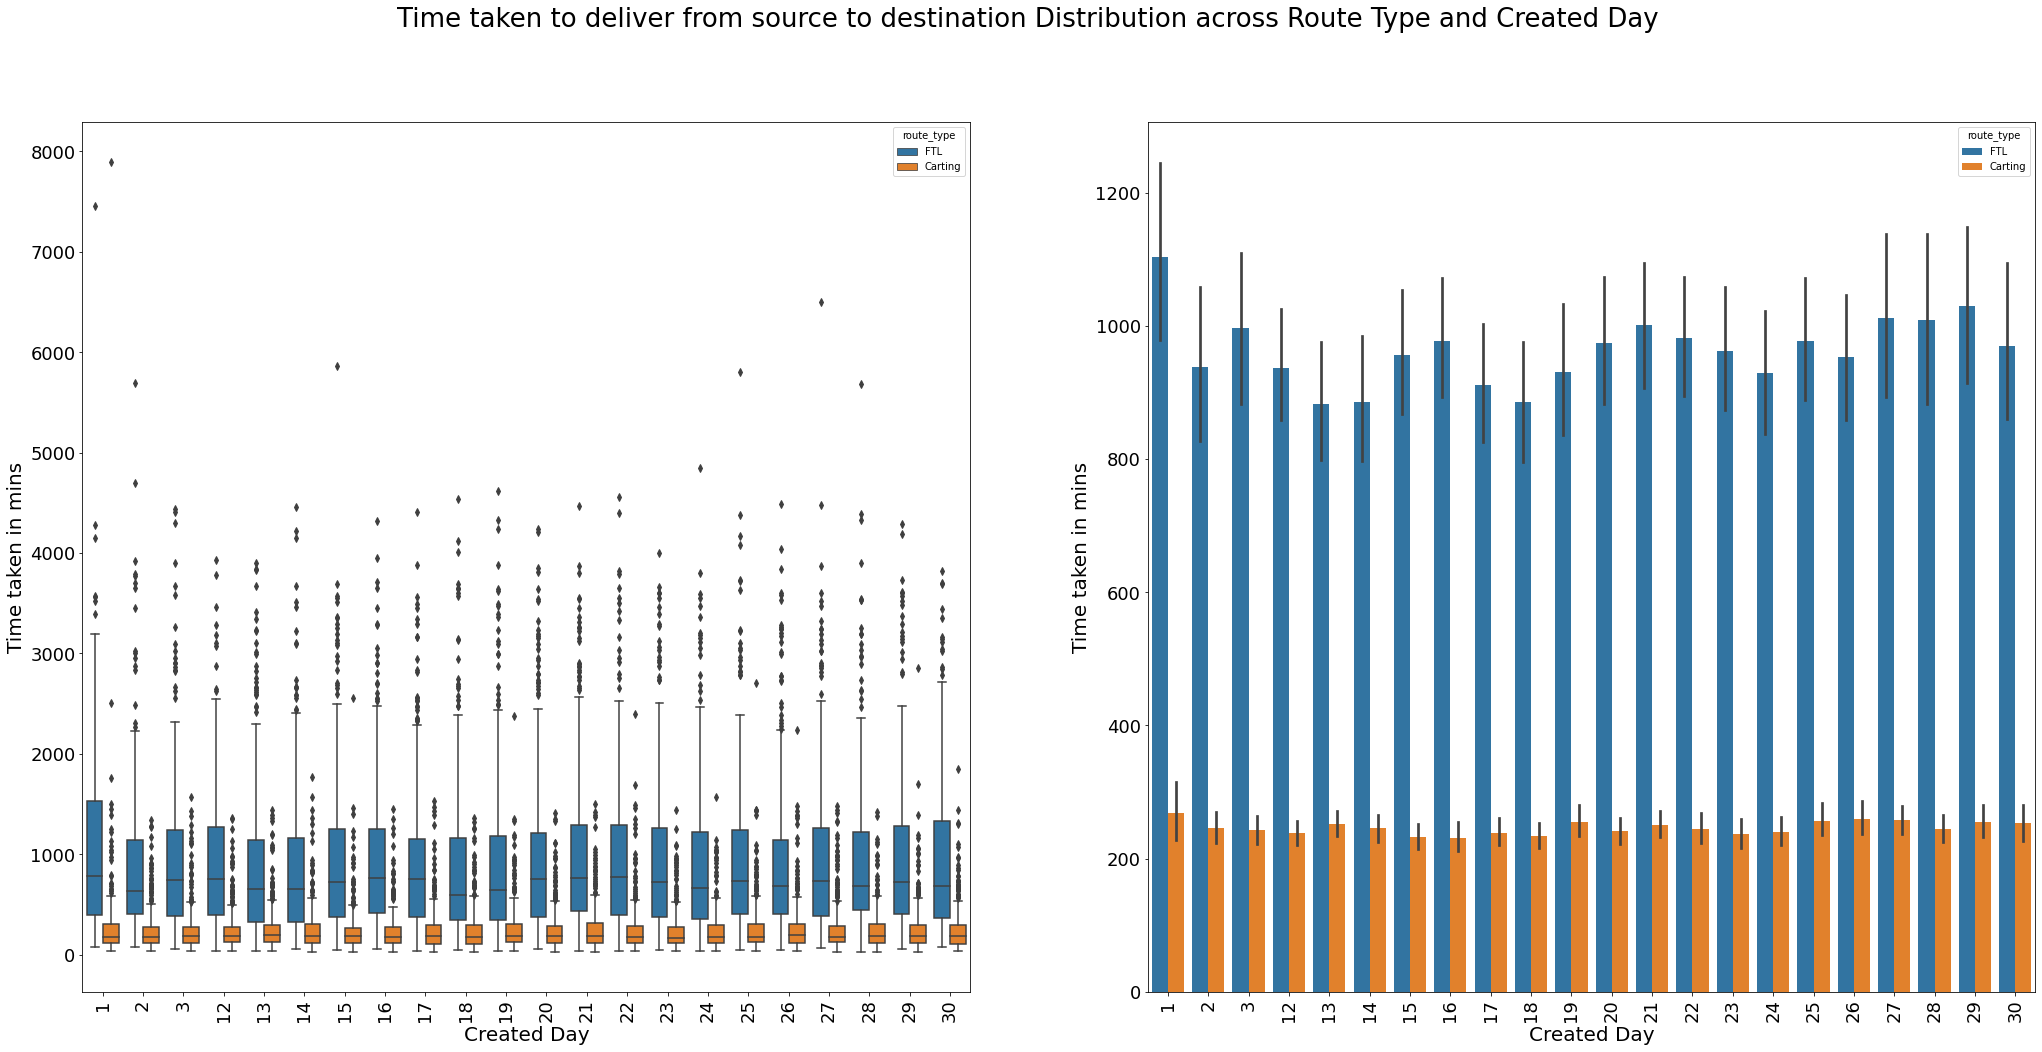

In [ ]:
# Time taken to deliver from source to destination Distribution across Route Type and Created Day
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'start_scan_to_end_scan' , data = df2 , x = 'created_day' , hue = 'route_type')
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('Time taken in mins' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'start_scan_to_end_scan' , data = df2 , x = 'created_day' , hue = 'route_type' , estimator = np.mean)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('Time taken in mins' , fontsize = 20)

fig.suptitle("Time taken to deliver from source to destination Distribution across Route Type and Created Day" , fontsize = 26)
plt.show()

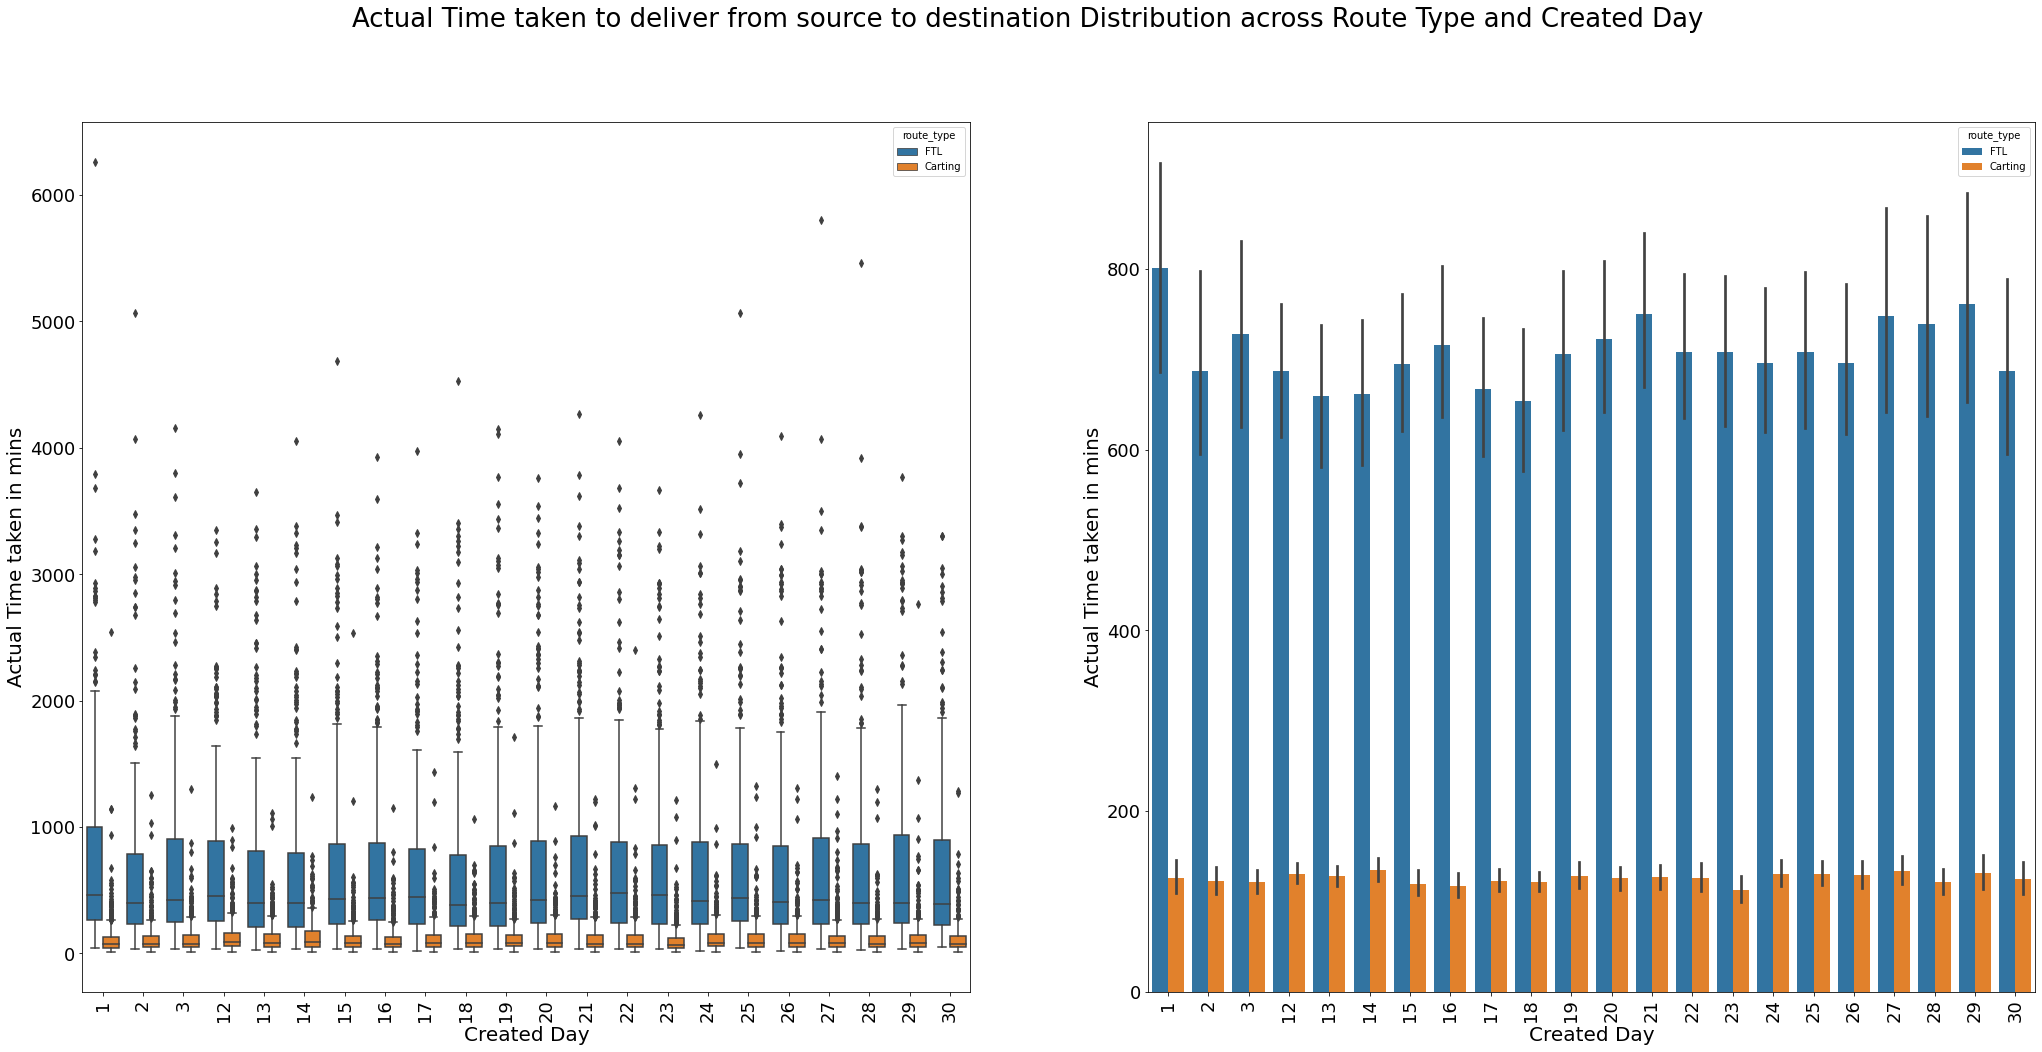

In [ ]:
# Actual Time taken to deliver from source to destination Distribution across Route Type and Created Day
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'actual_time' , data = df2 , x = 'created_day' , hue = 'route_type')
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('Actual Time taken in mins' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'actual_time' , data = df2 , x = 'created_day' , hue = 'route_type' , estimator = np.mean)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('Actual Time taken in mins' , fontsize = 20)

fig.suptitle("Actual Time taken to deliver from source to destination Distribution across Route Type and Created Day" , fontsize = 26)
plt.show()

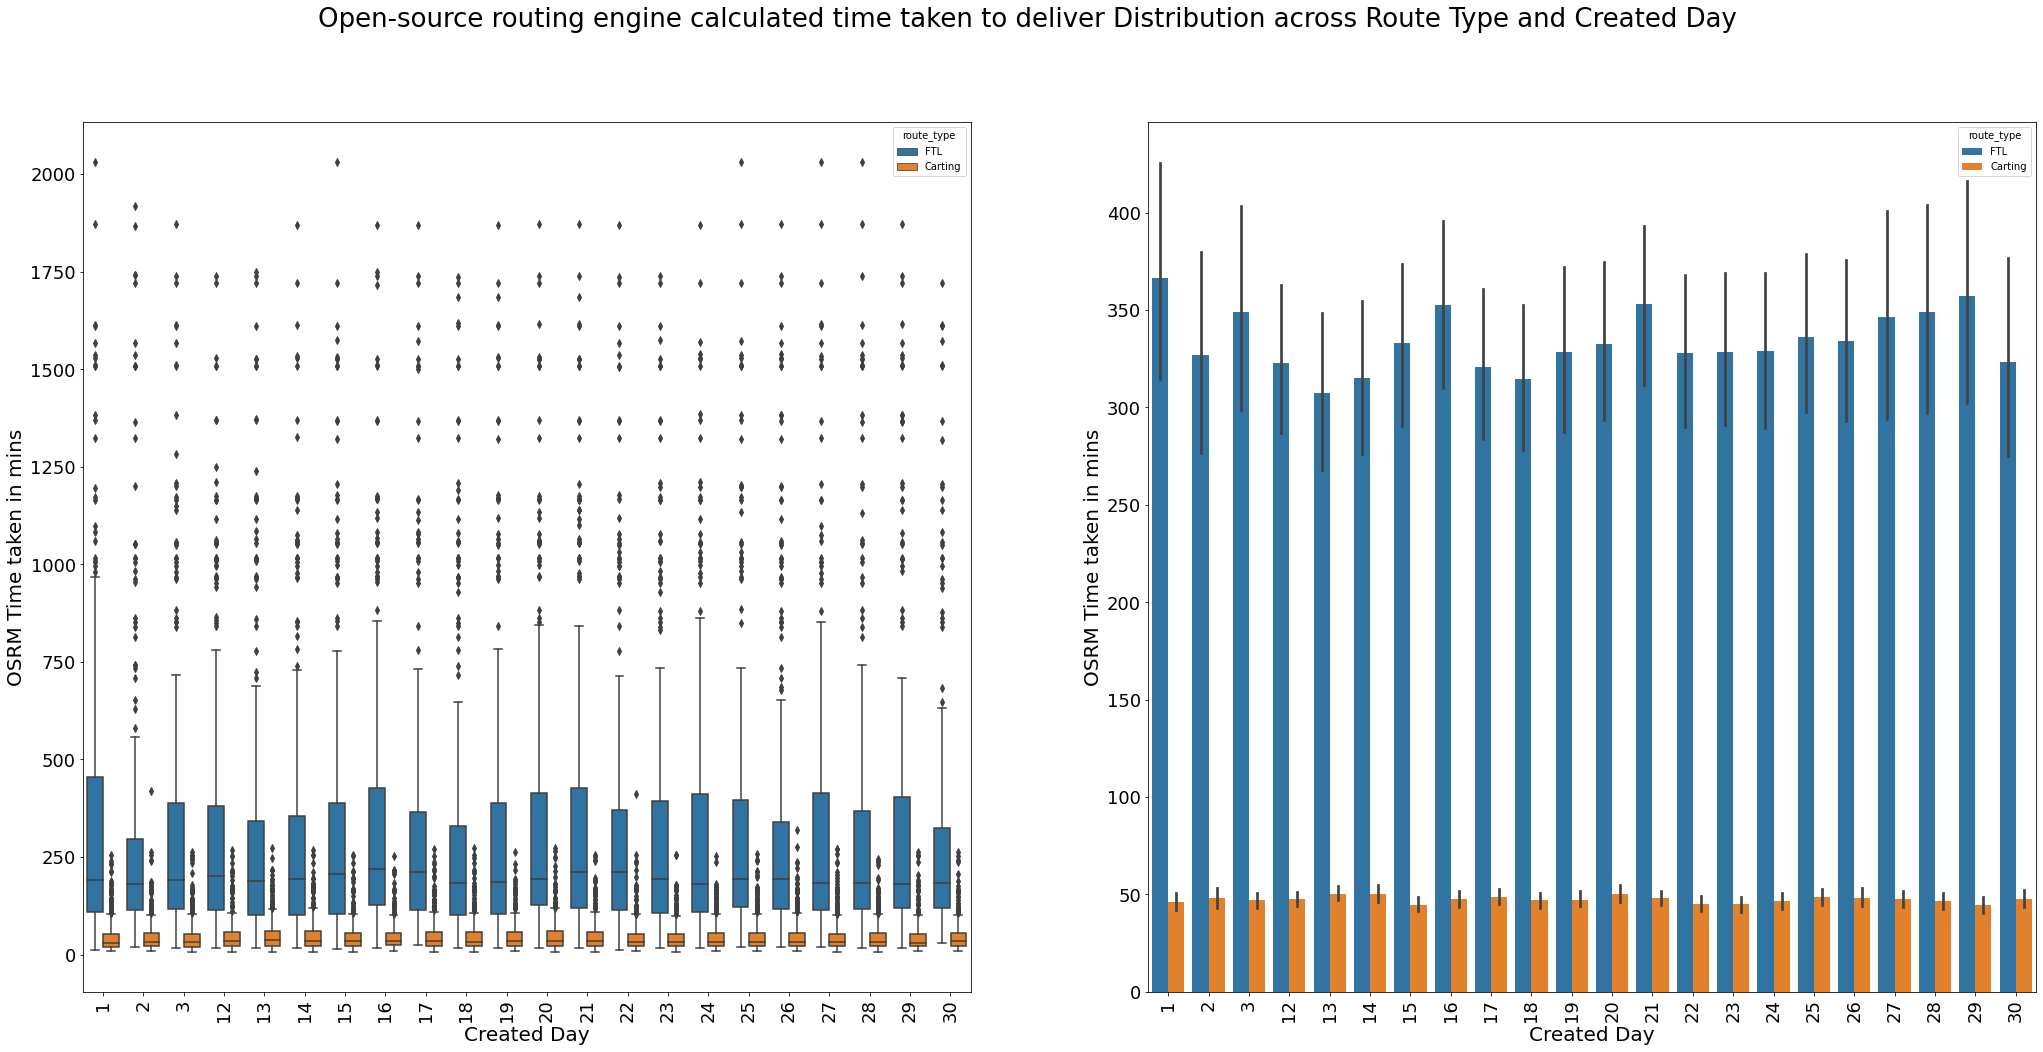

In [ ]:
# Open-source routing engine calculated time taken to deliver Distribution across Route Type and Created Day
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'osrm_time' , data = df2 , x = 'created_day' , hue = 'route_type')
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('OSRM Time taken in mins' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'osrm_time' , data = df2 , x = 'created_day' , hue = 'route_type' , estimator = np.mean)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('OSRM Time taken in mins' , fontsize = 20)

fig.suptitle("Open-source routing engine calculated time taken to deliver Distribution across Route Type and Created Day" , fontsize = 26)
plt.show()

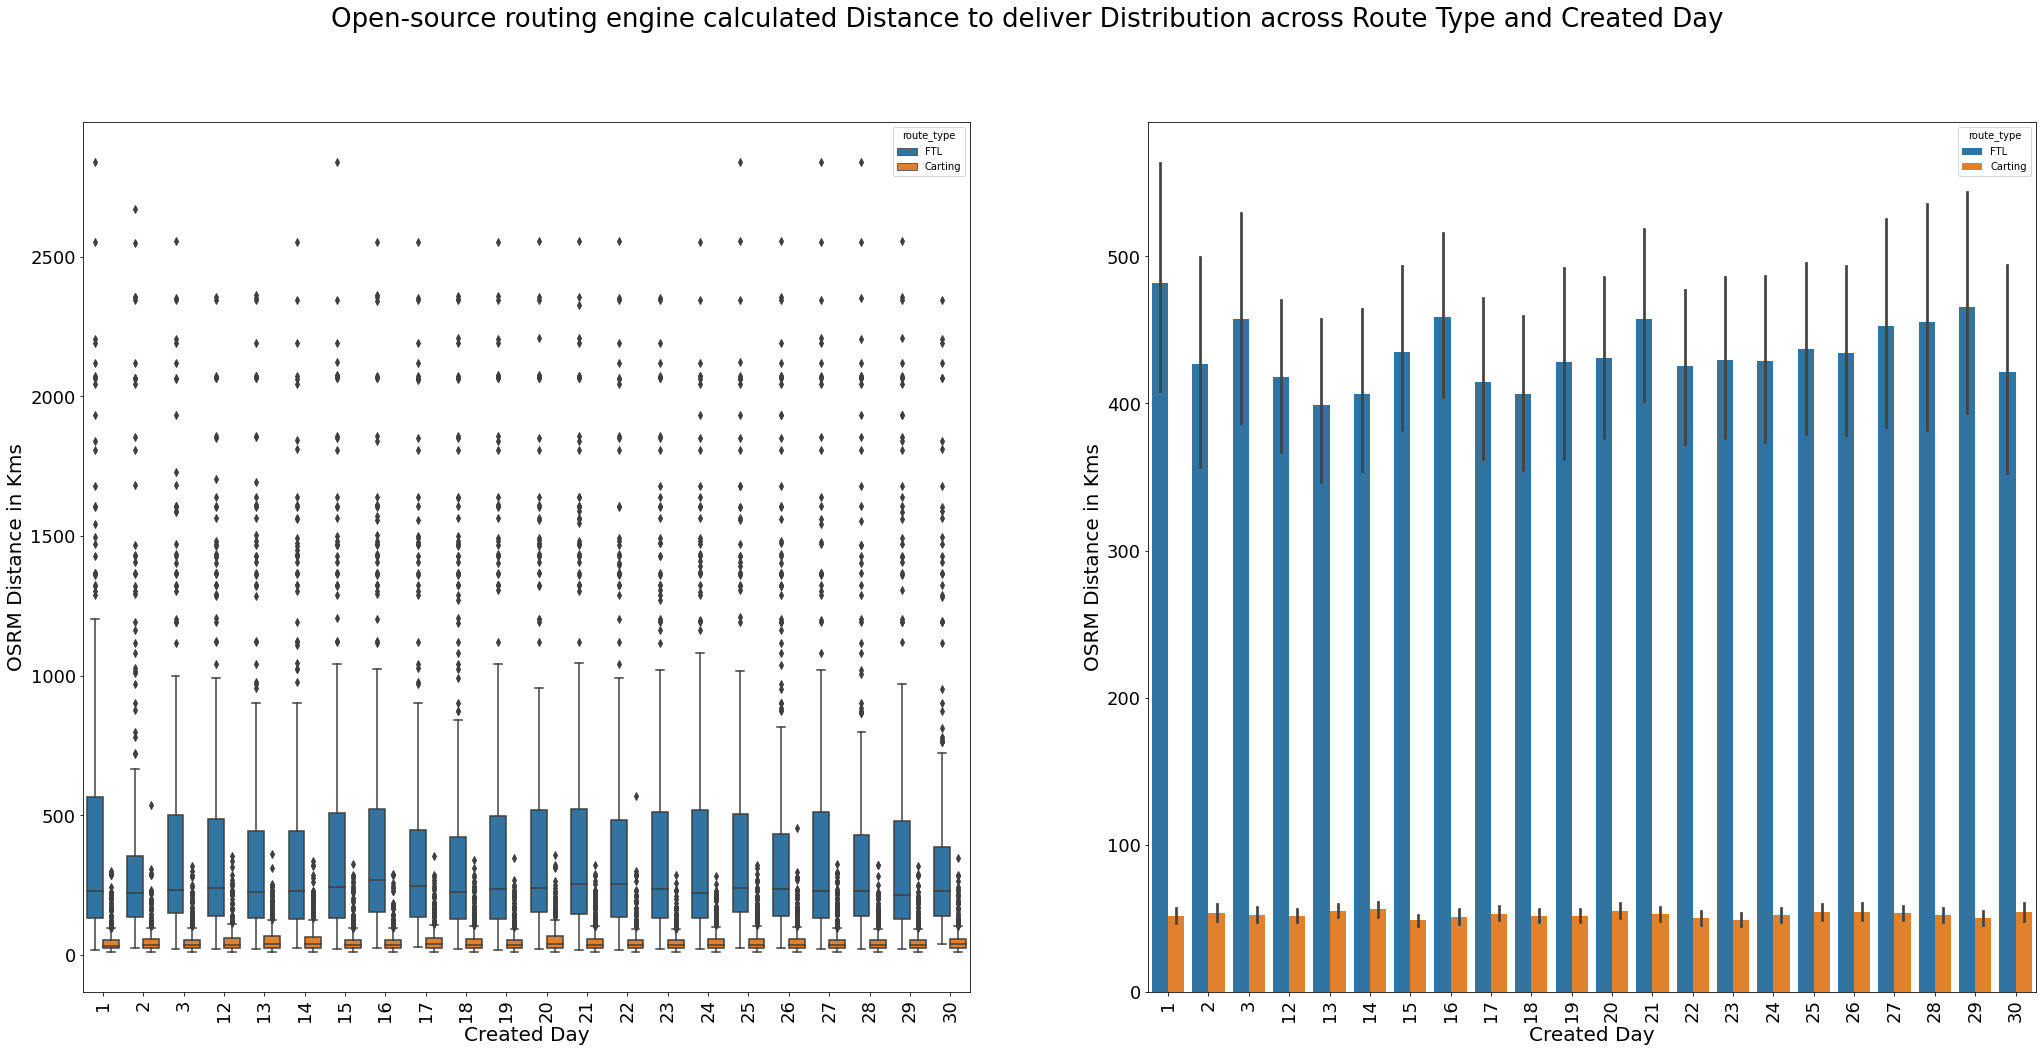

In [ ]:
# Open-source routing engine calculated Distance to deliver Distribution across Route Type and Created Day
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'osrm_distance' , data = df2 , x = 'created_day' , hue = 'route_type')
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('OSRM Distance in Kms' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'osrm_distance' , data = df2 , x = 'created_day' , hue = 'route_type' , estimator = np.mean)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('OSRM Distance in Kms' , fontsize = 20)

fig.suptitle("Open-source routing engine calculated Distance to deliver Distribution across Route Type and Created Day" , fontsize = 26)
plt.show()

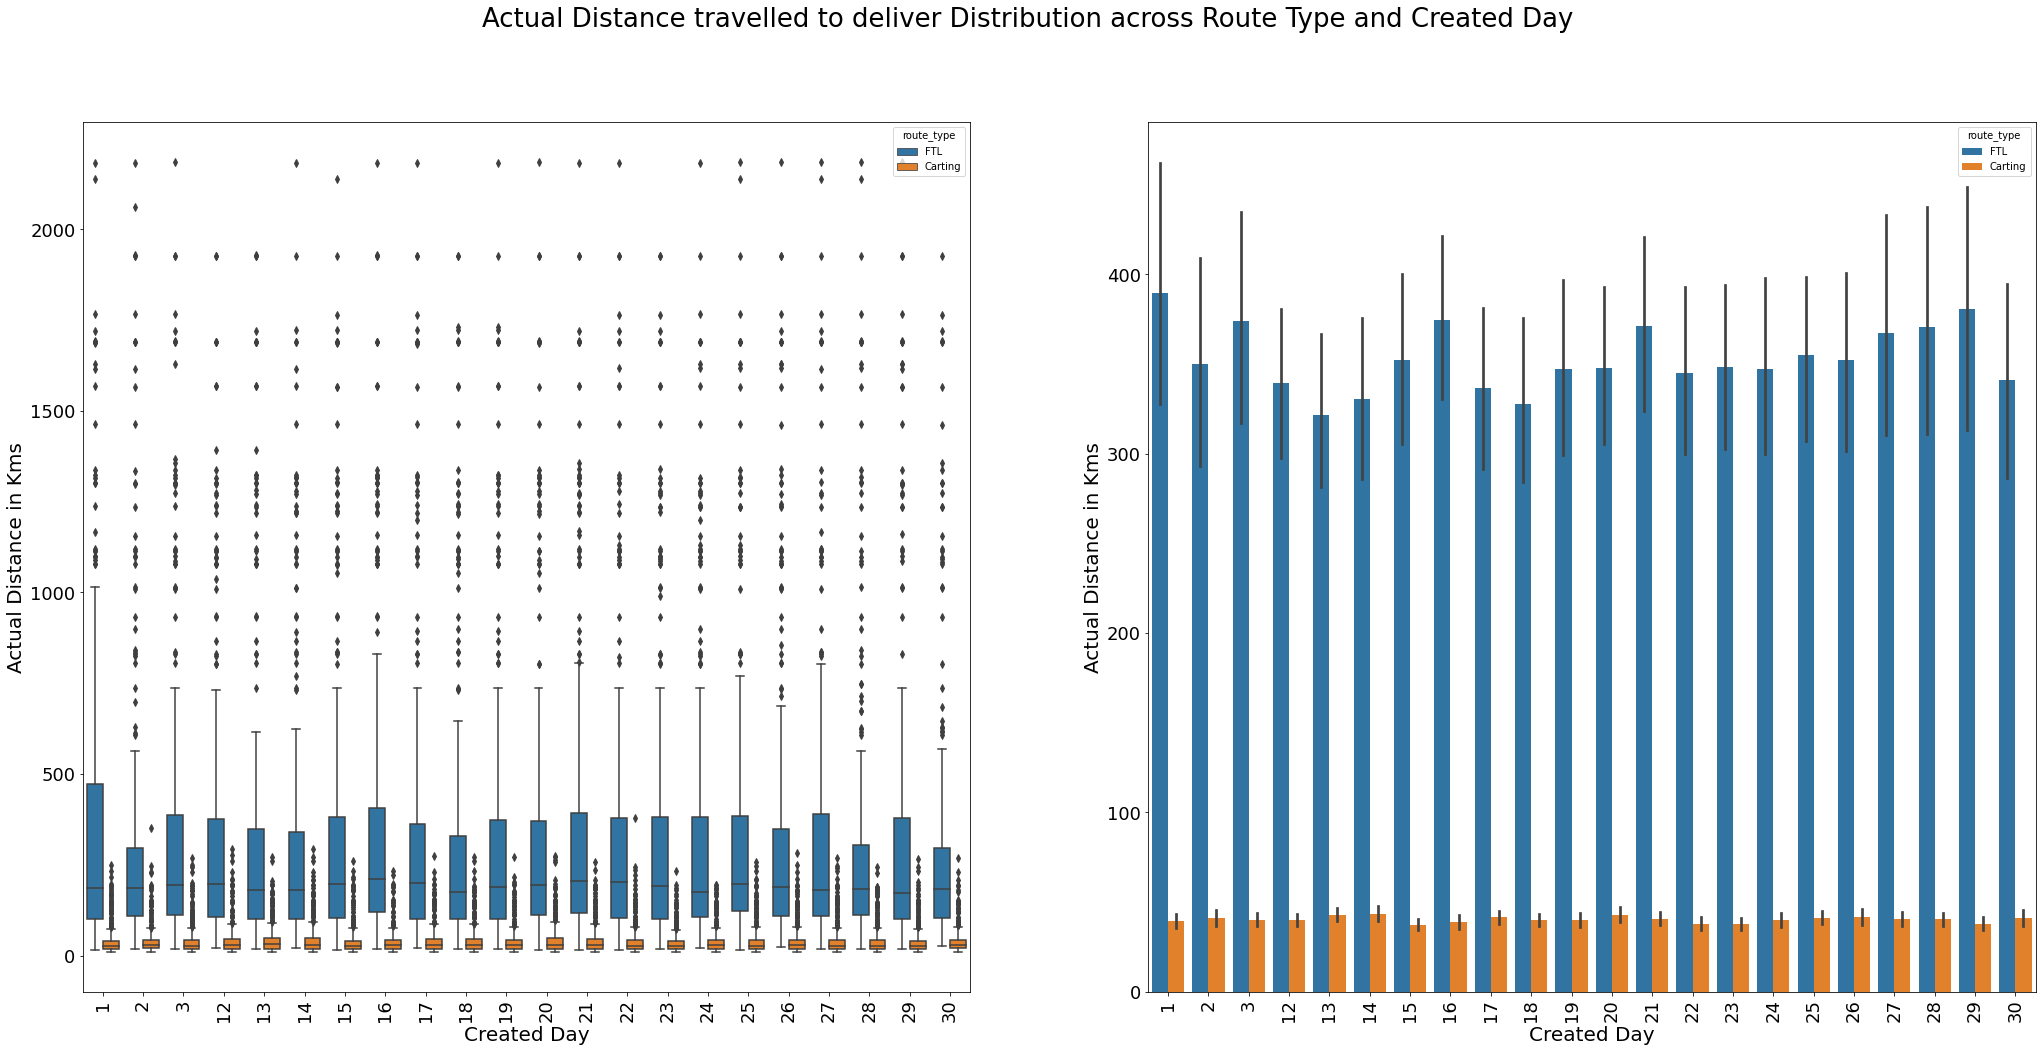

In [ ]:
# Actual Distance travelled to deliver Distribution across Route Type and Created Day
fig = plt.figure(figsize = (35,16))

plt.subplot(1,2,1)
sns.boxplot(y = 'actual_distance_to_destination' , data = df2 , x = 'created_day' , hue = 'route_type')
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('Actual Distance in Kms' , fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(y = 'actual_distance_to_destination' , data = df2 , x = 'created_day' , hue = 'route_type' , estimator = np.mean)
plt.xticks(rotation = 90 , fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Created Day' , fontsize = 20)
plt.ylabel('Actual Distance in Kms' , fontsize = 20)

fig.suptitle("Actual Distance travelled to deliver Distribution across Route Type and Created Day" , fontsize = 26)
plt.show()

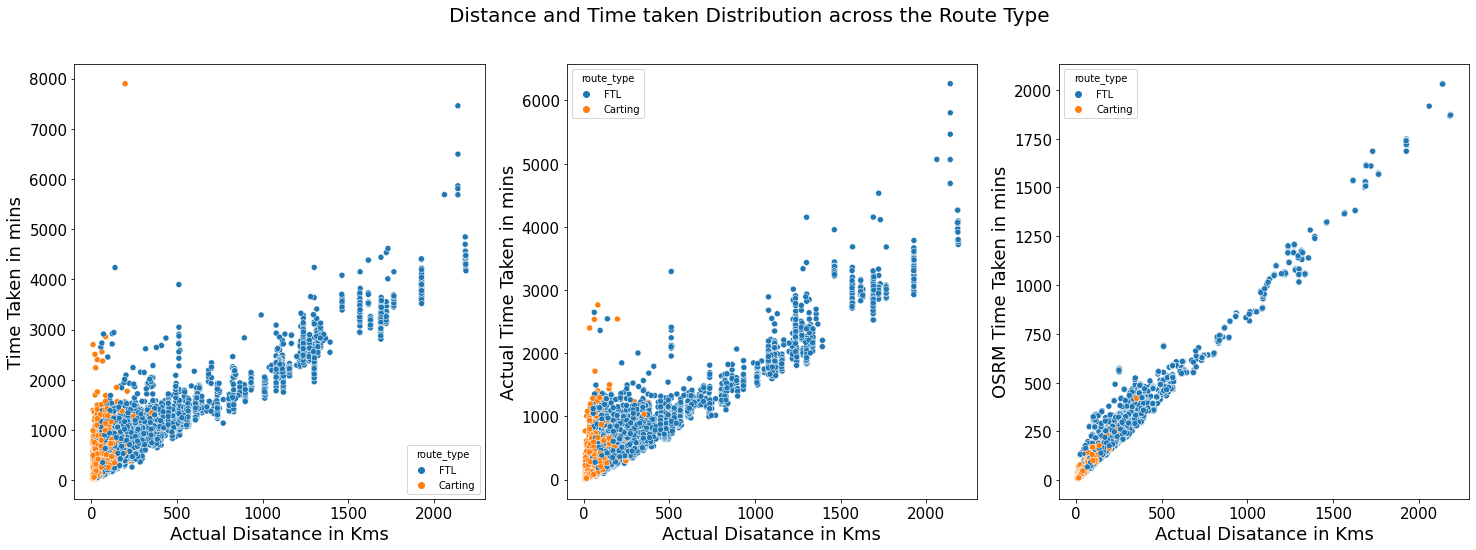

In [ ]:
# Distance and Time taken Distribution across the Route Type
# Time Increases as the Distance increases
# Carting is for more small distance and time
plt.figure(figsize = (25,8))

plt.subplot(1,3,1)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'start_scan_to_end_scan' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,2)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'actual_time' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('Actual Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,3)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'osrm_time' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('OSRM Time Taken in mins' , fontsize = 18)

plt.suptitle("Distance and Time taken Distribution across the Route Type" , fontsize = 20)
plt.show()

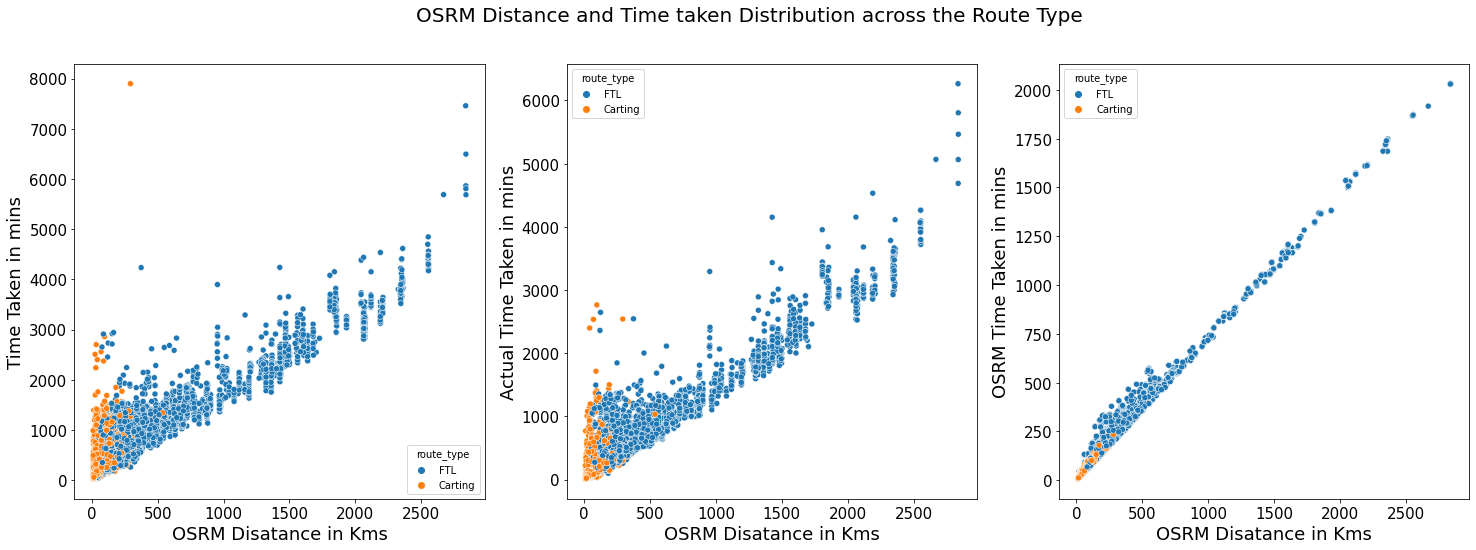

In [ ]:
# OSRM Distance and Time taken Distribution across the Route Type
# Time Increases as the Distance increases
# Carting is for more small distance and time
plt.figure(figsize = (25,8))

plt.subplot(1,3,1)
sns.scatterplot(x = 'osrm_distance' , y = 'start_scan_to_end_scan' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('OSRM Disatance in Kms' , fontsize = 18)
plt.ylabel('Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,2)
sns.scatterplot(x = 'osrm_distance' , y = 'actual_time' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('OSRM Disatance in Kms' , fontsize = 18)
plt.ylabel('Actual Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,3)
sns.scatterplot(x = 'osrm_distance' , y = 'osrm_time' , data = df2 , hue = 'route_type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('OSRM Disatance in Kms' , fontsize = 18)
plt.ylabel('OSRM Time Taken in mins' , fontsize = 18)

plt.suptitle("OSRM Distance and Time taken Distribution across the Route Type" , fontsize = 20)
plt.show()

# Correlation - heatmaps & pairplots

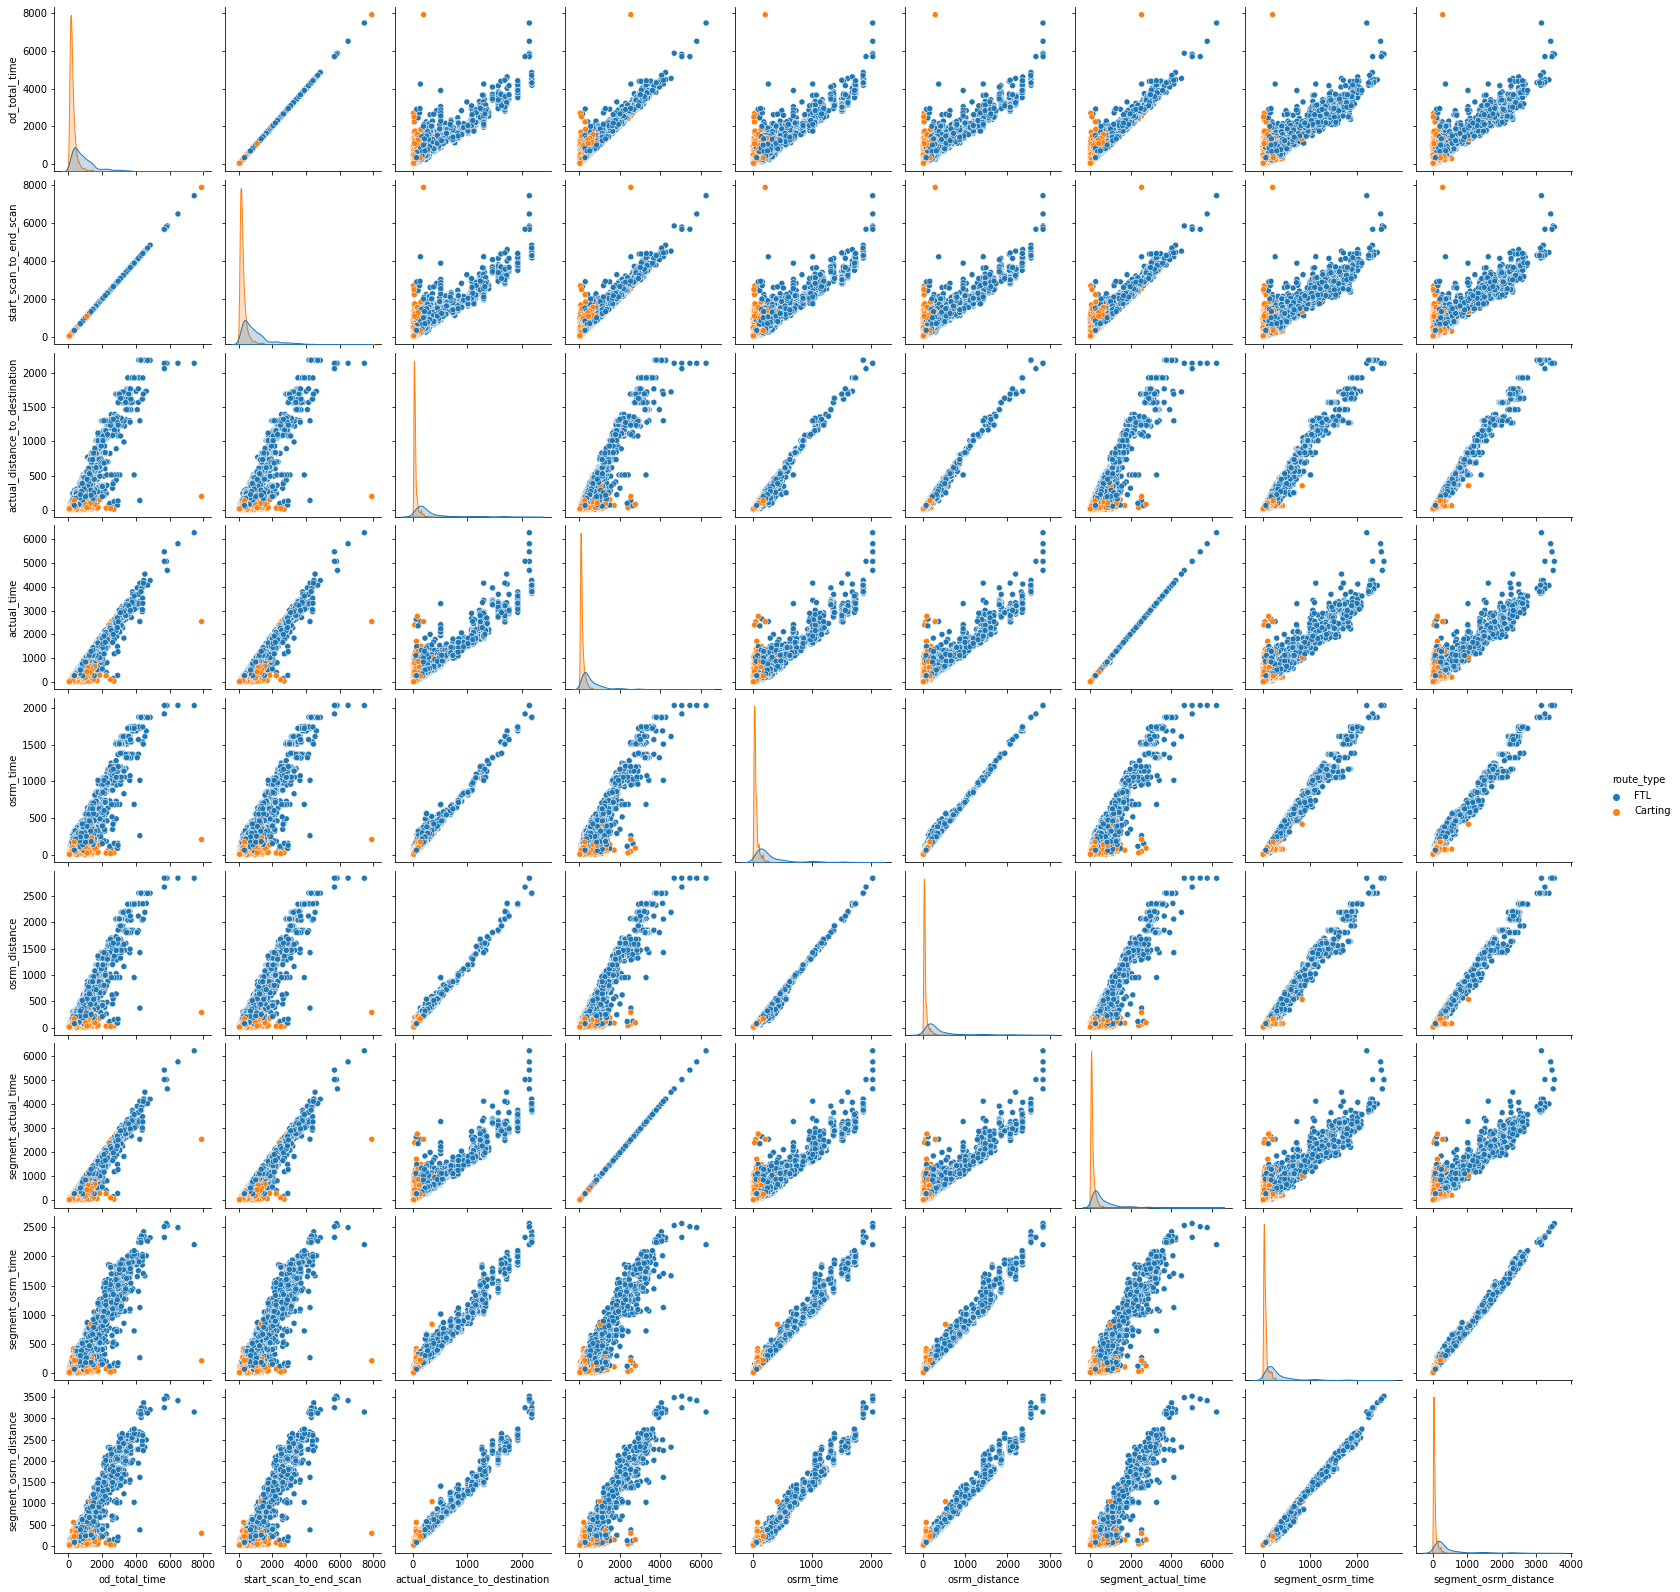

In [ ]:
pr = df2[['data', 'source_state',
       'source_city', 'destination_state', 'destination_city',
       'route_schedule_uuid', 'route_type', 'od_total_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']]
sns.pairplot(data=pr ,hue = 'route_type')
plt.show()

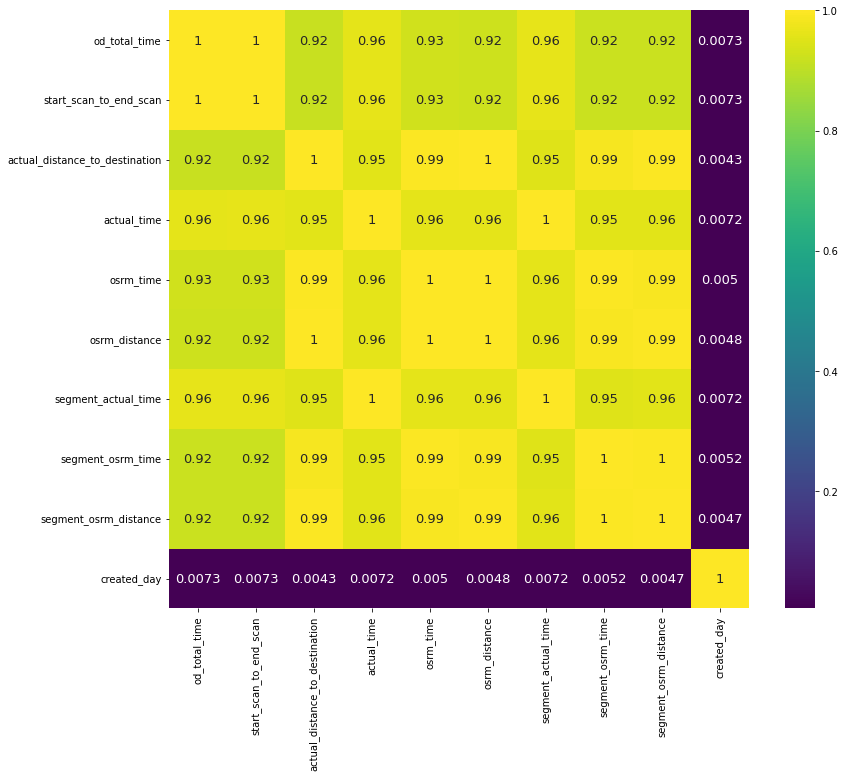

In [ ]:
#  Correlation between 2 variables/features
#  All the numerical varible except the created_day are positively coreleated
plt.figure(figsize=(13,11))
cr = df2[['od_total_time','start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance','created_day']]
sns.heatmap(cr.corr(), cmap= "viridis", annot=True , annot_kws={'size': 13})
plt.show()

# Hypothesis Testing and Category Encoding

In [ ]:
data = df2.copy()
label_encoder = LabelEncoder()

In [ ]:
data['route_type'].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [ ]:
# Encoding Route Type with Carting as 0 and FTL as 1
data['route_type'] = label_encoder.fit_transform(data['route_type'])
data['route_type'].value_counts()

0    8908
1    5909
Name: route_type, dtype: int64

In [ ]:
data['data'].value_counts()

training    10654
test         4163
Name: data, dtype: int64

In [ ]:
# Encoding Route Type with test as 0 and training as 1
data['data'] = label_encoder.fit_transform(data['data'])
data['data'].value_counts()

1    10654
0     4163
Name: data, dtype: int64

In [ ]:
# Creating Two dataframes df_sta and df_nor which contains standardised and normalised values of numerical column
df_s = StandardScaler().fit_transform(data[['od_total_time' , 'start_scan_to_end_scan' , 'actual_distance_to_destination' , 'actual_time' , 'osrm_time' , 'osrm_distance' , 'segment_actual_time' , 'segment_osrm_time' , 'segment_osrm_distance']])
df_m = MinMaxScaler().fit_transform(data[['od_total_time' , 'start_scan_to_end_scan' , 'actual_distance_to_destination' , 'actual_time' , 'osrm_time' , 'osrm_distance' , 'segment_actual_time' , 'segment_osrm_time' , 'segment_osrm_distance']])
df_sta = pd.DataFrame(df_s,columns = ['od_total_time' , 'start_scan_to_end_scan' , 'actual_distance_to_destination' , 'actual_time' , 'osrm_time' , 'osrm_distance' , 'segment_actual_time' , 'segment_osrm_time' , 'segment_osrm_distance'])
df_nor = pd.DataFrame(df_m,columns = ['od_total_time' , 'start_scan_to_end_scan' , 'actual_distance_to_destination' , 'actual_time' , 'osrm_time' , 'osrm_distance' , 'segment_actual_time' , 'segment_osrm_time' , 'segment_osrm_distance'])

In [ ]:
df_sta.describe()

od_total_time  start_scan_to_end_scan  actual_distance_to_destination  \
count   1.481700e+04            1.481700e+04                    1.481700e+04   
mean    3.836365e-17            3.260910e-17                   -2.373751e-17   
std     1.000034e+00            1.000034e+00                    1.000034e+00   
min    -7.714058e-01           -7.709467e-01                   -5.091246e-01   
25%    -5.794490e-01           -5.796561e-01                   -4.638208e-01   
50%    -3.808593e-01           -3.807746e-01                   -3.798696e-01   
75%     1.616499e-01            1.612154e-01                    3.450474e-04   
max     1.118145e+01            1.118472e+01                    6.621482e+00   

        actual_time     osrm_time  osrm_distance  segment_actual_time  \
count  1.481700e+04  1.481700e+04   1.481700e+04         1.481700e+04   
mean   3.548638e-17  4.603638e-17   3.260910e-17         4.411820e-17   
std    1.000034e+00  1.000034e+00   1.000034e+00         1.000034e+00   
min   -6.201601e-01 -5.726293e-01  -5.272157e-01        -6.200543e-01   
25%   -5.168428e-01 -4.878685e-01  -4.685028e-01        -5.175785e-01   
50%   -3.707734e-01 -3.736257e-01  -3.745471e-01        -3.719551e-01   
75%    2.290126e-02  2.438156e-02   1.115146e-02         2.356531e-02   
max    1.052386e+01  6.893692e+00   7.116244e+00         1.056418e+01   

       segment_osrm_time  segment_osrm_distance  
count       1.481700e+04           1.481700e+04  
mean        1.294773e-17           4.076138e-17  
std         1.000034e+00           1.000034e+00  
min        -5.562235e-01          -5.139724e-01  
25%        -4.767402e-01          -4.573695e-01  
50%        -3.686429e-01          -3.673584e-01  
75%         1.287697e-02          -1.055835e-02  
max         7.576509e+00           7.922030e+00

In [ ]:
df_nor.describe()

od_total_time  start_scan_to_end_scan  actual_distance_to_destination  \
count   14817.000000            14817.000000                    14817.000000   
mean        0.064537                0.064484                        0.071400   
std         0.083665                0.083645                        0.140245   
min         0.000000                0.000000                        0.000000   
25%         0.016059                0.016000                        0.006353   
50%         0.032674                0.032635                        0.018127   
75%         0.078061                0.077968                        0.071448   
max         1.000000                1.000000                        1.000000   

        actual_time     osrm_time  osrm_distance  segment_actual_time  \
count  14817.000000  14817.000000   14817.000000         14817.000000   
mean       0.055650      0.076695       0.068976             0.055440   
std        0.089737      0.133939       0.130835             0.089415   
min        0.000000      0.000000       0.000000             0.000000   
25%        0.009271      0.011352       0.007681             0.009163   
50%        0.022379      0.026654       0.019974             0.022183   
75%        0.057705      0.079961       0.070435             0.057547   
max        1.000000      1.000000       1.000000             1.000000   

       segment_osrm_time  segment_osrm_distance  
count       14817.000000           14817.000000  
mean            0.068393               0.060926  
std             0.122964               0.118544  
min             0.000000               0.000000  
25%             0.009773               0.006710  
50%             0.023065               0.017380  
75%             0.069977               0.059674  
max             1.000000               1.000000

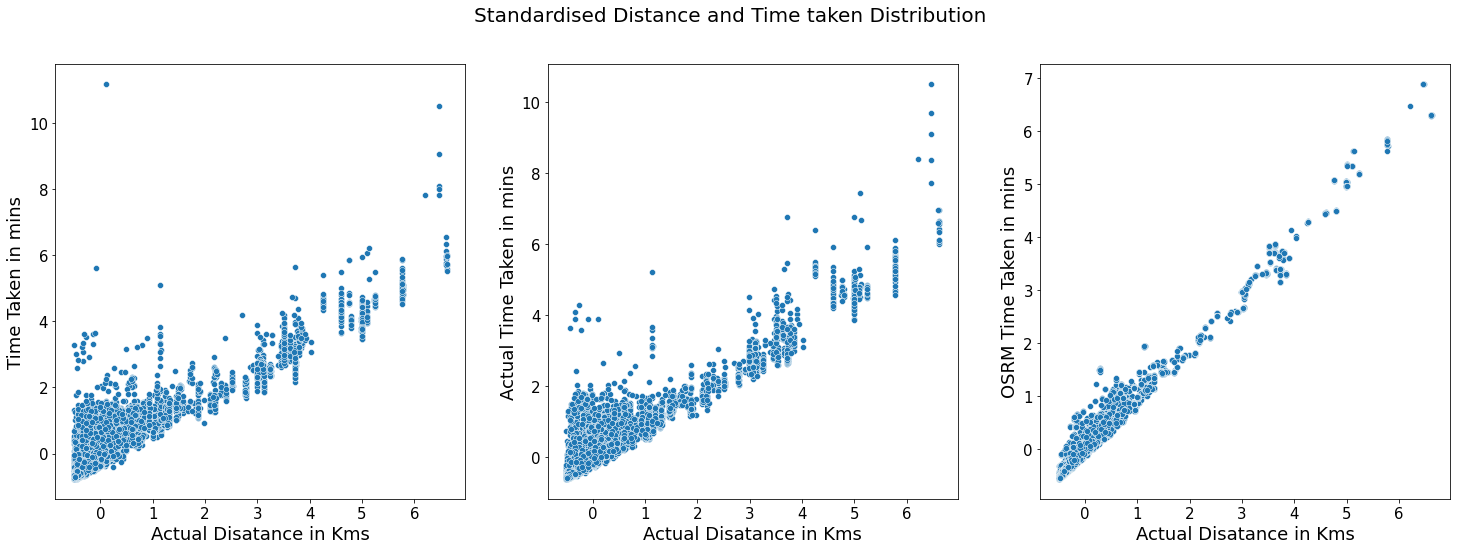

In [ ]:
# Standardised Distance and Time taken Distribution 
plt.figure(figsize = (25,8))

plt.subplot(1,3,1)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'start_scan_to_end_scan' , data = df_sta )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,2)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'actual_time' , data = df_sta )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('Actual Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,3)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'osrm_time' , data = df_sta )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('OSRM Time Taken in mins' , fontsize = 18)

plt.suptitle("Standardised Distance and Time taken Distribution" , fontsize = 20)
plt.show()

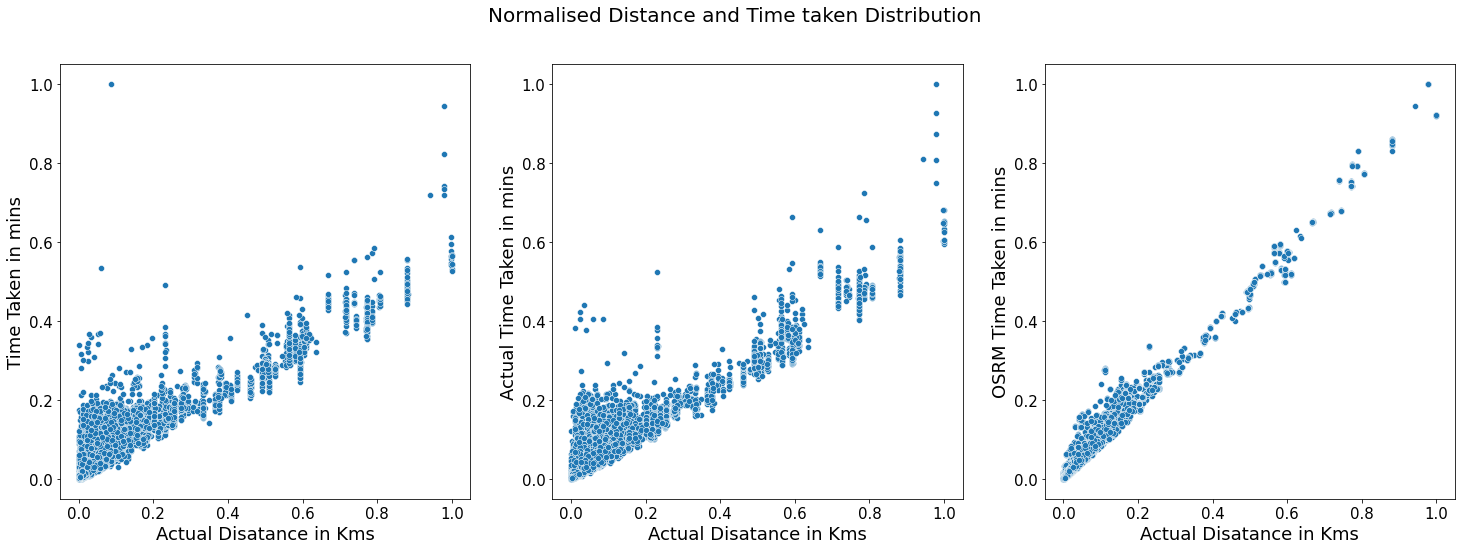

In [ ]:
# Normalised Distance and Time taken Distribution 
plt.figure(figsize = (25,8))

plt.subplot(1,3,1)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'start_scan_to_end_scan' , data = df_nor )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,2)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'actual_time' , data = df_nor )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('Actual Time Taken in mins' , fontsize = 18)

plt.subplot(1,3,3)
sns.scatterplot(x = 'actual_distance_to_destination' , y = 'osrm_time' , data = df_nor )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Actual Disatance in Kms' , fontsize = 18)
plt.ylabel('OSRM Time Taken in mins' , fontsize = 18)

plt.suptitle("Normalised Distance and Time taken Distribution" , fontsize = 20)
plt.show()

**Relationship between od_total_time and start_scan_to_end_scan :**

In [ ]:
# Removing the outlier in od_total_time and start_scan_to_end_scan by calulating IQR and Max value and filtering the data

fl = ( np.percentile(df2['od_total_time'] , 75) - np.percentile(df2['od_total_time'] , 25) ) * 1.5 + np.percentile(df2['od_total_time'] , 75)
data1 = df2.loc[df2['od_total_time'] <= fl , 'od_total_time']

fl = ( np.percentile(df2['start_scan_to_end_scan'] , 75) - np.percentile(df2['start_scan_to_end_scan'] , 25) ) * 1.5 + np.percentile(df2['start_scan_to_end_scan'] , 75)
data2 = df2.loc[df2['start_scan_to_end_scan'] <= fl , 'start_scan_to_end_scan']

print(data1.shape , data2.shape)

(13551,) (13550,)


In [ ]:
# Null Hypothesis (Ho)        : od_total_time and start_scan_to_end_scan have similar means
# Alternative Hypothesis (Ha) : od_total_time and start_scan_to_end_scan have different means

stats , p_value = ttest_ind(data1 , data2)
print('Mean of Trip Time: ',data1.mean())
print('Mean of Trip Time from start scan to stop scan : ',data2.mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('od_total_time and start_scan_to_end_scan have different means')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('od_total_time and start_scan_to_end_scan have similar means')

Mean of Trip Time:  368.73084348018597
Mean of Trip Time from start scan to stop scan :  367.7855350553506
Test Statistics :  0.24840195678338625
P-Value :  0.8038253020058308
Fail to Reject the Null (Ho) Hypothesis
od_total_time and start_scan_to_end_scan have similar means


In [ ]:
stats , p_vale = kstest(data1 , data2)
if p_value < 0.05:
  print('Distribution are not identical')
else:
  print('Distribution are identical')

Distribution are identical


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(data1,data2)
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are similar


od_total_time and start_scan_to_end_scan have similar mean and variance and similar distributions.

**Relationship between actual_time and osrm_time :**

In [ ]:
# Removing the outlier in actual_time and osrm_time by calulating IQR and Max value and filtering the data

fl = ( np.percentile(df2['actual_time'] , 75) - np.percentile(df2['actual_time'] , 25) ) * 1.5 + np.percentile(df2['actual_time'] , 75)
data1 = df2.loc[df2['actual_time'] <= fl , 'actual_time']

fl = ( np.percentile(df2['osrm_time'] , 75) - np.percentile(df2['osrm_time'] , 25) ) * 1.5 + np.percentile(df2['osrm_time'] , 75)
data2 = df2.loc[df2['osrm_time'] <= fl , 'osrm_time']

print(data1.shape , data2.shape)

(13174,) (13300,)


In [ ]:
# Null Hypothesis (Ho)        : actual_time and osrm_time have similar means
# Alternative Hypothesis (Ha) : actual_time and osrm_time have different means

stats , p_value = ttest_ind(data1 , data2)
print('Mean of Actual Trip Time: ',data1.mean())
print('Mean of Open Source Route Machine Trip Time: ',data2.mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('actual_time and osrm_time have different means')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('actual_time and osrm_time have similar means')

Mean of Actual Trip Time:  193.92804007894338
Mean of Open Source Route Machine Trip Time:  85.03443609022557
Test Statistics :  63.6528948707414
P-Value :  0.0
Reject the Null (Ho) Hypothesis
actual_time and osrm_time have different means


In [ ]:
stats , p_vale = kstest(data1 , data2)
if p_value < 0.05:
  print('Distribution are not identical')
else:
  print('Distribution are identical')

Distribution are not identical


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(data1,data2)
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


actual_time and osrm_time have different mean and variances and the distributions are not similar.

**Relationship between actual_time and segment_actual_time:**

In [ ]:
# Removing the outlier in actual_time and segment_actual_time by calulating IQR and Max value and filtering the data

fl = ( np.percentile(df2['actual_time'] , 75) - np.percentile(df2['actual_time'] , 25) ) * 1.5 + np.percentile(df2['actual_time'] , 75)
data1 = df2.loc[df2['actual_time'] <= fl , 'actual_time']

fl = ( np.percentile(df2['segment_actual_time'] , 75) - np.percentile(df2['segment_actual_time'] , 25) ) * 1.5 + np.percentile(df2['segment_actual_time'] , 75)
data2 = df2.loc[df2['segment_actual_time'] <= fl , 'segment_actual_time']

print(data1.shape , data2.shape)

(13174,) (13174,)


In [ ]:
# Null Hypothesis (Ho)        : actual_time and segment_actual_time have similar means
# Alternative Hypothesis (Ha) : actual_time and segment_actual_time have different means

stats , p_value = ttest_ind(data1 , data2)
print('Mean of Actual Trip Time: ',data1.mean())
print('Mean of Cumulative Segment Actual Trip Time: ',data2.mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('actual_time and segment_actual_time have different means')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('actual_time and segment_actual_time have similar means')

Mean of Actual Trip Time:  193.92804007894338
Mean of Cumulative Segment Actual Trip Time:  192.11644147563382
Test Statistics :  0.8186911401576081
P-Value :  0.4129700577197134
Fail to Reject the Null (Ho) Hypothesis
actual_time and segment_actual_time have similar means


In [ ]:
stats , p_vale = kstest(data1 , data2)
if p_value < 0.05:
  print('Distribution are not identical')
else:
  print('Distribution are identical')

Distribution are identical


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(data1,data2)
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are similar


actual_time and segment_actual_time have same mean and variances and the distributions are similar.

**Relationship between osrm_time and segment_osrm_time:**

In [ ]:
# Removing the outlier in osrm_time and segment_osrm_time by calulating IQR and Max value and filtering the data

fl = ( np.percentile(df2['osrm_time'] , 75) - np.percentile(df2['osrm_time'] , 25) ) * 1.5 + np.percentile(df2['osrm_time'] , 75)
data1 = df2.loc[df2['osrm_time'] <= fl , 'osrm_time']

fl = ( np.percentile(df2['segment_osrm_time'] , 75) - np.percentile(df2['segment_osrm_time'] , 25) ) * 1.5 + np.percentile(df2['segment_osrm_time'] , 75)
data2 = df2.loc[df2['segment_osrm_time'] <= fl , 'segment_osrm_time']

print(data1.shape , data2.shape)

(13300,) (13325,)


In [ ]:
# Null Hypothesis (Ho)        : osrm_time and segment_osrm_time have similar means
# Alternative Hypothesis (Ha) : osrm_time and segment_osrm_time have different means

stats , p_value = ttest_ind(data1 , data2)
print('Mean of Open Source Route Machine Trip Time: ',data1.mean())
print('Mean of Cumulative Segment Open Source Route Machine Trip Time: ',data2.mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('osrm_time and segment_osrm_time have different means')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('osrm_time and segment_osrm_time have similar means')

Mean of Open Source Route Machine Trip Time:  85.03443609022557
Mean of Cumulative Segment Open Source Route Machine Trip Time:  93.66641651031895
Test Statistics :  -8.340561534329321
P-Value :  7.747030760426877e-17
Reject the Null (Ho) Hypothesis
osrm_time and segment_osrm_time have different means


In [ ]:
stats , p_vale = kstest(data1 , data2)
if p_value < 0.05:
  print('Distribution are not identical')
else:
  print('Distribution are identical')

Distribution are not identical


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(data1,data2)
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


osrm_time and segment_osrm_time have different mean and variances and the distributions are not similar.

**Relationship between osrm_distance and segment_osrm_distance :**

In [ ]:
# Removing the outlier in osrm_distance and segment_osrm_distance by calulating IQR and Max value and filtering the data

fl = ( np.percentile(df2['osrm_distance'] , 75) - np.percentile(df2['osrm_distance'] , 25) ) * 1.5 + np.percentile(df2['osrm_distance'] , 75)
data1 = df2.loc[df2['osrm_distance'] <= fl , 'osrm_distance']

fl = ( np.percentile(df2['segment_osrm_distance'] , 75) - np.percentile(df2['segment_osrm_distance'] , 25) ) * 1.5 + np.percentile(df2['segment_osrm_distance'] , 75)
data2 = df2.loc[df2['segment_osrm_distance'] <= fl , 'segment_osrm_distance']

print(data1.shape , data2.shape)

(13293,) (13269,)


In [ ]:
# Null Hypothesis (Ho)        : osrm_distance and segment_osrm_distance have similar means
# Alternative Hypothesis (Ha) : osrm_distance and segment_osrm_distance have different means

stats , p_value = ttest_ind(data1 , data2)
print('Mean of Open Source Route Machine Trip Distance: ',data1.mean())
print('Mean of Cumulative Segment Open Source Route Machine Trip Distance: ',data2.mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('osrm_distance and segment_osrm_distance have different means')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('osrm_distance and segment_osrm_distance have similar means')

Mean of Open Source Route Machine Trip Distance:  99.94638811404498
Mean of Cumulative Segment Open Source Route Machine Trip Distance:  105.98151303790792
Test Statistics :  -4.835064227575939
P-Value :  1.3384665722443756e-06
Reject the Null (Ho) Hypothesis
osrm_distance and segment_osrm_distance have different means


In [ ]:
stats , p_vale = kstest(data1 , data2)
if p_value < 0.05:
  print('Distribution are not identical')
else:
  print('Distribution are identical')

Distribution are not identical


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(data1,data2)
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


osrm_distance and segment_osrm_distance have different mean and variances and the distributions are not similar.

**Relationship between osrm_distance and actual_distance_to_destination :**

In [ ]:
# Removing the outlier in osrm_distance and actual_distance_to_destination by calulating IQR and Max value and filtering the data

fl = ( np.percentile(df2['osrm_distance'] , 75) - np.percentile(df2['osrm_distance'] , 25) ) * 1.5 + np.percentile(df2['osrm_distance'] , 75)
data1 = df2.loc[df2['osrm_distance'] <= fl , 'osrm_distance']

fl = ( np.percentile(df2['actual_distance_to_destination'] , 75) - np.percentile(df2['actual_distance_to_destination'] , 25) ) * 1.5 + np.percentile(df2['actual_distance_to_destination'] , 75)
data2 = df2.loc[df2['actual_distance_to_destination'] <= fl , 'actual_distance_to_destination']

print(data1.shape , data2.shape)

(13293,) (13368,)


In [ ]:
# Null Hypothesis (Ho)        : osrm_distance and actual_distance_to_destination have similar means
# Alternative Hypothesis (Ha) : osrm_distance and actual_distance_to_destination have different means

stats , p_value = ttest_ind(data1 , data2)
print('Mean of Open Source Route Machine Trip Distance: ',data1.mean())
print('Mean of Actual Trip Distance: ',data2.mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('osrm_distance and actual_distance_to_destination have different means')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('osrm_distance and actual_distance_to_destination have similar means')

Mean of Open Source Route Machine Trip Distance:  99.94638811404498
Mean of Actual Trip Distance:  79.9936038436488
Test Statistics :  17.942600642644308
P-Value :  1.4465845947617385e-71
Reject the Null (Ho) Hypothesis
osrm_distance and actual_distance_to_destination have different means


In [ ]:
stats , p_vale = kstest(data1 , data2)
if p_value < 0.05:
  print('Distribution are not identical')
else:
  print('Distribution are identical')

Distribution are not identical


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(data1,data2)
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


osrm_distance and actual_distance_to_destination have different mean and variances and the distributions are not similar.

# Insights and Recommendations

**Insights:** \
\
Initially there were around 144000 data points of which only 14817 unique trip ids are available and the we have combined the rows by conducting necessary aggregations.
1.	The data is for 22 days starting from September 12 – October 3 where we training data from September 12 to 26 and test data from September 27 to October 3
2.	Transportation of goods over long distances Full Truck Load (FTL) is preferred whereas for short distances Carting transportation type is preferred.
3.	The top 5 states contributing for more trips are Maharashtra, Karnataka, Haryana, Tamil Nadu and Delhi and it contributes almost half of the trips.
4.	There are 11792 inter State trips and 3025 intra State trips. Four trips contributing more than 100 trips are : Bangalore Nelmngla > Bangalore KG Airport , Bengaluru Bomsndra > Bangalore KG Airport , Bangalore Nelmngla >  Bengaluru Bomsndra , and Bhiwandi Mankoli > Mumbai Hub.
5.	Average time taken to deliver and the range where most trip lie using FTL type is 1000 minutes with range 0-2500 minutes and for Carting is 250 minutes with range 0 to 500 minutes.
6.	Open-source routing engine Average time taken to deliver and the range where most trip lie using FTL type is 340 minutes with range 0-760 minutes and for Carting is 50 minutes with range 0 to 100 minutes.
7.	Average Distance to deliver and the range where most trip lie using FTL type is 360 Kms with range 0-780 Kms and for Carting is 40 Kms with range 0 to 90 Kms.
8.	Open-source routing engine Average Distance to deliver and the range where most trip lie using FTL type is 430 Kms with range 0-1000 Kms and for Carting is 50 Kms with range 0 to 100 Kms.
9.	In the top 5 states, Tamil Nadu has less distance and time to deliver whereas Haryana and Delhi tend to have long distance and more time to deliver.
10.	All the Numerical values are positively correlated.
11.	Hypothesis Testing is done on the numerical values for mean (2-sample ttest), variance (levene) and distribution (KS test) are done: \
\
•	od_total_time and start_scan_to_end_scan have similar mean and variance and similar distributions. \
•	actual_time and osrm_time have different mean and variances and the distributions are not similar. \
•	actual_time and segment_actual_time have same mean and variances and the distributions are similar. \
•	osrm_time and segment_osrm_time have different mean and variances and the distributions are not similar. \
•	osrm_distance and segment_osrm_distance have different mean and variances and the distributions are not similar. \
•	osrm_distance and actual_distance_to_destination have different mean and variances and the distributions are not similar. \
 \
Open Source Routing engine does not provide actual correct time and the deviation for distance seems to be small compared to time.

**Recommendations :** \
 \
1.	Almost half of the trip counts come from top 5 states, so we can concentrate on these states improve profitability margins.
2.	Tamil Nadu having relatively smaller trip distances, with Haryana and Delhi having more distance we can decide the number of FTL and carting transportation types.
3.	We can see some outliers where time taken is more for short distances, so we can check on the alternative routes.
4.	Open-Source Routing Engine optimisation can be carried out to get the exact time and distance.
5.	The best period to be use the route can be marked, were most trips are done to improve time and fuel/energy consumption.
